In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 4144.89it/s]


In [6]:
city_sub_routes

osm_id   route                  to  \
0    18683  subway         Isolatorweg   
1  4515354  subway                Gein   
2    31249  subway         Isolatorweg   
3  4515355  subway    Centraal Station   
4  8466667  subway                Zuid   
5  8466671  subway               Noord   
6    18532  subway         Gaasperplas   
7  4515356  subway  Amsterdam Centraal   
8    18423  subway                Gein   
9  4515357  subway    Centraal Station   

                                        name ref                 network  \
0              Metro 50: Gein => Isolatorweg  50  Stadsvervoer Amsterdam   
1              Metro 50: Isolatorweg => Gein  50  Stadsvervoer Amsterdam   
2  Metro 51: Centraal Station => Isolatorweg  51  Stadsvervoer Amsterdam   
3  Metro 51: Isolatorweg => Centraal Station  51  Stadsvervoer Amsterdam   
4                    Metro 52: Noord => Zuid  52  Stadsvervoer Amsterdam   
5                    Metro 52: Zuid => Noord  52  Stadsvervoer Amsterdam   
6  Metro 53: Centraal Station => Gaasperplas  53  Stadsvervoer Amsterdam   
7  Metro 53: Gaasperplas => Centraal Station  53  Stadsvervoer Amsterdam   
8         Metro 54: Centraal Station => Gein  54  Stadsvervoer Amsterdam   
9         Metro 54: Gein => Centraal Station  54  Stadsvervoer Amsterdam   

  service                                           geometry  
0    None  MULTILINESTRING ((4.98996 52.2964, 4.98959 52....  
1    None  MULTILINESTRING ((4.8388 52.38842, 4.83897 52....  
2    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
3    None  MULTILINESTRING ((4.8388 52.38842, 4.83897 52....  
4    None  MULTILINESTRING ((4.93265 52.40228, 4.93269 52...  
5    None  MULTILINESTRING ((4.87423 52.33922, 4.87552 52...  
6    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
7    None  MULTILINESTRING ((4.98373 52.31201, 4.98364 52...  
8    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
9    None  MULTILINESTRING ((4.98996 52.2964, 4.98959 52....

In [7]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [8]:
# id_nodes_length_sub

In [9]:
# id_edges_length_sub

In [10]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [11]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [12]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [13]:
# city_sub_nodes

In [14]:
# city_sub_stations

In [15]:
# city_sub_edges

In [16]:
# city_sub_routes

In [17]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [18]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [19]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [20]:
city_sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x      geo_y
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161  52.296407
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974  52.295637
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126  52.298132
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129  52.306869
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618  52.311806
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398  52.318612
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656  52.323602
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454  52.329785
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606  52.331769
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539  52.337689
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963  52.339322
 11   8

In [21]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [22]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [23]:
# city_sub_order_route_dict

In [24]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [25]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [26]:
# city_sub_all_shortest_paths_id_dict

In [27]:
# city_sub_edges

In [28]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [29]:
# city_sub_ordered_edges

In [30]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [31]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [32]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [33]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [34]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [35]:
# city_sub_extended_edges

### Organize edges dataframe for baseline network--city_sub_new_edges

In [36]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [37]:
# city_sub_shortest_path_edges_df

In [38]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [39]:
# city_sub_new_edges

### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [40]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [41]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [42]:
# city_sub_shortest_path_nodes_id

In [43]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [44]:
# city_sub_new_nodes

### Add columns to stations--city_sub_new_staions

In [45]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [46]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [47]:
# city_sub_new_stations

## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [48]:
connect_stations_name_metro,connect_stations_dataframe_metro = select_connect_stations_one_network(city_sub_new_stations)

In [49]:
connect_stations_name_metro

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [50]:
# connect_stations_dataframe_metro

### Build connection edges

In [51]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_metro,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [52]:
city_sub_connected_edges.sort_values(by='distance')

osm_id                                           geometry railway  \
373  503528036  LINESTRING (4.9276484 52.3324075, 4.9276417 52...  subway   
499  181750655  LINESTRING (4.9522734 52.3067117, 4.9522827 52...  subway   
498  503528136  LINESTRING (4.9521301 52.3066493, 4.9521206 52...  subway   
614  166161639  LINESTRING (4.9820769 52.3137638, 4.9820664 52...  subway   
594   39271205  LINESTRING (4.9743774 52.2955964, 4.9744107 52...  subway   
..         ...                                                ...     ...   
60    26982055  LINESTRING (4.8372863 52.3392173, 4.8369983 52...  subway   
607  166161630  LINESTRING (4.9791866 52.3170385, 4.978573 52....  subway   
588   23208282  LINESTRING (4.9728869 52.3236783, 4.9735608 52...  subway   
362  397809117  LINESTRING (4.926275 52.3971789, 4.9260716 52....  subway   
293  397809123  LINESTRING (4.9182755 52.3885941, 4.9184548 52...  subway   

    service   id  from_id  to_id     distance      time     to_from  \
373    yard  753      265    523     0.931719  0.000037  (523, 265)   
499    None  488      415    143     1.299982  0.000052  (143, 415)   
498    None  767      413    700     1.335778  0.000053  (700, 413)   
614    None  341      504    306     1.593889  0.000064  (306, 504)   
594    None  157      144    145     2.355372  0.000094  (145, 144)   
..      ...  ...      ...    ...          ...       ...         ...   
60     None   93      100    101   735.893891  0.029436  (101, 100)   
607    None  337      821    301   852.145611  0.034086  (301, 821)   
588    None   37       56    812   854.186556  0.034167   (812, 56)   
362    None  683      621    818  1108.588537  0.044344  (818, 621)   
293    None  686      817    624  1110.367311  0.044415  (624, 817)   

        from_to  count_weight                            route_name_list  \
373  (265, 523)           1.0  Metro 53: Centraal Station => Gaasperplas   
499  (415, 143)           1.0              Metro 50: Gein => Isolatorweg   
498  (413, 700)           1.0              Metro 50: Isolatorweg => Gein   
614  (504, 306)           1.0  Metro 53: Gaasperplas => Centraal Station   
594  (144, 145)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
60   (100, 101)           1.0              Metro 50: Gein => Isolatorweg   
607  (821, 301)           1.0  Metro 53: Gaasperplas => Centraal Station   
588   (56, 812)           1.0  Metro 53: Centraal Station => Gaasperplas   
362  (621, 818)           1.0                    Metro 52: Noord => Zuid   
293  (817, 624)           1.0                    Metro 52: Zuid => Noord   

      route     ref      weights  wcl_weights  
373  subway      53     0.931719     0.931719  
499  subway  50, 54     1.299982     1.299982  
498  subway  50, 54     1.335778     1.335778  
614  subway      53     1.593889     1.593889  
594  subway  50, 54     2.355372     2.355372  
..      ...     ...          ...          ...  
60   subway  50, 51   735.893891   735.893891  
607  subway      53   852.145611   852.145611  
588  subway      53   854.186556   854.186556  
362  subway      52  1108.588537  1108.588537  
293  subway      52  1110.367311  1110.367311  

[684 rows x 17 columns]

In [53]:
city_sub_connected_edges

osm_id                                           geometry railway  \
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
1    23207806  LINESTRING (4.8338659 52.3643177, 4.8338791 52...  subway   
2    23207802  LINESTRING (4.8338791 52.3637859, 4.8339056 52...  subway   
3    26983218  LINESTRING (4.8339056 52.3629417, 4.8339159 52...  subway   
4    26983222  LINESTRING (4.8339159 52.3625717, 4.8339214 52...  subway   
..        ...                                                ...     ...   
679       NaN  LINESTRING (4.8772326 52.3393181, 4.8739781 52...     NaN   
680       NaN  LINESTRING (4.8772326 52.3393181, 4.8780248 52...     NaN   
681       NaN  LINESTRING (4.8780248 52.3393025, 4.8739633 52...     NaN   
682       NaN  LINESTRING (4.8780248 52.3393025, 4.8739781 52...     NaN   
683       NaN  LINESTRING (4.8780248 52.3393025, 4.8772326 52...     NaN   

    service    id  from_id  to_id    distance       time     to_from  \
0      None   163      147     25   31.352181   0.001254   (25, 147)   
1      None    16       25     23   59.170137   0.002367    (23, 25)   
2      None    15       23     24   93.935464   0.003757    (24, 23)   
3      None   106       24    109   41.168856   0.001647   (109, 24)   
4      None   114      109    588   11.809676   0.000472  (588, 109)   
..      ...   ...      ...    ...         ...        ...         ...   
679     NaN  1005      180     83  365.940055  15.000000   (83, 180)   
680     NaN  1006      180    345   88.233092  15.000000  (345, 180)   
681     NaN  1007      345    840  452.138504  15.000000  (840, 345)   
682     NaN  1008      345     83  453.103438  15.000000   (83, 345)   
683     NaN  1009      345    180   88.233092  15.000000  (180, 345)   

        from_to  count_weight                route_name_list   route     ref  \
0     (147, 25)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1      (25, 23)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2      (23, 24)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3     (24, 109)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4    (109, 588)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
..          ...           ...                            ...     ...     ...   
679   (180, 83)           NaN                            NaN     NaN     NaN   
680  (180, 345)           NaN                            NaN     NaN     NaN   
681  (345, 840)           NaN                            NaN     NaN     NaN   
682   (345, 83)           NaN                            NaN     NaN     NaN   
683  (345, 180)           NaN                            NaN     NaN     NaN   

            weights  wcl_weights  
0         31.352181    31.352181  
1         59.170137    59.170137  
2         93.935464    93.935464  
3         41.168856    41.168856  
4         11.809676    11.809676  
..              ...          ...  
679  1000000.000000  2800.000000  
680  1000000.000000  2800.000000  
681  1000000.000000  2800.000000  
682  1000000.000000  2800.000000  
683  1000000.000000  2800.000000  

[684 rows x 17 columns]

In [54]:
duplicate_rows = city_sub_connected_edges[city_sub_connected_edges.duplicated(['id'], keep=False)]

In [55]:
duplicate_rows

Empty DataFrame
Columns: [osm_id, geometry, railway, service, id, from_id, to_id, distance, time, to_from, from_to, count_weight, route_name_list, route, ref, weights, wcl_weights]
Index: []

# Tram-Amsterdam

## Generate Baseline Networks

In [56]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 4429.00it/s]


Calculate_degree possibly unhappy


In [57]:
# city_tram_stations

In [58]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [59]:
id_nodes_length_tram

1920

In [60]:
id_edges_length_tram 

2204

In [61]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [62]:
# city_tram_edges

In [63]:
# city_tram_nodes

In [64]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [65]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time']]).to_file('city_tram_edges0612.GPKG',driver='GPKG')

In [66]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [67]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)

city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)

city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 3168].index, inplace=True)  # 20240909

city_tram_edges = city_tram_edges.reset_index(drop = True)

In [68]:
# city_tram_edges

In [69]:
# city_tram_nodes

In [70]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [71]:
# city_tram_stations

In [72]:
# city_tram_routes

In [73]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [74]:
# city_tram_order_id_pairs

In [75]:
# city_tram_all_shortest_paths_id_dict

In [76]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [77]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [78]:
# duplicated_rows

In [79]:
len(duplicated_rows)

18

In [80]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [81]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [82]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [83]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [84]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [85]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [86]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [87]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [88]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [89]:
# city_tram_shortest_path_edges_df

In [90]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [91]:
# city_tram_new_edges

In [92]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_new_edges0612.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [93]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [94]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [95]:
# city_tram_shortest_path_nodes_id

In [96]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [97]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [98]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [99]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [100]:
# city_tram_new_stations

## Create virtual edges at connection stations on single tram network 

#### Select nodes where need to build virtual edges based on name

In [101]:
connect_stations_name_tram,connect_stations_dataframe_tram = select_connect_stations_one_network(city_tram_new_stations)

In [102]:
connect_stations_name_tram

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [103]:
# len(connect_stations_name_tram)

In [104]:
# connect_stations_dataframe_tram

### Build connection edges

In [105]:
id_edges_length_tram = city_tram_edges['id'].iloc[-1] + 1

In [106]:
# id_edges_length_tram

In [107]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_tram,city_tram_new_stations,id_edges_length_tram,city_tram_new_edges)

In [108]:
# len(city_tram_connect_edges_dfs)

In [109]:
city_tram_connected_edges.sort_values(by = 'distance')

osm_id                                           geometry railway  \
657   323311657  LINESTRING (4.8768971 52.368541, 4.8768934 52....    tram   
819    38297099  LINESTRING (4.8863435 52.3659309, 4.8863262 52...    tram   
267    58301767  LINESTRING (4.8502293 52.3700488, 4.8502361 52...    tram   
1081  559858046  LINESTRING (4.8989773 52.3621338, 4.898971 52....    tram   
1049  145037517  LINESTRING (4.8983188 52.3638329, 4.898313 52....    tram   
...         ...                                                ...     ...   
1312  482880274  LINESTRING (4.9211099 52.3761672, 4.9213634 52...    tram   
413   181985408  LINESTRING (4.8620835 52.2881778, 4.8619036 52...    tram   
362   181985414  LINESTRING (4.8573912 52.2812036, 4.8575146 52...    tram   
1444   27080835  LINESTRING (4.9578273 52.3729148, 4.9574885 52...    tram   
1385  261871725  LINESTRING (4.934167 52.3729446, 4.9346066 52....    tram   

     service    id  from_id  to_id     distance      time       to_from  \
657     None  1933     2534   1761     0.280113  0.000020  (1761, 2534)   
819     None  1380     2446    925     1.531862  0.000109   (925, 2446)   
267     None  1435     1742   1323     1.592935  0.000114  (1323, 1742)   
1081    None  2439     2741   2093     1.658505  0.000118  (2093, 2741)   
1049    None  1508     2431   1278     1.682443  0.000120  (1278, 2431)   
...      ...   ...      ...    ...          ...       ...           ...   
1312    None  2390     2064   1586   780.562390  0.055754  (1586, 2064)   
413     None  1605     1479   2410   885.201279  0.063229  (2410, 1479)   
362     None  1615     2572   2747  1120.694627  0.080050  (2747, 2572)   
1444    None  1255     1164   1163  1649.135271  0.117795  (1163, 1164)   
1385    None  1708     1588   1589  1653.759541  0.118126  (1589, 1588)   

           from_to  count_weight  \
657   (2534, 1761)           1.0   
819    (2446, 925)           1.0   
267   (1742, 1323)           1.0   
1081  (2741, 2093)           1.0   
1049  (2431, 1278)           1.0   
...            ...           ...   
1312  (2064, 1586)           1.0   
413   (1479, 2410)           1.0   
362   (2572, 2747)           1.0   
1444  (1164, 1163)           1.0   
1385  (1588, 1589)           1.0   

                                        route_name_list route        ref  \
657   Tram 17: Amsterdam Centraal Station => Amsterd...  tram  17, 19, 7   
819   Tram 12: Amsterdam Centraal Station => Amsterd...  tram      12, 2   
267   Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram          7   
1081  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
1049  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
...                                                 ...   ...        ...   
1312  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   
413   Tram 25: Amsterdam Station Zuid => Amstelveen ...  tram         25   
362   Tram 25: Amstelveen Westwijk => Amsterdam Stat...  tram         25   
1444  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  tram         26   
1385  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   

          weights  wcl_weights  
657      0.280113     0.280113  
819      1.531862     1.531862  
267      1.592935     1.592935  
1081     1.658505     1.658505  
1049     1.682443     1.682443  
...           ...          ...  
1312   780.562390   780.562390  
413    885.201279   885.201279  
362   1120.694627  1120.694627  
1444  1649.135271  1649.135271  
1385  1653.759541  1653.759541  

[1625 rows x 17 columns]

In [110]:
city_tram_connected_edges

osm_id                                           geometry railway  \
0      27053451  LINESTRING (4.7747567 52.3537327, 4.776554 52....    tram   
1      27053451  LINESTRING (4.776554 52.3530108, 4.7768363 52....    tram   
2     322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
3      27053451  LINESTRING (4.7829483 52.3504489, 4.7832821 52...    tram   
4     322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
...         ...                                                ...     ...   
1620        NaN  LINESTRING (4.9005615 52.3444211, 4.9003351 52...     NaN   
1621        NaN  LINESTRING (4.9005615 52.3444211, 4.9011051 52...     NaN   
1622        NaN  LINESTRING (4.9011051 52.3446536, 4.8997164 52...     NaN   
1623        NaN  LINESTRING (4.9011051 52.3446536, 4.9003351 52...     NaN   
1624        NaN  LINESTRING (4.9011051 52.3446536, 4.9005615 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
0       None  1229     1139   2576  146.423620   0.010459  (2576, 1139)   
1       None  1230     2576   2577  520.557938   0.037183  (2577, 2576)   
2       None  1872     2483   1715  211.216649   0.015087  (1715, 2483)   
3       None  1231     2577   1140  162.776889   0.011627  (1140, 2577)   
4       None  1871     2484   2483  534.194272   0.038157  (2483, 2484)   
...      ...   ...      ...    ...         ...        ...           ...   
1620     NaN  3337     2435   2453  437.333225  15.000000  (2453, 2435)   
1621     NaN  3338     2435   2434   73.869611  15.000000  (2434, 2435)   
1622     NaN  3339     2434   2454  380.749836  15.000000  (2454, 2434)   
1623     NaN  3340     2434   2453  403.451221  15.000000  (2453, 2434)   
1624     NaN  3341     2434   2435   73.869611  15.000000  (2435, 2434)   

           from_to  count_weight  \
0     (1139, 2576)           1.0   
1     (2576, 2577)           1.0   
2     (2483, 1715)           1.0   
3     (2577, 1140)           1.0   
4     (2484, 2483)           1.0   
...            ...           ...   
1620  (2435, 2453)           NaN   
1621  (2435, 2434)           NaN   
1622  (2434, 2454)           NaN   
1623  (2434, 2453)           NaN   
1624  (2434, 2435)           NaN   

                                        route_name_list route  ref  \
0     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
1     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
2     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
3     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
4     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
...                                                 ...   ...  ...   
1620                                                NaN   NaN  NaN   
1621                                                NaN   NaN  NaN   
1622                                                NaN   NaN  NaN   
1623                                                NaN   NaN  NaN   
1624                                                NaN   NaN  NaN   

             weights  wcl_weights  
0         146.423620   146.423620  
1         520.557938   520.557938  
2         211.216649   211.216649  
3         162.776889   162.776889  
4         534.194272   534.194272  
...              ...          ...  
1620  1000000.000000  2800.000000  
1621  1000000.000000  2800.000000  
1622  1000000.000000  2800.000000  
1623  1000000.000000  2800.000000  
1624  1000000.000000  2800.000000  

[1625 rows x 17 columns]

In [111]:
# city_tram_connect_edges_dfs

In [112]:
duplicate_rows = city_tram_connected_edges[city_tram_connected_edges.duplicated(['id'], keep=False)]
duplicate_rows.sort_values(by='id')

osm_id                                           geometry railway  \
1091  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
1090  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
668   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
667   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
662   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
661   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
677   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
678   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
877   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
878   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
1070  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1069  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1107  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1106  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1040  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
1039  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
777   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   
778   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   

     service    id  from_id  to_id    distance      time       to_from  \
1091    None  1772     1644   1645   55.916258  0.003994  (1645, 1644)   
1090    None  1772     1645   1644   55.916258  0.003994  (1644, 1645)   
668     None  2060     1844   1845   10.002816  0.000714  (1845, 1844)   
667     None  2060     1845   1844   10.002816  0.000714  (1844, 1845)   
662     None  2464     1845   2104  167.342971  0.011953  (2104, 1845)   
661     None  2464     2104   1845  167.342971  0.011953  (1845, 2104)   
677     None  2466     1844   2521  100.380732  0.007170  (2521, 1844)   
678     None  2466     2521   1844  100.380732  0.007170  (1844, 2521)   
877     None  2674      910   2059  120.083769  0.008577   (2059, 910)   
878     None  2674     2059    910  120.083769  0.008577   (910, 2059)   
1070    None  2916     2215   2094  127.308628  0.009093  (2094, 2215)   
1069    None  2916     2094   2215  127.308628  0.009093  (2215, 2094)   
1107    None  2920     2216   1577   96.096155  0.006864  (1577, 2216)   
1106    None  2920     1577   2216   96.096155  0.006864  (2216, 1577)   
1040    None  2923     1279   2020   92.331883  0.006595  (2020, 1279)   
1039    None  2923     2020   1279   92.331883  0.006595  (1279, 2020)   
777     None  3089     2767   1618    2.253333  0.000161  (1618, 2767)   
778     None  3089     1618   2767    2.253333  0.000161  (2767, 1618)   

           from_to  count_weight  \
1091  (1644, 1645)           1.0   
1090  (1645, 1644)           1.0   
668   (1844, 1845)           3.0   
667   (1845, 1844)           3.0   
662   (1845, 2104)           3.0   
661   (2104, 1845)           3.0   
677   (1844, 2521)           3.0   
678   (2521, 1844)           3.0   
877    (910, 2059)           1.0   
878    (2059, 910)           1.0   
1070  (2215, 2094)           1.0   
1069  (2094, 2215)           1.0   
1107  (2216, 1577)           1.0   
1106  (1577, 2216)           1.0   
1040  (1279, 2020)           1.0   
1039  (2020, 1279)           1.0   
777   (2767, 1618)           1.0   
778   (1618, 2767)           1.0   

                                        route_name_list route    ref  \
1091  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
1090  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
668   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
667   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
662   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
66

In [113]:
len(duplicate_rows)

18

In [114]:
# gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_connected_edges20240612.gpkg',driver = 'GPKG')

# Output results of edges and stations of metro tram without connecting links

In [115]:
city_sub_new_stations_df = city_sub_new_stations
city_tram_new_stations_df = city_tram_new_stations

In [116]:
gpd.GeoDataFrame(city_sub_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']]).to_file('city_sub_new_stations0705.gpkg',driver = 'GPKG')

In [117]:
gpd.GeoDataFrame(city_tram_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']]).to_file('city_tram_new_stations0705.gpkg',driver = 'GPKG')

In [118]:
gpd.GeoDataFrame(city_sub_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_sub_connected_edges0705.gpkg',driver = 'GPKG')

In [119]:
gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_connected_edges0705.gpkg',driver = 'GPKG')

In [120]:
city_sub_new_edges_gdf = gpd.GeoDataFrame(city_sub_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']])
city_tram_new_edges_gdf = gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']])
city_sub_new_stations_gdf = gpd.GeoDataFrame(city_sub_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']].drop_duplicates(subset='name'))
city_tram_new_stations_gdf = gpd.GeoDataFrame(city_tram_new_stations_df[['id', 'geometry','degree','name','route_name_list','ref','transfer']].drop_duplicates(subset='name'))

In [121]:
# import os
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import contextily as ctx
# # 读取地铁线路文件
# metro_lines = gpd.read_file("./Metro lines.GPKG")

# # 确保所有 GeoDataFrame 对象的 CRS 一致
# common_crs = metro_lines.crs

# # 假设原始 CRS 是 'EPSG:4326'
# original_crs = 'EPSG:4326'

# # 设置原始 CRS
# city_sub_new_edges_gdf = city_sub_new_edges_gdf.set_crs(original_crs, allow_override=True)
# city_tram_new_edges_gdf = city_tram_new_edges_gdf.set_crs(original_crs, allow_override=True)
# city_sub_new_stations_gdf = city_sub_new_stations_gdf.set_crs(original_crs, allow_override=True)
# city_tram_new_stations_gdf = city_tram_new_stations_gdf.set_crs(original_crs, allow_override=True)

# # 将所有 GeoDataFrame 转换为与 metro_lines 相同的 CRS
# city_sub_new_edges_gdf = city_sub_new_edges_gdf.to_crs(common_crs)
# city_tram_new_edges_gdf = city_tram_new_edges_gdf.to_crs(common_crs)
# city_sub_new_stations_gdf = city_sub_new_stations_gdf.to_crs(common_crs)
# city_tram_new_stations_gdf = city_tram_new_stations_gdf.to_crs(common_crs)

# fig, ax = plt.subplots(figsize = [15,12])

# plt.rcParams.update({'font.size': 25})



# city_sub_new_edges_gdf.plot(ax =ax, color = '#F06543', linewidth = 4)
# city_tram_new_edges_gdf.plot(ax =ax, color = '#246EB9', linewidth = 4)
# city_sub_new_stations_gdf.plot(ax =ax, color = '#F3AA71', alpha=0.8, linewidth = 4)
# city_tram_new_stations_gdf.plot(ax =ax, color = '#7197BB', alpha=0.8, linewidth = 4)



# # city_sub_new_edges_gdf.plot(ax =ax, color = 'red', linewidth = 4, label = 'Metro Lines')
# # city_tram_new_edges_gdf.plot(ax =ax, color = 'blue', linewidth = 4, label = 'Tram Lines')
# # city_sub_new_stations_gdf.plot(ax =ax, color = 'red', alpha=0.5, label = 'Metro Stations')
# # city_tram_new_stations_gdf.plot(ax =ax, color = 'red', alpha=0.5, label = 'Tram Stations')


# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# # legend = ax.legend(loc='lower left', fontsize=25)
# # legend.set_bbox_to_anchor((1, 1))  # 设置图例的位置

# plt.savefig('Baseline networks of metro and tram', bbox_inches='tight', dpi=600)

# plt.show()

# Create more OD pairs

### 先一一对应生成od对后再drop_duplicates

In [122]:
def s_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes):
    start_df = pd.DataFrame()
    each_o_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        each_o_point = station_df.iloc[[0]]
        start_df = pd.concat([start_df,each_o_point])[['name','geometry','route_name_list']]
    start_id_df = pd.merge(start_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]

    destination_df = pd.DataFrame()
    each_d_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        each_o_point = station_df.iloc[[-1]]
        destination_df = pd.concat([destination_df,each_o_point])[['name','geometry','route_name_list']]
    destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]
    
    merged_id_df = start_id_df.merge(destination_id_df, on='route_name_list')
    
    pair_list = []
    
    for i in range(len(merged_id_df)):
        id_x = merged_id_df.loc[i, 'id_x']
        name_x = merged_id_df.loc[i, 'name_x']
    
        if i % 2 == 0: 
            id_y_values = merged_id_df['id_y'].drop(i+1)
            name_y_values = merged_id_df['name_y'].drop(i+1)
        else:
            id_y_values = merged_id_df['id_y'].drop(i-1)
            name_y_values = merged_id_df['name_y'].drop(i-1)
        
    
        for id_y, name_y in zip(id_y_values, name_y_values):
            if name_x != name_y:  
                pair_list.append((id_x, id_y))
    
    result_df = pd.DataFrame(pair_list, columns=['s_id', 'e_id'])
    result_df.drop_duplicates(subset=['s_id', 'e_id'], inplace=True)
    result_df.sort_values(by='e_id', inplace=True)
    result_df.reset_index(drop=True,inplace=True)
    return result_df,start_id_df,destination_id_df

In [123]:
city_sub_s_e_od_id_pairs_df, city_sub_start_id_df, city_sub_destination_id_df = s_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes)
city_sub_s_e_od_id_pairs_df

s_id  e_id
0    328    61
1    845    61
2    731    61
3    630    61
4    345    61
5    731   180
6    845   180
7    328   180
8    630   180
9    331   180
10   331   323
11   630   323
12   731   323
13   345   323
14   845   323
15   731   716
16   331   716
17   328   716
18   845   716
19   345   716
20   328   728
21   331   728
22   630   728
23   845   728
24   345   728
25   630   805
26   328   805
27   731   805
28   345   805
29   331   805

In [124]:
city_tram_s_e_od_id_pairs_df, city_tram_start_id_df, city_tram_destination_id_df = s_e_od_pairs(city_tram_order_route_dict,city_tram_new_nodes)
city_tram_s_e_od_id_pairs_df

s_id  e_id
0    1090  1043
1    2177  1043
2    2036  1043
3    2101  1043
4    1059  1043
..    ...   ...
641  2767  2780
642  2036  2780
643  1090  2780
644  1029  2780
645  1228  2780

[646 rows x 2 columns]

In [125]:
OD_id_pairs_df = pd.concat([city_sub_s_e_od_id_pairs_df,city_tram_s_e_od_id_pairs_df]).reset_index(drop=True)
OD_id_pairs_df = OD_id_pairs_df.drop(OD_id_pairs_df[(OD_id_pairs_df.s_id == 1068) & ~(OD_id_pairs_df.e_id.isin([1996, 1414]))].index)
OD_id_pairs_df = OD_id_pairs_df.drop(OD_id_pairs_df[(OD_id_pairs_df.e_id == 2300) & ~(OD_id_pairs_df.s_id.isin([1059, 1982]))].index)                                                                                 

In [126]:
OD_id_pairs_df = OD_id_pairs_df.reset_index(drop=True)

In [127]:
OD_id_pairs_df  

s_id  e_id
0     328    61
1     845    61
2     731    61
3     630    61
4     345    61
..    ...   ...
623  2767  2780
624  2036  2780
625  1090  2780
626  1029  2780
627  1228  2780

[628 rows x 2 columns]

In [128]:
destination_id_df = pd.concat([city_sub_destination_id_df,city_tram_destination_id_df]).reset_index(drop=True)
destination_id_df = destination_id_df.drop_duplicates(subset='id').reset_index(drop=True)

In [129]:
destination_id_df

name  \
0                Isolatorweg   
1                       Gein   
2           Centraal Station   
3                       Zuid   
4                      Noord   
5                Gaasperplas   
6                 Matterhorn   
7         Muiderpoortstation   
8              Amstelstation   
9           Centraal Station   
10       Lambertus Zijlplein   
11          Centraal Station   
12                 Flevopark   
13          Centraal Station   
14            Dijkgraafplein   
15          Centraal Station   
16                     Sniep   
17        Station Sloterdijk   
18       Oudenaardeplantsoen   
19          Centraal Station   
20           De Boelelaan/VU   
21          Centraal Station   
22              Station Zuid   
23                  Westwijk   
24          Centraal Station   
25                    IJburg   
26            Van Hallstraat   
27          Centraal Station   
28                Drentepark   
29  Eerste Marnixdwarsstraat   
30      Amstelveen Stadshart   
31                Sloterpark   
32                Azartplein   

                                      route_name_list    id  
0                       Metro 50: Gein => Isolatorweg   805  
1                       Metro 50: Isolatorweg => Gein   323  
2           Metro 51: Isolatorweg => Centraal Station   728  
3                             Metro 52: Noord => Zuid   180  
4                             Metro 52: Zuid => Noord   716  
5           Metro 53: Centraal Station => Gaasperplas    61  
6   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  1715  
7   Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  1840  
8   Tram 12: Amsterdam Centraal Station => Amsterd...  2101  
9   Tram 12: Amsterdam Amstelstation => Amsterdam ...  2754  
10  Tram 13: Amsterdam Centraal Station => Amsterd...  1101  
11  Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...  2780  
12  Tram 14: Amsterdam Centraal Station => Amsterd...  1160  
13  Tram 14: Amsterdam Flevopark => Amsterdam Cent...  2777  
14  Tram 17: Amsterdam Centraal Station => Amsterd...  1137  
15  Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  2779  
16      Tram 19: Amsterdam Sloterdijk => Diemen Sniep  2212  
17      Tram 19: Diemen Sniep => Amsterdam Sloterdijk  1502  
18  Tram 2: Amsterdam Centraal Station => Amsterda...  1043  
19  Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...  2178  
20  Tram 24: Amsterdam Centraal Station => Amsterd...  1231  
21  Tram 24: Amsterdam VUmc => Amsterdam Centraal ...  2778  
22  Tram 25: Amstelveen Westwijk => Amsterdam Stat...  2300  
23  Tram 25: Amsterdam Station Zuid => Amstelveen ...  1414  
24  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  1658  
25  Tram 26: Amsterdam Centraal Station => Amsterd...  2034  
26  Tram 3: Amsterdam Flevopark => Amsterdam Weste...  2037  
27  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  2776  
28  Tram 4: Amsterdam Centraal Station => Amsterda...  1663  
29  Tram 5: Amstelveen Stadshart => Amsterdam Eers...  2767  
30  Tram 5: Amsterdam Eerste Marnixdwarsstraat => ...  1996  
31  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  1090  
32  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  1282

# Test OD pairs on normal situation

### Load DiGraph with city_two_layer_network_nodes and city_two_layer_network_edges

In [130]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])
city_two_layer_network_nodes.reset_index(drop=True,inplace=True)

In [131]:
city_two_layer_network_edges = pd.concat([city_sub_connected_edges,city_tram_connected_edges])
city_two_layer_network_edges.reset_index(drop=True,inplace=True)

In [132]:
city_two_layer_network_edges['wcl_weights'] = city_two_layer_network_edges['wcl_weights'].fillna(city_two_layer_network_edges['distance'])

In [133]:
city_two_layer_network_edges

osm_id                                           geometry railway  \
0     39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
1     23207806  LINESTRING (4.8338659 52.3643177, 4.8338791 52...  subway   
2     23207802  LINESTRING (4.8338791 52.3637859, 4.8339056 52...  subway   
3     26983218  LINESTRING (4.8339056 52.3629417, 4.8339159 52...  subway   
4     26983222  LINESTRING (4.8339159 52.3625717, 4.8339214 52...  subway   
...        ...                                                ...     ...   
2304       NaN  LINESTRING (4.9005615 52.3444211, 4.9003351 52...     NaN   
2305       NaN  LINESTRING (4.9005615 52.3444211, 4.9011051 52...     NaN   
2306       NaN  LINESTRING (4.9011051 52.3446536, 4.8997164 52...     NaN   
2307       NaN  LINESTRING (4.9011051 52.3446536, 4.9003351 52...     NaN   
2308       NaN  LINESTRING (4.9011051 52.3446536, 4.9005615 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
0       None   163      147     25   31.352181   0.001254     (25, 147)   
1       None    16       25     23   59.170137   0.002367      (23, 25)   
2       None    15       23     24   93.935464   0.003757      (24, 23)   
3       None   106       24    109   41.168856   0.001647     (109, 24)   
4       None   114      109    588   11.809676   0.000472    (588, 109)   
...      ...   ...      ...    ...         ...        ...           ...   
2304     NaN  3337     2435   2453  437.333225  15.000000  (2453, 2435)   
2305     NaN  3338     2435   2434   73.869611  15.000000  (2434, 2435)   
2306     NaN  3339     2434   2454  380.749836  15.000000  (2454, 2434)   
2307     NaN  3340     2434   2453  403.451221  15.000000  (2453, 2434)   
2308     NaN  3341     2434   2435   73.869611  15.000000  (2435, 2434)   

           from_to  count_weight                route_name_list   route  \
0        (147, 25)           1.0  Metro 50: Isolatorweg => Gein  subway   
1         (25, 23)           1.0  Metro 50: Isolatorweg => Gein  subway   
2         (23, 24)           1.0  Metro 50: Isolatorweg => Gein  subway   
3        (24, 109)           1.0  Metro 50: Isolatorweg => Gein  subway   
4       (109, 588)           1.0  Metro 50: Isolatorweg => Gein  subway   
...            ...           ...                            ...     ...   
2304  (2435, 2453)           NaN                            NaN     NaN   
2305  (2435, 2434)           NaN                            NaN     NaN   
2306  (2434, 2454)           NaN                            NaN     NaN   
2307  (2434, 2453)           NaN                            NaN     NaN   
2308  (2434, 2435)           NaN                            NaN     NaN   

         ref         weights  wcl_weights  
0     50, 51       31.352181    31.352181  
1     50, 51       59.170137    59.170137  
2     50, 51       93.935464    93.935464  
3     50, 51       41.168856    41.168856  
4     50, 51       11.809676    11.809676  
...      ...             ...          ...  
2304     NaN  1000000.000000  2800.000000  
2305     NaN  1000000.000000  2800.000000  
2306     NaN  1000000.000000  2800.000000  
2307     NaN  1000000.000000  2800.000000  
2308     NaN  1000000.000000  2800.000000  

[2309 rows x 17 columns]

In [134]:
G1 = nx.DiGraph()
for node_index, row in city_two_layer_network_nodes.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [135]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

### Test all OD pairs

In [136]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weight")
    # path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weights")
    OD_shortest_path_nodes_id[index] = path_s_e
    OD_shortest_path_edges[index] = short_path_edges

In [137]:
OD_shortest_path_edges

{0:         osm_id                                           geometry railway  \
 394  166134293  LINESTRING (4.9302391 52.3297174, 4.9306158 52...  subway   
 400  166130762  LINESTRING (4.9307683 52.3291246, 4.9306158 52...  subway   
 402  166132395  LINESTRING (4.9308349 52.3293676, 4.9304544 52...  subway   
 405  166130762  LINESTRING (4.9310404 52.3288315, 4.9307683 52...  subway   
 408  166130762  LINESTRING (4.931109 52.3287536, 4.9310404 52....  subway   
 ..         ...                                                ...     ...   
 627   23208335  LINESTRING (4.9840797 52.3114511, 4.9843391 52...  subway   
 631  166187913  LINESTRING (4.9847396 52.2963405, 4.9850507 52...  subway   
 632  166187917  LINESTRING (4.9850507 52.2963421, 4.9856334 52...  subway   
 635  166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 661        NaN  LINESTRING (4.9304544 52.3297847, 4.9302391 52...     NaN   
 
     service   id  from_id  to_id    distance       time   

In [138]:
OD_shortest_path_nodes_id

{0: [np.int64(328),
  np.float64(654.0),
  np.float64(321.0),
  np.float64(318.0),
  np.float64(634.0),
  np.float64(317.0),
  np.float64(330.0),
  np.float64(329.0),
  np.float64(342.0),
  np.float64(429.0),
  np.float64(428.0),
  np.float64(424.0),
  np.float64(423.0),
  np.float64(855.0),
  np.float64(422.0),
  np.float64(339.0),
  np.float64(334.0),
  np.float64(333.0),
  np.float64(338.0),
  np.float64(324.0),
  np.float64(325.0),
  np.float64(420.0),
  np.float64(702.0),
  np.float64(296.0),
  np.float64(286.0),
  np.float64(287.0),
  np.float64(703.0),
  np.float64(290.0),
  np.float64(854.0),
  np.float64(291.0),
  np.float64(292.0),
  np.float64(288.0),
  np.float64(573.0),
  np.float64(561.0),
  np.float64(289.0),
  np.float64(418.0),
  np.float64(419.0),
  np.float64(417.0),
  np.float64(610.0),
  np.float64(416.0),
  np.float64(699.0),
  np.float64(415.0),
  np.float64(143.0),
  np.float64(810.0),
  np.float64(142.0),
  np.float64(412.0),
  np.float64(697.0),
  np.float64(4

In [139]:
len(OD_shortest_path_nodes_id)

628

In [140]:
len(OD_shortest_path_edges)

628

# A Small test of tageted attack on each edges_DWCL

In [141]:
def parameter_wcl(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id):
    for od, shortest_path_edges_df in OD_shortest_path_edges.items():
    
        # shortest_path_edges_df['DW_weights'] = 1 / shortest_path_edges_df['weights'].sum()
        shortest_path_edges_df['DW_weights'] = 1 / (shortest_path_edges_df['wcl_weights'].sum())
        shortest_path_edges_df['DW_distance'] = 1 / (shortest_path_edges_df['distance'].sum())
        
        if len(shortest_path_edges_df) > 1:  
            shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_weights')] = 0
            shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_distance')] = 0
        
    grouped = OD_id_pairs_df.groupby('e_id').apply(lambda x: x.index.tolist())
    index_dict = grouped.to_dict()
    
    # Define an empty dictionary to store the merged DataFrames
    merged_df_dict = {}
    
    # Iterate over each key-value pair in index_dict
    for e_id, indices in index_dict.items():
        # Initialize an empty list to store DataFrames to merge
        dfs_to_merge = []
        
        # Loop through each index in the list of indices
        for idx in indices:
            # Check if the index exists in OD_shortest_path_edges
            if idx in OD_shortest_path_edges:
                # Append the corresponding DataFrame to the list
                dfs_to_merge.append(OD_shortest_path_edges[idx])
        
        # If there are DataFrames to merge, concatenate them
        if dfs_to_merge:
            merged_df = pd.concat(dfs_to_merge)
            # Store the merged DataFrame in the new dictionary
            merged_df_dict[e_id] = merged_df
            
    # Extract the last element from each list in OD_shortest_path_nodes_id.values()
    sink_id = [lst[-1] for lst in OD_shortest_path_nodes_id.values()]
    
    # Create a DataFrame with 'id' column from sink_id
    OD_sink_weight_df = pd.DataFrame({'id': sink_id})
    
    # Sort the DataFrame by 'id' and reset the index
    OD_sink_weight_df = OD_sink_weight_df.sort_values(by='id').reset_index(drop=True)
    
    # Count occurrences of each 'id' and add as a new column 'count'
    OD_sink_weight_df['count'] = OD_sink_weight_df.groupby('id')['id'].transform('size')
    
    # Remove duplicates based on 'id' to keep unique entries
    OD_sink_weight_df = OD_sink_weight_df.drop_duplicates(subset=['id']).reset_index(drop=True)
    
    # Iterate over merged_df_dict items to calculate 'weight' for each 'id'
    for e_id, all_edges_df in merged_df_dict.items():
        # Check if e_id is in 'id' column of OD_sink_weight_df
        if e_id in OD_sink_weight_df['id'].values:
            # Sum up the 'DW_weights' column in all_edges_df and assign to 'DW_weights' in OD_sink_weight_df
            OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_weights'] = all_edges_df['DW_weights'].sum()
            OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_distance'] = all_edges_df['DW_distance'].sum()
            
    return OD_sink_weight_df

In [142]:
def OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id):
    OD_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id)
    OD_dis_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    OD_sink_id_wcl = pd.merge(OD_sink_weight_df,OD_dis_sink_weight_df,on='id',how='outer')
    OD_sink_id_wcl['count_y'] = OD_sink_id_wcl['count_y'].fillna(0)
    OD_sink_id_wcl['DW_weights_y'] = OD_sink_id_wcl['DW_weights_y'].fillna(0)
    OD_sink_id_wcl['DW_distance_y'] = OD_sink_id_wcl['DW_distance_y'].fillna(0)
    OD_sink_id_wcl['DWCL_weights'] = OD_sink_id_wcl.apply(lambda row: (row['DW_weights_y']*row['count_y']) / (row['DW_weights_x']*row['count_x']), axis=1)
    OD_sink_id_wcl['DWCL_distance'] = OD_sink_id_wcl.apply(lambda row: (row['DW_distance_y']*row['count_y']) / (row['DW_distance_x']*row['count_x']), axis=1)
    return OD_sink_id_wcl

### 0905  修改shortest path 后再次计算 

In [143]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}


# for i in range(2000,2010):
# for i in range(1644,1700):
for i in range(250,270):
# for i in range(10,30):
# for i in range(281,291):
# for i in range(281,340):    
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

### 0910 1000000 2800 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056813       0.058176
1              401      0.005797       0.004833
2              814      0.030303       0.030303
3              541      0.009697       0.002364
4              149      0.006223       0.001185
5              549      0.009697       0.002364
6              150      0.006223       0.001185
7              550      0.009697       0.002364
8              151      0.006223       0.001185
9              152      0.006223       0.001185
10             551      0.009697       0.002364
11             396      0.005996       0.003896
12             414      0.005797       0.004833
13             290      0.009697       0.002364
14             395      0.005996       0.003896
15             413      0.005797       0.004833
16             153      0.006223       0.001185
17             394      0.005996       0.003896
18             412      0.005797       0.004833
19             819      0.056813       0.058176

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.001060       0.000352
1              415      0.005797       0.004833
2              294      0.009697       0.002364
3              292      0.006223       0.001185
4              283      0.009697       0.002364
5              288      0.006223       0.001185
6              282      0.009697       0.002364
7              287      0.006223       0.001185
8              418      0.002988       0.002667
9              405      0.001060       0.000352
10             393      0.005797       0.004833
11             684      0.056813       0.058176
12             686      0.030303       0.030303
13             140      0.002988       0.002667
14             404      0.001060       0.000352
15             392      0.005797       0.004833
16             281      0.009697       0.002364
17             289      0.009697       0.002364
18             286      0.006223       0.001185
19             280      0.006223       0.001185
20             284      0.009697       0.002364
21             542      0.005797       0.004833
22             278      0.006223       0.001185
23             961      0.009697       0.002364
24             275      0.009697       0.002364
25             956      0.000771       0.000006
26             279      0.006223       0.001185
27             545      0.006223       0.001185
28             960      0.000422       0.000003
29             953      0.003447      -0.002247
30             954      0.003447      -0.002247
31             955      0.000771       0.000006
32             312      0.000771       0.000006
33             959      0.000422       0.000003
34             271      0.000422       0.000003
35             957      0.002263      -0.001523
36             958      0.002263      -0.001523
37             141      0.002988       0.002667
38             319      0.003447      -0.002247
39             313      0.001060       0.000352
40             272      0.000574       0.000155
41             544      0.002263      -0.001523
42             314      0.001060       0.000352
43             273      0.000574       0.000155
44             318      0.009304       0.004715
45             588      0.001099      -0.003351
46             543      0.006047       0.002385
47             315      0.001060       0.000352
48             950      0.002349       0.001103
49             274      0.000574       0.000155
50             948      0.001099      -0.003351
51             942      0.001060       0.000352
52             951      0.002349       0.001103
53             944      0.000574       0.000155
54             949      0.001099      -0.003351
55             943      0.001060       0.000352
56             945      0.000574       0.000155
57             142      0.003404       0.003407
58             143      0.003404       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1000000 2600 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056894       0.058176
1              401      0.005716       0.004833
2              814      0.030303       0.030303
3              541      0.009237       0.002364
4              149      0.005881       0.001185
5              549      0.009237       0.002364
6              150      0.005881       0.001185
7              550      0.009237       0.002364
8              151      0.005881       0.001185
9              152      0.005881       0.001185
10             551      0.009237       0.002364
11             396      0.005842       0.003896
12             414      0.005716       0.004833
13             290      0.009237       0.002364
14             395      0.005842       0.003896
15             413      0.005716       0.004833
16             153      0.005881       0.001185
17             394      0.005842       0.003896
18             412      0.005716       0.004833
19             819      0.056894       0.058176

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1000000 2500 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056935       0.058176
1              401      0.005676       0.004833
2              814      0.030303       0.030303
3              541      0.009001       0.002364
4              149      0.005707       0.001185
5              549      0.009001       0.002364
6              150      0.005707       0.001185
7              550      0.009001       0.002364
8              151      0.005707       0.001185
9              152      0.005707       0.001185
10             551      0.009001       0.002364
11             396      0.005763       0.003896
12             414      0.005676       0.004833
13             290      0.009001       0.002364
14             395      0.005763       0.003896
15             413      0.005676       0.004833
16             153      0.005707       0.001185
17             394      0.005763       0.003896
18             412      0.005676       0.004833
19             819      0.056935       0.058176

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1000000 3000 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056735       0.058176
1              401      0.005877       0.004833
2              814      0.030303       0.030303
3              541      0.010144       0.002364
4              149      0.006557       0.001185
5              549      0.010144       0.002364
6              150      0.006557       0.001185
7              550      0.010144       0.002364
8              151      0.006557       0.001185
9              152      0.006557       0.001185
10             551      0.010144       0.002364
11             396      0.006148       0.003896
12             414      0.005877       0.004833
13             290      0.010144       0.002364
14             395      0.006148       0.003896
15             413      0.005877       0.004833
16             153      0.006557       0.001185
17             394      0.006148       0.003896
18             412      0.005877       0.004833
19             819      0.056735       0.058176

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.001111       0.000352
1              415      0.005877       0.004833
2              294      0.010144       0.002364
3              292      0.006557       0.001185
4              283      0.010144       0.002364
5              288      0.006557       0.001185
6              282      0.010144       0.002364
7              287      0.006557       0.001185
8              418      0.003009       0.002667
9              405      0.001111       0.000352
10             393      0.005877       0.004833
11             684      0.056735       0.058176
12             686      0.030303       0.030303
13             140      0.003009       0.002667
14             404      0.001111       0.000352
15             392      0.005877       0.004833
16             281      0.010144       0.002364
17             289      0.010144       0.002364
18             286      0.006557       0.001185
19             280      0.006557       0.001185
20             284      0.010144       0.002364
21             542      0.005877       0.004833
22             278      0.006557       0.001185
23             961      0.010144       0.002364
24             275      0.010144       0.002364
25             956      0.000824       0.000006
26             279      0.006557       0.001185
27             545      0.006557       0.001185
28             960      0.000455       0.000003
29             953      0.003775      -0.002247
30             954      0.003775      -0.002247
31             955      0.000824       0.000006
32             312      0.000824       0.000006
33             959      0.000455       0.000003
34             271      0.000455       0.000003
35             957      0.002503      -0.001523
36             958      0.002503      -0.001523
37             141      0.003009       0.002667
38             319      0.003775      -0.002247
39             313      0.001111       0.000352
40             272      0.000607       0.000155
41             544      0.002503      -0.001523
42             314      0.001111       0.000352
43             273      0.000607       0.000155
44             318      0.009572       0.004715
45             588      0.001345      -0.003351
46             543      0.006273       0.002385
47             315      0.001111       0.000352
48             950      0.002430       0.001103
49             274      0.000607       0.000155
50             948      0.001345      -0.003351
51             942      0.001111       0.000352
52             951      0.002430       0.001103
53             944      0.000607       0.000155
54             949      0.001345      -0.003351
55             943      0.001111       0.000352
56             945      0.000607       0.000155
57             142      0.003401       0.003407
58             143      0.003401       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1000000 4000 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.001362       0.000352
1              415      0.006271       0.004833
2              294      0.012194       0.002364
3              292      0.008111       0.001185
4              283      0.012194       0.002364
5              288      0.008111       0.001185
6              282      0.012194       0.002364
7              287      0.008111       0.001185
8              418      0.003118       0.002667
9              405      0.001362       0.000352
10             393      0.006271       0.004833
11             684      0.056397       0.058176
12             686      0.030303       0.030303
13             140      0.003118       0.002667
14             404      0.001362       0.000352
15             392      0.006271       0.004833
16             281      0.012194       0.002364
17             289      0.012194       0.002364
18             286      0.008111       0.001185
19             280      0.008111       0.001185
20             284      0.012194       0.002364
21             542      0.006271       0.004833
22             278      0.008111       0.001185
23             961      0.012194       0.002364
24             275      0.012194       0.002364
25             956      0.001090       0.000006
26             279      0.008111       0.001185
27             545      0.008111       0.001185
28             960      0.000622       0.000003
29             953      0.005295      -0.002247
30             954      0.005295      -0.002247
31             955      0.001090       0.000006
32             312      0.001090       0.000006
33             959      0.000622       0.000003
34             271      0.000622       0.000003
35             957      0.003631      -0.001523
36             958      0.003631      -0.001523
37             141      0.003118       0.002667
38             319      0.005295      -0.002247
39             313      0.001362       0.000352
40             272      0.000771       0.000155
41             544      0.003631      -0.001523
42             314      0.001362       0.000352
43             273      0.000771       0.000155
44             318      0.010808       0.004715
45             588      0.002468      -0.003351
46             543      0.007323       0.002385
47             315      0.001362       0.000352
48             950      0.002827       0.001103
49             274      0.000771       0.000155
50             948      0.002468      -0.003351
51             942      0.001362       0.000352
52             951      0.002827       0.001103
53             944      0.000771       0.000155
54             949      0.002468      -0.003351
55             943      0.001362       0.000352
56             945      0.000771       0.000155
57             142      0.003397       0.003407
58             143      0.003397       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056397       0.058176
1              401      0.006271       0.004833
2              814      0.030303       0.030303
3              541      0.012194       0.002364
4              149      0.008111       0.001185
5              549      0.012194       0.002364
6              150      0.008111       0.001185
7              550      0.012194       0.002364
8              151      0.008111       0.001185
9              152      0.008111       0.001185
10             551      0.012194       0.002364
11             396      0.006864       0.003896
12             414      0.006271       0.004833
13             290      0.012194       0.002364
14             395      0.006864       0.003896
15             413      0.006271       0.004833
16             153      0.008111       0.001185
17             394      0.006864       0.003896
18             412      0.006271       0.004833
19             819      0.056397       0.058176

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1000000 2000 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057162       0.058176
1              401      0.005475       0.004833
2              814      0.030303       0.030303
3              541      0.007761       0.002364
4              149      0.004804       0.001185
5              549      0.007761       0.002364
6              150      0.004804       0.001185
7              550      0.007761       0.002364
8              151      0.004804       0.001185
9              152      0.004804       0.001185
10             551      0.007761       0.002364
11             396      0.005357       0.003896
12             414      0.005475       0.004833
13             290      0.007761       0.002364
14             395      0.005357       0.003896
15             413      0.005475       0.004833
16             153      0.004804       0.001185
17             394      0.005357       0.003896
18             412      0.005475       0.004833
19             819      0.057162       0.058176

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000855       0.000352
1              415      0.005475       0.004833
2              294      0.007761       0.002364
3              292      0.004804       0.001185
4              283      0.007761       0.002364
5              288      0.004804       0.001185
6              282      0.007761       0.002364
7              287      0.004804       0.001185
8              418      0.002904       0.002667
9              405      0.000855       0.000352
10             393      0.005475       0.004833
11             684      0.057162       0.058176
12             686      0.030303       0.030303
13             140      0.002904       0.002667
14             404      0.000855       0.000352
15             392      0.005475       0.004833
16             281      0.007761       0.002364
17             289      0.007761       0.002364
18             286      0.004804       0.001185
19             280      0.004804       0.001185
20             284      0.007761       0.002364
21             542      0.005475       0.004833
22             278      0.004804       0.001185
23             961      0.007761       0.002364
24             275      0.007761       0.002364
25             956      0.000553       0.000006
26             279      0.004804       0.001185
27             545      0.004804       0.001185
28             960      0.000292       0.000003
29             953      0.002032      -0.002247
30             954      0.002032      -0.002247
31             955      0.000553       0.000006
32             312      0.000553       0.000006
33             959      0.000292       0.000003
34             271      0.000292       0.000003
35             957      0.001257      -0.001523
36             958      0.001257      -0.001523
37             141      0.002904       0.002667
38             319      0.002032      -0.002247
39             313      0.000855       0.000352
40             272      0.000445       0.000155
41             544      0.001257      -0.001523
42             314      0.000855       0.000352
43             273      0.000445       0.000155
44             318      0.008151       0.004715
45             588      0.000019      -0.003351
46             543      0.005078       0.002385
47             315      0.000855       0.000352
48             950      0.002014       0.001103
49             274      0.000445       0.000155
50             948      0.000019      -0.003351
51             942      0.000855       0.000352
52             951      0.002014       0.001103
53             944      0.000445       0.000155
54             949      0.000019      -0.003351
55             943      0.000855       0.000352
56             945      0.000445       0.000155
57             142      0.003427       0.003407
58             143      0.003427       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1000000 1700 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000777       0.000352
1              415      0.005354       0.004833
2              294      0.006964       0.002364
3              292      0.004235       0.001185
4              283      0.006964       0.002364
5              288      0.004235       0.001185
6              282      0.006964       0.002364
7              287      0.004235       0.001185
8              418      0.002873       0.002667
9              405      0.000777       0.000352
10             393      0.005354       0.004833
11             684      0.057312       0.058176
12             686      0.030303       0.030303
13             140      0.002873       0.002667
14             404      0.000777       0.000352
15             392      0.005354       0.004833
16             281      0.006964       0.002364
17             289      0.006964       0.002364
18             286      0.004235       0.001185
19             280      0.004235       0.001185
20             284      0.006964       0.002364
21             542      0.005354       0.004833
22             278      0.004235       0.001185
23             961      0.006964       0.002364
24             275      0.006964       0.002364
25             956      0.000471       0.000006
26             279      0.004235       0.001185
27             545      0.004235       0.001185
28             960      0.000245       0.000003
29             953      0.001453      -0.002247
30             954      0.001453      -0.002247
31             955      0.000471       0.000006
32             312      0.000471       0.000006
33             959      0.000245       0.000003
34             271      0.000245       0.000003
35             957      0.000859      -0.001523
36             958      0.000859      -0.001523
37             141      0.002873       0.002667
38             319      0.001453      -0.002247
39             313      0.000777       0.000352
40             272      0.000397       0.000155
41             544      0.000859      -0.001523
42             314      0.000777       0.000352
43             273      0.000397       0.000155
44             318      0.007679       0.004715
45             588     -0.000430      -0.003351
46             543      0.004686       0.002385
47             315      0.000777       0.000352
48             950      0.001884       0.001103
49             274      0.000397       0.000155
50             948     -0.000430      -0.003351
51             942      0.000777       0.000352
52             951      0.001884       0.001103
53             944      0.000397       0.000155
54             949     -0.000430      -0.003351
55             943      0.000777       0.000352
56             945      0.000397       0.000155
57             142      0.003441       0.003407
58             143      0.003441       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

3

### 0910 1000000 1660 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000767       0.000352
1              415      0.005338       0.004833
2              294      0.006855       0.002364
3              292      0.004157       0.001185
4              283      0.006855       0.002364
5              288      0.004157       0.001185
6              282      0.006855       0.002364
7              287      0.004157       0.001185
8              418      0.002869       0.002667
9              405      0.000767       0.000352
10             393      0.005338       0.004833
11             684      0.057333       0.058176
12             686      0.030303       0.030303
13             140      0.002869       0.002667
14             404      0.000767       0.000352
15             392      0.005338       0.004833
16             281      0.006855       0.002364
17             289      0.006855       0.002364
18             286      0.004157       0.001185
19             280      0.004157       0.001185
20             284      0.006855       0.002364
21             542      0.005338       0.004833
22             278      0.004157       0.001185
23             961      0.006855       0.002364
24             275      0.006855       0.002364
25             956      0.000460       0.000006
26             279      0.004157       0.001185
27             545      0.004157       0.001185
28             960      0.000238       0.000003
29             953      0.001374      -0.002247
30             954      0.001374      -0.002247
31             955      0.000460       0.000006
32             312      0.000460       0.000006
33             959      0.000238       0.000003
34             271      0.000238       0.000003
35             957      0.000805      -0.001523
36             958      0.000805      -0.001523
37             141      0.002869       0.002667
38             319      0.001374      -0.002247
39             313      0.000767       0.000352
40             272      0.000391       0.000155
41             544      0.000805      -0.001523
42             314      0.000767       0.000352
43             273      0.000391       0.000155
44             318      0.007614       0.004715
45             588     -0.000492      -0.003351
46             543      0.004632       0.002385
47             315      0.000767       0.000352
48             950      0.001867       0.001103
49             274      0.000391       0.000155
50             948     -0.000492      -0.003351
51             942      0.000767       0.000352
52             951      0.001867       0.001103
53             944      0.000391       0.000155
54             949     -0.000492      -0.003351
55             943      0.000767       0.000352
56             945      0.000391       0.000155
57             142      0.003443       0.003407
58             143      0.003443       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

3

### 0910 1000000 500 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000465       0.000352
1              415      0.004881       0.004833
2              294      0.003255       0.002364
3              292      0.001725       0.001185
4              283      0.003255       0.002364
5              288      0.001725       0.001185
6              282      0.003255       0.002364
7              287      0.001725       0.001185
8              418      0.002749       0.002667
9              405      0.000465       0.000352
10             393      0.004881       0.004833
11             684      0.058069       0.058176
12             686      0.030303       0.030303
13             140      0.002749       0.002667
14             404      0.000465       0.000352
15             392      0.004881       0.004833
16             281      0.003255       0.002364
17             289      0.003255       0.002364
18             286      0.001725       0.001185
19             280      0.001725       0.001185
20             284      0.003255       0.002364
21             542      0.004881       0.004833
22             278      0.001725       0.001185
23             961      0.003255       0.002364
24             275      0.003255       0.002364
25             956      0.000139       0.000006
26             279      0.001725       0.001185
27             545      0.001725       0.001185
28             960      0.000066       0.000003
29             953     -0.001209      -0.002247
30             954     -0.001209      -0.002247
31             955      0.000139       0.000006
32             312      0.000139       0.000006
33             959      0.000066       0.000003
34             271      0.000066       0.000003
35             957     -0.000867      -0.001523
36             958     -0.000867      -0.001523
37             141      0.002749       0.002667
38             319     -0.001209      -0.002247
39             313      0.000465       0.000352
40             272      0.000215       0.000155
41             544     -0.000867      -0.001523
42             314      0.000465       0.000352
43             273      0.000215       0.000155
44             318      0.005497       0.004715
45             588     -0.002555      -0.003351
46             543      0.002921       0.002385
47             315      0.000465       0.000352
48             950      0.001347       0.001103
49             274      0.000215       0.000155
50             948     -0.002555      -0.003351
51             942      0.000465       0.000352
52             951      0.001347       0.001103
53             944      0.000215       0.000155
54             949     -0.002555      -0.003351
55             943      0.000465       0.000352
56             945      0.000215       0.000155
57             142      0.003524       0.003407
58             143      0.003524       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

9

### 0910 1000000 1500 1500 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000725       0.000352
1              415      0.005273       0.004833
2              294      0.006408       0.002364
3              292      0.003843       0.001185
4              283      0.006408       0.002364
5              288      0.003843       0.001185
6              282      0.006408       0.002364
7              287      0.003843       0.001185
8              418      0.002852       0.002667
9              405      0.000725       0.000352
10             393      0.005273       0.004833
11             684      0.057420       0.058176
12             686      0.030303       0.030303
13             140      0.002852       0.002667
14             404      0.000725       0.000352
15             392      0.005273       0.004833
16             281      0.006408       0.002364
17             289      0.006408       0.002364
18             286      0.003843       0.001185
19             280      0.003843       0.001185
20             284      0.006408       0.002364
21             542      0.005273       0.004833
22             278      0.003843       0.001185
23             961      0.006408       0.002364
24             275      0.006408       0.002364
25             956      0.000416       0.000006
26             279      0.003843       0.001185
27             545      0.003843       0.001185
28             960      0.000214       0.000003
29             953      0.001051      -0.002247
30             954      0.001051      -0.002247
31             955      0.000416       0.000006
32             312      0.000416       0.000006
33             959      0.000214       0.000003
34             271      0.000214       0.000003
35             957      0.000586      -0.001523
36             958      0.000586      -0.001523
37             141      0.002852       0.002667
38             319      0.001051      -0.002247
39             313      0.000725       0.000352
40             272      0.000366       0.000155
41             544      0.000586      -0.001523
42             314      0.000725       0.000352
43             273      0.000366       0.000155
44             318      0.007350       0.004715
45             588     -0.000746      -0.003351
46             543      0.004414       0.002385
47             315      0.000725       0.000352
48             950      0.001797       0.001103
49             274      0.000366       0.000155
50             948     -0.000746      -0.003351
51             942      0.000725       0.000352
52             951      0.001797       0.001103
53             944      0.000366       0.000155
54             949     -0.000746      -0.003351
55             943      0.000725       0.000352
56             945      0.000366       0.000155
57             142      0.003451       0.003407
58             143      0.003451       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

3

### 0910 1000000 900 900 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000569       0.000352
1              415      0.005035       0.004833
2              294      0.004598       0.002364
3              292      0.002605       0.001185
4              283      0.004598       0.002364
5              288      0.002605       0.001185
6              282      0.004598       0.002364
7              287      0.002605       0.001185
8              418      0.002790       0.002667
9              405      0.000569       0.000352
10             393      0.005035       0.004833
11             684      0.057784       0.058176
12             686      0.030303       0.030303
13             140      0.002790       0.002667
14             404      0.000569       0.000352
15             392      0.005035       0.004833
16             281      0.004598       0.002364
17             289      0.004598       0.002364
18             286      0.002605       0.001185
19             280      0.002605       0.001185
20             284      0.004598       0.002364
21             542      0.005035       0.004833
22             278      0.002605       0.001185
23             961      0.004598       0.002364
24             275      0.004598       0.002364
25             956      0.000250       0.000006
26             279      0.002605       0.001185
27             545      0.002605       0.001185
28             960      0.000123       0.000003
29             953     -0.000250      -0.002247
30             954     -0.000250      -0.002247
31             955      0.000250       0.000006
32             312      0.000250       0.000006
33             959      0.000123       0.000003
34             271      0.000123       0.000003
35             957     -0.000267      -0.001523
36             958     -0.000267      -0.001523
37             141      0.002790       0.002667
38             319     -0.000250      -0.002247
39             313      0.000569       0.000352
40             272      0.000274       0.000155
41             544     -0.000267      -0.001523
42             314      0.000569       0.000352
43             273      0.000274       0.000155
44             318      0.006285       0.004715
45             588     -0.001779      -0.003351
46             543      0.003548       0.002385
47             315      0.000569       0.000352
48             950      0.001530       0.001103
49             274      0.000274       0.000155
50             948     -0.001779      -0.003351
51             942      0.000569       0.000352
52             951      0.001530       0.001103
53             944      0.000274       0.000155
54             949     -0.001779      -0.003351
55             943      0.000569       0.000352
56             945      0.000274       0.000155
57             142      0.003491       0.003407
58             143      0.003491       0.003407

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

9

### 0910 900 900 900 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000000       0.000000
1              415      0.007658       0.008161
2              294      0.007436       0.006285
3              292      0.004643       0.003855
4              283      0.007436       0.006285
5              288      0.004643       0.003855
6              282      0.007436       0.006285
7              287      0.004643       0.003855
8              418      0.002134       0.001807
9              405      0.000000       0.000000
10             393      0.007658       0.008161
11             684      0.056961       0.057101
12             686      0.030303       0.030303
13             140      0.002134       0.001807
14             404      0.000000       0.000000
15             392      0.007658       0.008161
16             281      0.007436       0.006285
17             289      0.007436       0.006285
18             286      0.004643       0.003855
19             280      0.004643       0.003855
20             284      0.007436       0.006285
21             542      0.007658       0.008161
22             278      0.004643       0.003855
23             961      0.007436       0.006285
24             275      0.007436       0.006285
25             956      0.000000       0.000000
26             279      0.004643       0.003855
27             545      0.004643       0.003855
28             960      0.000000       0.000000
29             953      0.001566       0.000040
30             954      0.001566       0.000040
31             955      0.000000       0.000000
32             312      0.000000       0.000000
33             959      0.000000       0.000000
34             271      0.000000       0.000000
35             957      0.000984       0.000025
36             958      0.000984       0.000025
37             141      0.002134       0.001807
38             319      0.001566       0.000040
39             313      0.000000       0.000000
40             272      0.000000       0.000000
41             544      0.000984       0.000025
42             314      0.000000       0.000000
43             273      0.000000       0.000000
44             318      0.007436       0.006285
45             588      0.000824       0.000020
46             543      0.004643       0.003855
47             315      0.000000       0.000000
48             950      0.000742       0.000019
49             274      0.000000       0.000000
50             948      0.000824       0.000020
51             942      0.000000       0.000000
52             951      0.000742       0.000019
53             944      0.000000       0.000000
54             949      0.000824       0.000020
55             943      0.000000       0.000000
56             945      0.000000       0.000000
57             142      0.002706       0.002336
58             143      0.002706       0.002336

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1660 1300 1300 删除 3168 

In [143]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000000       0.000000
1              415      0.007410       0.008161
2              294      0.008076       0.006285
3              292      0.005157       0.003855
4              283      0.008076       0.006285
5              288      0.005157       0.003855
6              282      0.008076       0.006285
7              287      0.005157       0.003855
8              418      0.002275       0.001807
9              405      0.000000       0.000000
10             393      0.007410       0.008161
11             684      0.056855       0.057101
12             686      0.030303       0.030303
13             140      0.002275       0.001807
14             404      0.000000       0.000000
15             392      0.007410       0.008161
16             281      0.008076       0.006285
17             289      0.008076       0.006285
18             286      0.005157       0.003855
19             280      0.005157       0.003855
20             284      0.008076       0.006285
21             542      0.007410       0.008161
22             278      0.005157       0.003855
23             961      0.008076       0.006285
24             275      0.008076       0.006285
25             956      0.000000       0.000000
26             279      0.005157       0.003855
27             545      0.005157       0.003855
28             960      0.000000       0.000000
29             953      0.002215       0.000040
30             954      0.002215       0.000040
31             955      0.000000       0.000000
32             312      0.000000       0.000000
33             959      0.000000       0.000000
34             271      0.000000       0.000000
35             957      0.001427       0.000025
36             958      0.001427       0.000025
37             141      0.002275       0.001807
38             319      0.002215       0.000040
39             313      0.000000       0.000000
40             272      0.000000       0.000000
41             544      0.001427       0.000025
42             314      0.000000       0.000000
43             273      0.000000       0.000000
44             318      0.008076       0.006285
45             588      0.001170       0.000020
46             543      0.005157       0.003855
47             315      0.000000       0.000000
48             950      0.001046       0.000019
49             274      0.000000       0.000000
50             948      0.001170       0.000020
51             942      0.000000       0.000000
52             951      0.001046       0.000019
53             944      0.000000       0.000000
54             949      0.001170       0.000020
55             943      0.000000       0.000000
56             945      0.000000       0.000000
57             142      0.002818       0.002336
58             143      0.002818       0.002336

In [144]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0910 1660 1200 1200 删除 3168 

In [143]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000000       0.000000
1              415      0.007469       0.008161
2              294      0.007919       0.006285
3              292      0.005031       0.003855
4              283      0.007919       0.006285
5              288      0.005031       0.003855
6              282      0.007919       0.006285
7              287      0.005031       0.003855
8              418      0.002240       0.001807
9              405      0.000000       0.000000
10             393      0.007469       0.008161
11             684      0.056880       0.057101
12             686      0.030303       0.030303
13             140      0.002240       0.001807
14             404      0.000000       0.000000
15             392      0.007469       0.008161
16             281      0.007919       0.006285
17             289      0.007919       0.006285
18             286      0.005031       0.003855
19             280      0.005031       0.003855
20             284      0.007919       0.006285
21             542      0.007469       0.008161
22             278      0.005031       0.003855
23             961      0.007919       0.006285
24             275      0.007919       0.006285
25             956      0.000000       0.000000
26             279      0.005031       0.003855
27             545      0.005031       0.003855
28             960      0.000000       0.000000
29             953      0.002056       0.000040
30             954      0.002056       0.000040
31             955      0.000000       0.000000
32             312      0.000000       0.000000
33             959      0.000000       0.000000
34             271      0.000000       0.000000
35             957      0.001316       0.000025
36             958      0.001316       0.000025
37             141      0.002240       0.001807
38             319      0.002056       0.000040
39             313      0.000000       0.000000
40             272      0.000000       0.000000
41             544      0.001316       0.000025
42             314      0.000000       0.000000
43             273      0.000000       0.000000
44             318      0.007919       0.006285
45             588      0.001085       0.000020
46             543      0.005031       0.003855
47             315      0.000000       0.000000
48             950      0.000971       0.000019
49             274      0.000000       0.000000
50             948      0.001085       0.000020
51             942      0.000000       0.000000
52             951      0.000971       0.000019
53             944      0.000000       0.000000
54             949      0.001085       0.000020
55             943      0.000000       0.000000
56             945      0.000000       0.000000
57             142      0.002791       0.002336
58             143      0.002791       0.002336

In [144]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [147]:
city_two_layer_network_edges[city_two_layer_network_edges.distance < 900].sort_values(by='distance').iloc[-1]

osm_id                                                     181985408
geometry           LINESTRING (4.8620835 52.2881778, 4.8619036 52...
railway                                                         tram
service                                                         None
id                                                              1605
from_id                                                         1479
to_id                                                           2410
distance                                                  885.201279
time                                                        0.063229
to_from                                                 (2410, 1479)
from_to                                                 (1479, 2410)
count_weight                                                     1.0
route_name_list    Tram 25: Amsterdam Station Zuid => Amstelveen ...
route                                                           tram
ref                               

### 0910 100000000 1000 1000 删除 3168 

In [143]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000595       0.000352
1              415      0.005075       0.004833
2              294      0.004916       0.002364
3              292      0.002818       0.001185
4              283      0.004916       0.002364
5              288      0.002818       0.001185
6              282      0.004916       0.002364
7              287      0.002818       0.001185
8              418      0.002801       0.002667
9              405      0.000595       0.000352
10             393      0.005075       0.004833
11             684      0.057719       0.058176
12             686      0.030303       0.030303
13             140      0.002801       0.002667
14             404      0.000595       0.000352
15             392      0.005075       0.004833
16             281      0.004916       0.002364
17             289      0.004916       0.002364
18             286      0.002818       0.001185
19             280      0.002818       0.001185
20             284      0.004916       0.002364
21             542      0.005075       0.004833
22             278      0.002818       0.001185
23             961      0.004916       0.002364
24             275      0.004916       0.002364
25             956      0.000278       0.000006
26             279      0.002818       0.001185
27             545      0.002818       0.001185
28             960      0.000138       0.000003
29             953     -0.000022      -0.002247
30             954     -0.000022      -0.002247
31             955      0.000278       0.000006
32             312      0.000278       0.000006
33             959      0.000138       0.000003
34             271      0.000138       0.000003
35             957     -0.000121      -0.001523
36             958     -0.000121      -0.001523
37             141      0.002801       0.002667
38             319     -0.000022      -0.002247
39             313      0.000595       0.000352
40             272      0.000289       0.000155
41             544     -0.000121      -0.001523
42             314      0.000595       0.000352
43             273      0.000289       0.000155
44             318      0.006471       0.004715
45             588     -0.001597      -0.003351
46             543      0.003698       0.002385
47             315      0.000595       0.000352
48             950      0.001575       0.001103
49             274      0.000289       0.000155
50             948     -0.001597      -0.003351
51             942      0.000595       0.000352
52             951      0.001575       0.001103
53             944      0.000289       0.000155
54             949     -0.001597      -0.003351
55             943      0.000595       0.000352
56             945      0.000289       0.000155
57             142      0.003483       0.003407
58             143      0.003483       0.003407

In [144]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

9

### 0909 1700 1400 1400 删除 3168 

In [143]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000000       0.000000
1              415      0.007353       0.008161
2              294      0.008230       0.006285
3              292      0.005283       0.003855
4              283      0.008230       0.006285
5              288      0.005283       0.003855
6              282      0.008230       0.006285
7              287      0.005283       0.003855
8              418      0.002310       0.001807
9              405      0.000000       0.000000
10             393      0.007353       0.008161
11             684      0.056832       0.057101
12             686      0.030303       0.030303
13             140      0.002310       0.001807
14             404      0.000000       0.000000
15             392      0.007353       0.008161
16             281      0.008230       0.006285
17             289      0.008230       0.006285
18             286      0.005283       0.003855
19             280      0.005283       0.003855
20             284      0.008230       0.006285
21             542      0.007353       0.008161
22             278      0.005283       0.003855
23             961      0.008230       0.006285
24             275      0.008230       0.006285
25             956      0.000000       0.000000
26             279      0.005283       0.003855
27             545      0.005283       0.003855
28             960      0.000000       0.000000
29             953      0.002374       0.000040
30             954      0.002374       0.000040
31             955      0.000000       0.000000
32             312      0.000000       0.000000
33             959      0.000000       0.000000
34             271      0.000000       0.000000
35             957      0.001537       0.000025
36             958      0.001537       0.000025
37             141      0.002310       0.001807
38             319      0.002374       0.000040
39             313      0.000000       0.000000
40             272      0.000000       0.000000
41             544      0.001537       0.000025
42             314      0.000000       0.000000
43             273      0.000000       0.000000
44             318      0.008230       0.006285
45             588      0.001255       0.000020
46             543      0.005283       0.003855
47             315      0.000000       0.000000
48             950      0.001120       0.000019
49             274      0.000000       0.000000
50             948      0.001255       0.000020
51             942      0.000000       0.000000
52             951      0.001120       0.000019
53             944      0.000000       0.000000
54             949      0.001255       0.000020
55             943      0.000000       0.000000
56             945      0.000000       0.000000
57             142      0.002845       0.002336
58             143      0.002845       0.002336

In [144]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0909 1700 1200 1200 删除 3168 

In [143]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000000       0.000000
1              415      0.007469       0.008161
2              294      0.007919       0.006285
3              292      0.005031       0.003855
4              283      0.007919       0.006285
5              288      0.005031       0.003855
6              282      0.007919       0.006285
7              287      0.005031       0.003855
8              418      0.002240       0.001807
9              405      0.000000       0.000000
10             393      0.007469       0.008161
11             684      0.056880       0.057101
12             686      0.030303       0.030303
13             140      0.002240       0.001807
14             404      0.000000       0.000000
15             392      0.007469       0.008161
16             281      0.007919       0.006285
17             289      0.007919       0.006285
18             286      0.005031       0.003855
19             280      0.005031       0.003855
20             284      0.007919       0.006285
21             542      0.007469       0.008161
22             278      0.005031       0.003855
23             961      0.007919       0.006285
24             275      0.007919       0.006285
25             956      0.000000       0.000000
26             279      0.005031       0.003855
27             545      0.005031       0.003855
28             960      0.000000       0.000000
29             953      0.002056       0.000040
30             954      0.002056       0.000040
31             955      0.000000       0.000000
32             312      0.000000       0.000000
33             959      0.000000       0.000000
34             271      0.000000       0.000000
35             957      0.001316       0.000025
36             958      0.001316       0.000025
37             141      0.002240       0.001807
38             319      0.002056       0.000040
39             313      0.000000       0.000000
40             272      0.000000       0.000000
41             544      0.001316       0.000025
42             314      0.000000       0.000000
43             273      0.000000       0.000000
44             318      0.007919       0.006285
45             588      0.001085       0.000020
46             543      0.005031       0.003855
47             315      0.000000       0.000000
48             950      0.000971       0.000019
49             274      0.000000       0.000000
50             948      0.001085       0.000020
51             942      0.000000       0.000000
52             951      0.000971       0.000019
53             944      0.000000       0.000000
54             949      0.001085       0.000020
55             943      0.000000       0.000000
56             945      0.000000       0.000000
57             142      0.002791       0.002336
58             143      0.002791       0.002336

In [144]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0909 1700 1000 1000 删除 3168 

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000000       0.000000
1              415      0.007593       0.008161
2              294      0.007599       0.006285
3              292      0.004773       0.003855
4              283      0.007599       0.006285
5              288      0.004773       0.003855
6              282      0.007599       0.006285
7              287      0.004773       0.003855
8              418      0.002170       0.001807
9              405      0.000000       0.000000
10             393      0.007593       0.008161
11             684      0.056932       0.057101
12             686      0.030303       0.030303
13             140      0.002170       0.001807
14             404      0.000000       0.000000
15             392      0.007593       0.008161
16             281      0.007599       0.006285
17             289      0.007599       0.006285
18             286      0.004773       0.003855
19             280      0.004773       0.003855
20             284      0.007599       0.006285
21             542      0.007593       0.008161
22             278      0.004773       0.003855
23             961      0.007599       0.006285
24             275      0.007599       0.006285
25             956      0.000000       0.000000
26             279      0.004773       0.003855
27             545      0.004773       0.003855
28             960      0.000000       0.000000
29             953      0.001731       0.000040
30             954      0.001731       0.000040
31             955      0.000000       0.000000
32             312      0.000000       0.000000
33             959      0.000000       0.000000
34             271      0.000000       0.000000
35             957      0.001095       0.000025
36             958      0.001095       0.000025
37             141      0.002170       0.001807
38             319      0.001731       0.000040
39             313      0.000000       0.000000
40             272      0.000000       0.000000
41             544      0.001095       0.000025
42             314      0.000000       0.000000
43             273      0.000000       0.000000
44             318      0.007599       0.006285
45             588      0.000912       0.000020
46             543      0.004773       0.003855
47             315      0.000000       0.000000
48             950      0.000820       0.000019
49             274      0.000000       0.000000
50             948      0.000912       0.000020
51             942      0.000000       0.000000
52             951      0.000820       0.000019
53             944      0.000000       0.000000
54             949      0.000912       0.000020
55             943      0.000000       0.000000
56             945      0.000000       0.000000
57             142      0.002735       0.002336
58             143      0.002735       0.002336

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0909 2000 1500 1500 删除 3168 

In [143]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403     -0.000133      -0.000909
1              415      0.007221       0.007739
2              294      0.008250       0.005376
3              292      0.005340       0.003464
4              283      0.008250       0.005376
5              288      0.005340       0.003464
6              282      0.008250       0.005376
7              287      0.005340       0.003464
8              418      0.002349       0.001827
9              405     -0.000133      -0.000909
10             393      0.007221       0.007739
11             684      0.056850       0.057358
12             686      0.030303       0.030303
13             140      0.002349       0.001827
14             404     -0.000133      -0.000909
15             392      0.007221       0.007739
16             281      0.008250       0.005376
17             289      0.008250       0.005376
18             286      0.005340       0.003464
19             280      0.005340       0.003464
20             284      0.008250       0.005376
21             542      0.007221       0.007739
22             278      0.005340       0.003464
23             961      0.008250       0.005376
24             275      0.008250       0.005376
25             956     -0.000133      -0.000909
26             279      0.005340       0.003464
27             545      0.005340       0.003464
28             960     -0.000077      -0.000422
29             953      0.002531       0.000040
30             954      0.002531       0.000040
31             955     -0.000133      -0.000909
32             312     -0.000133      -0.000909
33             959     -0.000077      -0.000422
34             271     -0.000077      -0.000422
35             957      0.001650       0.000025
36             958      0.001650       0.000025
37             141      0.002349       0.001827
38             319      0.002531       0.000040
39             313     -0.000133      -0.000909
40             272     -0.000077      -0.000422
41             544      0.001650       0.000025
42             314     -0.000133      -0.000909
43             273     -0.000077      -0.000422
44             318      0.008383       0.006285
45             588      0.001339       0.000020
46             543      0.005417       0.003887
47             315     -0.000133      -0.000909
48             950      0.001192       0.000019
49             274     -0.000077      -0.000422
50             948      0.001339       0.000020
51             942     -0.000133      -0.000909
52             951      0.001192       0.000019
53             944     -0.000077      -0.000422
54             949      0.001339       0.000020
55             943     -0.000133      -0.000909
56             945     -0.000077      -0.000422
57             142      0.002872       0.002336
58             143      0.002872       0.002336

In [144]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

19

### 0909 2000 2000 2000 删除 3168 

In [143]:
city_two_layer_network_edges[city_two_layer_network_edges.id == 942]

osm_id                                           geometry railway  \
332  1061085944  LINESTRING (4.9221318 52.3384534, 4.922217 52....  subway   

    service   id  from_id  to_id   distance      time     to_from     from_to  \
332    None  942      281    795  12.293465  0.000492  (795, 281)  (281, 795)   

     count_weight                            route_name_list   route ref  \
332           1.0  Metro 51: Centraal Station => Isolatorweg  subway  51   

       weights  wcl_weights  
332  12.293465    12.293465

In [144]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              403      0.000169      -0.000909
1              415      0.007129       0.007739
2              294      0.009282       0.005376
3              292      0.006084       0.003464
4              283      0.009282       0.005376
5              288      0.006084       0.003464
6              282      0.009282       0.005376
7              287      0.006084       0.003464
8              418      0.002509       0.001827
9              405      0.000169      -0.000909
10             393      0.007129       0.007739
11             684      0.056667       0.057358
12             686      0.030303       0.030303
13             140      0.002509       0.001827
14             404      0.000169      -0.000909
15             392      0.007129       0.007739
16             281      0.009282       0.005376
17             289      0.009282       0.005376
18             286      0.006084       0.003464
19             280      0.006084       0.003464
20             284      0.009282       0.005376
21             542      0.007129       0.007739
22             278      0.006084       0.003464
23             961      0.009282       0.005376
24             275      0.009282       0.005376
25             956      0.000169      -0.000909
26             279      0.006084       0.003464
27             545      0.006084       0.003464
28             960      0.000080      -0.000422
29             953      0.003292       0.000040
30             954      0.003292       0.000040
31             955      0.000169      -0.000909
32             312      0.000169      -0.000909
33             959      0.000080      -0.000422
34             271      0.000080      -0.000422
35             957      0.002192       0.000025
36             958      0.002192       0.000025
37             141      0.002509       0.001827
38             319      0.003292       0.000040
39             313      0.000169      -0.000909
40             272      0.000080      -0.000422
41             544      0.002192       0.000025
42             314      0.000169      -0.000909
43             273      0.000080      -0.000422
44             318      0.009114       0.006285
45             588      0.001748       0.000020
46             543      0.006004       0.003887
47             315      0.000169      -0.000909
48             950      0.001545       0.000019
49             274      0.000080      -0.000422
50             948      0.001748       0.000020
51             942      0.000169      -0.000909
52             951      0.001545       0.000019
53             944      0.000080      -0.000422
54             949      0.001748       0.000020
55             943      0.000169      -0.000909
56             945      0.000080      -0.000422
57             142      0.003000       0.002336
58             143      0.003000       0.002336

In [145]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0909 2000 1000 1000 删除 3168 

In [143]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0             403     -0.000455      -0.000909
1             415      0.007358       0.007739
2             294      0.007144       0.005376
3             292      0.004562       0.003464
4             283      0.007144       0.005376
5             288      0.004562       0.003464
6             282      0.007144       0.005376
7             287      0.004562       0.003464
8             418      0.002182       0.001827
9             405     -0.000455      -0.000909

In [144]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

In [162]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              117      0.003537       0.004398
1              113      0.003537       0.004398
2              116      0.004680       0.006323
3               13      0.004680       0.006323
4              161      0.002059       0.002078
5              102      0.002059       0.002078
6              101      0.003875       0.004855
7               14      0.003875       0.004855
8              103      0.002059       0.002078
9              112      0.003537       0.004398
10             111      0.003537       0.004398
11             104      0.002059       0.002078
12             105      0.002059       0.002078
13             100      0.002732       0.002821
14             109      0.003855       0.004706
15              18      0.002059       0.002078
16             438      0.004680       0.006323
17              20      0.002059       0.002078
18              21      0.002059       0.002078
19              99      0.002732       0.002821

In [163]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [159]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057232       0.057416
1              401      0.001372       0.000375
2              814      0.030303       0.030303
3              541      0.004654       0.002690
4              149      0.003749       0.003261
5              549      0.006640       0.005420
6              150      0.006010       0.007001
7              550      0.006640       0.005420
8              151      0.006010       0.007001
9              152      0.006010       0.007001
10             551      0.006640       0.005420
11             396      0.000850       0.000124
12             414      0.001372       0.000375
13             290      0.006640       0.005420
14             395      0.000850       0.000124
15             413      0.001372       0.000375
16             153      0.006010       0.007001
17             394      0.000850       0.000124
18             412      0.001372       0.000375
19             819      0.057232       0.057416

In [160]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [162]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2915      0.059304       0.058418
1            1699      0.001464       0.001743
2            2877      0.030303       0.030303
3            1947      0.002040       0.002236
4            1293      0.056956       0.056317
5            1292      0.061012       0.060587
6            2878      0.030303       0.030303
7            2876      0.059607       0.058913
8            1460      0.003233      -0.002107
9            2544      0.003163       0.000030

In [163]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [159]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0             2735      0.016020       0.001369
1             2530      0.006185      -0.000440
2             1287      0.004337      -0.011804
3             2448      0.007318       0.005131
4             2730      0.001384      -0.016117
5             2168      0.002878      -0.002427
6             2368      0.002734      -0.000969
7             2449      0.002734      -0.000969
8             2166      0.002878      -0.002427
9             2165      0.001527      -0.004988
10            2162      0.001527      -0.004988
11            2528      0.005247       0.000238
12            2447      0.002348      -0.001537
13            2088      0.002734      -0.000969
14            2169      0.002878      -0.002427
15            2164      0.002878      -0.002427
16            2167      0.001527      -0.004988
17            1286      0.004338      -0.011753
18            3104      0.001527      -0.004988
19            2734      0.016020       0.001369
20            1033      0.002348      -0.001537
21            3105      0.001527      -0.004988
22            2727      0.001384      -0.016117
23            1766      0.002878      -0.002427
24            1991      0.001384      -0.016117
25            2847      0.005247       0.000238
26            2487      0.001527      -0.004988
27            2089      0.003327       0.000085
28            1765      0.002878      -0.002427
29            1106      0.004338      -0.011753
30            1764      0.002878      -0.002427
31            1691      0.023903       0.004810
32            3163      0.001527      -0.004988
33            3167      0.002878      -0.002427
34            3166      0.002878      -0.002427
35            3165      0.002341      -0.000071
36            3164      0.002341      -0.000071
37            1763      0.002341      -0.000071
38            1778      0.001384      -0.016117
39            3162      0.002507      -0.002479
40            1151      0.004338      -0.011753
41            2731      0.002341      -0.000071
42            2489      0.002507      -0.002479
43            2547      0.000839       0.000807
44            1624      0.000048      -0.004116
45            2762      0.001061       0.001024
46            1992      0.001384      -0.016117
47            1026      0.000586      -0.005145
48            2090      0.003327       0.000085
49            1771      0.002507      -0.002479
50            2732      0.002341      -0.000071
51            2733      0.016020       0.001369
52            1032      0.002814      -0.000680
53            1441      0.023903       0.004810
54            1697      0.001039      -0.001325
55            2909      0.001301       0.001255

In [160]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0909 3000 1000 1000 删除 3168 

In [162]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0             2735      0.014863      -0.001534
1             2530      0.004620      -0.003405
2             1287      0.003300      -0.014625
3             2448      0.005399       0.001676
4             2730      0.001258      -0.016389
5             2168      0.005346       0.002080
6             2368     -0.000582      -0.006899
7             2449     -0.000582      -0.006899
8             2166      0.005346       0.002080
9             2165      0.001731      -0.004694
10            2162      0.001731      -0.004694
11            2528      0.003653      -0.003111
12            2447     -0.000326      -0.006691
13            2088     -0.000582      -0.006899
14            2169      0.005346       0.002080
15            2164      0.005346       0.002080
16            2167      0.001731      -0.004694
17            1286      0.003301      -0.014569
18            3104      0.001731      -0.004694
19            2734      0.014863      -0.001534
20            1033     -0.000326      -0.006691
21            3105      0.001731      -0.004694
22            2727      0.001258      -0.016389
23            1766      0.005346       0.002080
24            1991      0.001258      -0.016389
25            2847      0.003653      -0.003111
26            2487      0.001731      -0.004694
27            2089      0.000041      -0.005737
28            1765      0.005346       0.002080
29            1106      0.003301      -0.014569
30            1764      0.005346       0.002080
31            1691      0.022601       0.002316
32            3163      0.001731      -0.004694
33            3167      0.005346       0.002080
34            3166      0.005346       0.002080
35            3165      0.002743       0.000326
36            3164      0.002743       0.000326
37            1763      0.002743       0.000326
38            1778      0.001258      -0.016389
39            3162      0.004947       0.002884
40            1151      0.003301      -0.014569
41            2731      0.002743       0.000326
42            2489      0.004947       0.002884
43            2547      0.000855       0.000840
44            1624     -0.002936      -0.009876
45            2762      0.001078       0.001052
46            1992      0.001258      -0.016389
47            1026     -0.001750      -0.008596
48            2090      0.000041      -0.005737
49            1771      0.004947       0.002884
50            2732      0.002743       0.000326
51            2733      0.014863      -0.001534
52            1032      0.000185      -0.005695
53            1441      0.022601       0.002316
54            1697      0.001340      -0.001049
55            2909      0.001403       0.001375

In [163]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

7

### 0909 1000 1000 1000 删除 3168 

In [ ]:
dwcl_df  

In [ ]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057183       0.057319
1              401      0.001483       0.000639
2              814      0.030303       0.030303
3              541      0.006673       0.009418
4              149      0.005438       0.011915
5              549      0.007037       0.007618
6              150      0.006351       0.010912
7              550      0.007037       0.007618
8              151      0.006351       0.010912
9              152      0.006351       0.010912
10             551      0.007037       0.007618
11             396      0.001051       0.000485
12             414      0.001483       0.000639
13             290      0.007037       0.007618
14             395      0.001051       0.000485
15             413      0.001483       0.000639
16             153      0.006351       0.010912
17             394      0.001051       0.000485
18             412      0.001483       0.000639
19             819      0.057183       0.057319

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0909 6250 6250 6250 删除 3168 

In [160]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056031       0.059574
1              401      0.004686      -0.002985
2              814      0.030303       0.030303
3              541      0.012435      -0.003472
4              149      0.009133       0.002183
5              549      0.012980      -0.002036
6              150      0.009414       0.002048
7              550      0.012980      -0.002036
8              151      0.009414       0.002048
9              152      0.009414       0.002048
10             551      0.012980      -0.002036
11             396      0.004663      -0.003664
12             414      0.004686      -0.002985
13             290      0.012980      -0.002036
14             395      0.004663      -0.003664
15             413      0.004686      -0.002985
16             153      0.009414       0.002048
17             394      0.004663      -0.003664
18             412      0.004686      -0.002985
19             819      0.056031       0.059574

In [161]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0             2735      0.060007      -0.008492
1             2530      0.020421       0.006419
2             1287      0.050522      -0.005468
3             2448      0.018078      -0.007021
4             2730      0.048515      -0.016947
5             2168      0.015754       0.004039
6             2368      0.017420      -0.019517
7             2449      0.017420      -0.019517
8             2166      0.015754       0.004039
9             2165      0.016142       0.010887
10            2162      0.016142       0.010887
11            2528      0.026655      -0.007779
12            2447      0.016656      -0.016212
13            2088      0.017420      -0.019517
14            2169      0.015754       0.004039
15            2164      0.015754       0.004039
16            2167      0.016142       0.010887
17            1286      0.050522      -0.005446
18            3104      0.016142       0.010887
19            2734      0.060007      -0.008492
20            1033      0.016656      -0.016212
21            3105      0.016142       0.010887
22            2727      0.048515      -0.016947
23            1766      0.015754       0.004039
24            1991      0.048515      -0.016947
25            2847      0.026655      -0.007779
26            2487      0.016142       0.010887
27            2089      0.017494      -0.018214
28            1765      0.015754       0.004039
29            1106      0.050522      -0.005446
30            1764      0.015754       0.004039
31            1691      0.072348      -0.002493
32            3163      0.016142       0.010887
33            3167      0.015754       0.004039
34            3166      0.015754       0.004039
35            3165      0.007797       0.004029
36            3164      0.007797       0.004029
37            1763      0.007797       0.004029
38            1778      0.048515      -0.016947
39            3162      0.009285       0.005029
40            1151      0.050522      -0.005446
41            2731      0.007797       0.004029
42            2489      0.009285       0.005029
43            2547      0.001199       0.000032
44            1624      0.014220      -0.009132
45            2762      0.001621       0.000266
46            1992      0.048515      -0.016947
47            1026      0.016876      -0.007240
48            2090      0.017494      -0.018214
49            1771      0.009285       0.005029
50            2732      0.007797       0.004029
51            2733      0.060007      -0.008492
52            1032      0.016723      -0.015033
53            1441      0.072348      -0.002493
54            1697      0.005760       0.002048
55            2909      0.001777       0.001722

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

### 0909 10000 2000 2000 删除 3168 

In [158]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057162       0.058176
1              401      0.001176      -0.001094
2              814      0.030303       0.030303
3              541      0.001297      -0.007536
4              149      0.001352      -0.003370
5              549      0.002303      -0.006008
6              150      0.001992      -0.002604
7              550      0.002303      -0.006008
8              151      0.001992      -0.002604
9              152      0.001992      -0.002604
10             551      0.002303      -0.006008
11             396     -0.001498      -0.006591
12             414      0.001176      -0.001094
13             290      0.002303      -0.006008
14             395     -0.001498      -0.006591
15             413      0.001176      -0.001094
16             153      0.001992      -0.002604
17             394     -0.001498      -0.006591
18             412      0.001176      -0.001094
19             819      0.057162       0.058176

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

3

### 0909 6250 2000 2000 删除 3168 

In [158]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057995       0.059574
1              401      0.000265      -0.002985
2              814      0.030303       0.030303
3              541      0.003174      -0.003472
4              149      0.003969       0.002183
5              549      0.004146      -0.002036
6              150      0.004286       0.002048
7              550      0.004146      -0.002036
8              151      0.004286       0.002048
9              152      0.004286       0.002048
10             551      0.004146      -0.002036
11             396     -0.000124      -0.003664
12             414      0.000265      -0.002985
13             290      0.004146      -0.002036
14             395     -0.000124      -0.003664
15             413      0.000265      -0.002985
16             153      0.004286       0.002048
17             394     -0.000124      -0.003664
18             412      0.000265      -0.002985
19             819      0.057995       0.059574

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

3

### 0909 6250 1400 1400 删除 3168 

In [161]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.058464       0.059574
1              401     -0.000620      -0.002985
2              814      0.030303       0.030303
3              541      0.001298      -0.003472
4              149      0.003180       0.002183
5              549      0.002374      -0.002036
6              150      0.003465       0.002048
7              550      0.002374      -0.002036
8              151      0.003465       0.002048
9              152      0.003465       0.002048
10             551      0.002374      -0.002036
11             396     -0.001129      -0.003664
12             414     -0.000620      -0.002985
13             290      0.002374      -0.002036
14             395     -0.001129      -0.003664
15             413     -0.000620      -0.002985
16             153      0.003465       0.002048
17             394     -0.001129      -0.003664
18             412     -0.000620      -0.002985
19             819      0.058464       0.059574

In [162]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

7

### 0909 2000 600 600 删除 3168 

In [164]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0             2735      0.009141       0.001369
1             2530      0.003521      -0.000440
2             1287     -0.002744      -0.011804
3             2448      0.006315       0.005131
4             2730     -0.006494      -0.016117
5             2168      0.000477      -0.002427
6             2368      0.000941      -0.000969
7             2449      0.000941      -0.000969
8             2166      0.000477      -0.002427
9             2165     -0.001618      -0.004988
10            2162     -0.001618      -0.004988
11            2528      0.002892       0.000238
12            2447      0.000625      -0.001537
13            2088      0.000941      -0.000969
14            2169      0.000477      -0.002427
15            2164      0.000477      -0.002427
16            2167     -0.001618      -0.004988
17            1286     -0.002743      -0.011753
18            3104     -0.001618      -0.004988
19            2734      0.009141       0.001369
20            1033      0.000625      -0.001537
21            3105     -0.001618      -0.004988
22            2727     -0.006494      -0.016117
23            1766      0.000477      -0.002427
24            1991     -0.006494      -0.016117
25            2847      0.002892       0.000238
26            2487     -0.001618      -0.004988
27            2089      0.001744       0.000085
28            1765      0.000477      -0.002427
29            1106     -0.002743      -0.011753
30            1764      0.000477      -0.002427
31            1691      0.015121       0.004810
32            3163     -0.001618      -0.004988
33            3167      0.000477      -0.002427
34            3166      0.000477      -0.002427
35            3165      0.001374      -0.000071
36            3164      0.001374      -0.000071
37            1763      0.001374      -0.000071
38            1778     -0.006494      -0.016117
39            3162      0.000449      -0.002479
40            1151     -0.002743      -0.011753
41            2731      0.001374      -0.000071
42            2489      0.000449      -0.002479
43            2547      0.000825       0.000807
44            1624     -0.001783      -0.004116
45            2762      0.001045       0.001024
46            1992     -0.006494      -0.016117
47            1026     -0.001845      -0.005145
48            2090      0.001744       0.000085
49            1771      0.000449      -0.002479
50            2732      0.001374      -0.000071
51            2733      0.009141       0.001369
52            1032      0.001236      -0.000680
53            1441      0.015121       0.004810
54            1697      0.000092      -0.001325
55            2909      0.001281       0.001255

In [165]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

18

In [159]:
for od, shortest_path_edges_df in OD_shortest_path_edges.items():

    # shortest_path_edges_df['DW_weights'] = 1 / shortest_path_edges_df['weights'].sum()
    shortest_path_edges_df['DW_weights'] = 1 / (shortest_path_edges_df['wcl_weights'].sum())
    shortest_path_edges_df['DW_distance'] = 1 / (shortest_path_edges_df['distance'].sum())
    
    if len(shortest_path_edges_df) > 1:  
        shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_weights')] = 0
        shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_distance')] = 0
    
grouped = OD_id_pairs_df.groupby('e_id').apply(lambda x: x.index.tolist())
index_dict = grouped.to_dict()

# Define an empty dictionary to store the merged DataFrames
merged_df_dict = {}

# Iterate over each key-value pair in index_dict
for e_id, indices in index_dict.items():
    # Initialize an empty list to store DataFrames to merge
    dfs_to_merge = []
    
    # Loop through each index in the list of indices
    for idx in indices:
        # Check if the index exists in OD_shortest_path_edges
        if idx in OD_shortest_path_edges:
            # Append the corresponding DataFrame to the list
            dfs_to_merge.append(OD_shortest_path_edges[idx])
    
    # If there are DataFrames to merge, concatenate them
    if dfs_to_merge:
        merged_df = pd.concat(dfs_to_merge)
        # Store the merged DataFrame in the new dictionary
        merged_df_dict[e_id] = merged_df
        
# Extract the last element from each list in OD_shortest_path_nodes_id.values()
sink_id = [lst[-1] for lst in OD_shortest_path_nodes_id.values()]

# Create a DataFrame with 'id' column from sink_id
OD_sink_weight_df = pd.DataFrame({'id': sink_id})

# Sort the DataFrame by 'id' and reset the index
OD_sink_weight_df = OD_sink_weight_df.sort_values(by='id').reset_index(drop=True)

# Count occurrences of each 'id' and add as a new column 'count'
OD_sink_weight_df['count'] = OD_sink_weight_df.groupby('id')['id'].transform('size')

# Remove duplicates based on 'id' to keep unique entries
OD_sink_weight_df = OD_sink_weight_df.drop_duplicates(subset=['id']).reset_index(drop=True)

# Iterate over merged_df_dict items to calculate 'weight' for each 'id'
for e_id, all_edges_df in merged_df_dict.items():
    # Check if e_id is in 'id' column of OD_sink_weight_df
    if e_id in OD_sink_weight_df['id'].values:
        # Sum up the 'DW_weights' column in all_edges_df and assign to 'DW_weights' in OD_sink_weight_df
        OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_weights'] = all_edges_df['DW_weights'].sum()
        OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_distance'] = all_edges_df['DW_distance'].sum()

In [160]:
merged_df_dict[805]['DW_weights'].sum()

np.float64(0.00040188518500862565)

In [161]:
for od, shortest_path_edges_df in OD_dis_shortest_path_edges.items():

    # shortest_path_edges_df['DW_weights'] = 1 / shortest_path_edges_df['weights'].sum()
    shortest_path_edges_df['DW_weights'] = 1 / (shortest_path_edges_df['wcl_weights'].sum())
    shortest_path_edges_df['DW_distance'] = 1 / (shortest_path_edges_df['distance'].sum())
    
    if len(shortest_path_edges_df) > 1:  
        shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_weights')] = 0
        shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_distance')] = 0
    
grouped = OD_id_pairs_df.groupby('e_id').apply(lambda x: x.index.tolist())
index_dict = grouped.to_dict()

# Define an empty dictionary to store the merged DataFrames
merged_df_dict_dis = {}

# Iterate over each key-value pair in index_dict
for e_id, indices in index_dict.items():
    # Initialize an empty list to store DataFrames to merge
    dfs_to_merge = []
    
    # Loop through each index in the list of indices
    for idx in indices:
        # Check if the index exists in OD_dis_shortest_path_edges
        if idx in OD_dis_shortest_path_edges:
            # Append the corresponding DataFrame to the list
            dfs_to_merge.append(OD_dis_shortest_path_edges[idx])
    
    # If there are DataFrames to merge, concatenate them
    if dfs_to_merge:
        merged_df = pd.concat(dfs_to_merge)
        # Store the merged DataFrame in the new dictionary
        merged_df_dict_dis[e_id] = merged_df
        
# Extract the last element from each list in OD_shortest_path_nodes_id.values()
sink_id = [lst[-1] for lst in OD_shortest_path_nodes_id.values()]

# Create a DataFrame with 'id' column from sink_id
OD_sink_weight_df = pd.DataFrame({'id': sink_id})

# Sort the DataFrame by 'id' and reset the index
OD_sink_weight_df = OD_sink_weight_df.sort_values(by='id').reset_index(drop=True)

# Count occurrences of each 'id' and add as a new column 'count'
OD_sink_weight_df['count'] = OD_sink_weight_df.groupby('id')['id'].transform('size')

# Remove duplicates based on 'id' to keep unique entries
OD_sink_weight_df = OD_sink_weight_df.drop_duplicates(subset=['id']).reset_index(drop=True)

# Iterate over merged_df_dict_dis items to calculate 'weight' for each 'id'
for e_id, all_edges_df in merged_df_dict_dis.items():
    # Check if e_id is in 'id' column of OD_sink_weight_df
    if e_id in OD_sink_weight_df['id'].values:
        # Sum up the 'DW_weights' column in all_edges_df and assign to 'DW_weights' in OD_sink_weight_df
        OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_weights'] = all_edges_df['DW_weights'].sum()
        OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_distance'] = all_edges_df['DW_distance'].sum()

In [193]:
OD_id_pairs_df[OD_id_pairs_df.e_id == 1043]

s_id  e_id
30  1090  1043
31  2177  1043
32  2036  1043
33  2101  1043
34  1059  1043
35  1982  1043
36  2212  1043
37  2034  1043
38  1228  1043
39  1663  1043
40  1544  1043
42  1502  1043
43  1105  1043
44  1659  1043
45  2173  1043
46  2037  1043
47  1359  1043
48  1139  1043
49  2180  1043
50  1658  1043
51  2178  1043
52  1136  1043
53  2209  1043
54  2767  1043
55  2038  1043

In [255]:
len(OD_id_pairs_df[OD_id_pairs_df.e_id == 1043])

25

In [245]:
len(OD_shortest_path_edges[55])

90

In [246]:
len(OD_dis_shortest_path_edges[55])

90

In [253]:
df = merged_df_dict[1043]

non_zero_df = df[df['DW_weights'] != 0]
non_zero_df

osm_id                                           geometry railway  \
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
16   26983213  LINESTRING (4.8342347 52.3560622, 4.8341955 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
16   26983213  LINESTRING (4.8342347 52.3560622, 4.8341955 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   

    service    id  from_id  to_id    distance      time       to_from  \
0      None   163      147     25   31.352181  0.001254     (25, 147)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
0      None   163      147     25   31.352181  0.001254     (25, 147)   
0      None   163      147     25   31.352181  0.001254     (25, 147)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
16     None   101       22    106  415.763464  0.016631     (106, 22)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
16     None   101       22    106  415.763464  0.016631     (106, 22)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   

          from_to  count_weight  \
0       (147, 25)           1.0   
753  (2396, 1043)           1.0   
753  (2396, 1043)         

In [256]:
len(non_zero_df)

25

In [254]:
df = merged_df_dict_dis[1043]

non_zero_df_dis = df[df['DW_weights'] != 0]
non_zero_df_dis

osm_id                                           geometry railway  \
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
23   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
16   26983213  LINESTRING (4.8342347 52.3560622, 4.8341955 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
16   26983213  LINESTRING (4.8342347 52.3560622, 4.8341955 52...  subway   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   
753  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...    tram   

    service    id  from_id  to_id    distance      time       to_from  \
0      None   163      147     25   31.352181  0.001254     (25, 147)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
23     None   100      564     20  226.145950  0.009046     (20, 564)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
0      None   163      147     25   31.352181  0.001254     (25, 147)   
0      None   163      147     25   31.352181  0.001254     (25, 147)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
16     None   101       22    106  415.763464  0.016631     (106, 22)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
16     None   101       22    106  415.763464  0.016631     (106, 22)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   
753    None  1148     2396   1043  494.957879  0.035354  (1043, 2396)   

          from_to  count_weight  \
0       (147, 25)           1.0   
753  (2396, 1043)           1.0   
753  (2396, 1043)         

In [259]:
non_zero_df.merge(non_zero_df_dis,on='DW_weights',how='left')

osm_id_x                                         geometry_x railway_x  \
0   39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...    subway   
1   26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
2   26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
3   26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
4   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....    subway   
5   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....    subway   
6   26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
7   26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
8   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....    subway   
9   26982062  LINESTRING (4.8343663 52.3492152, 4.834354 52....    subway   
10  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
11  39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...    subway   
12  39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...    subway   
13  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
14  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
15  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
16  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
17  26983213  LINESTRING (4.8342347 52.3560622, 4.8341955 52...    subway   
18  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
19  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
20  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
21  26983213  LINESTRING (4.8342347 52.3560622, 4.8341955 52...    subway   
22  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
23  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   
24  26416590  LINESTRING (4.8110474 52.3463857, 4.8109452 52...      tram   

   service_x  id_x  from_id_x  to_id_x  distance_x    time_x     to_from_x  \
0       None   163        147       25   31.352181  0.001254     (25, 147)   
1       None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
2       None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
3       None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
4       None   100        564       20  226.145950  0.009046     (20, 564)   
5       None   100        564       20  226.145950  0.009046     (20, 564)   
6       None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
7       None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
8       None   100        564       20  226.145950  0.009046     (20, 564)   
9       None   100        564       20  226.145950  0.009046     (20, 564)   
10      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
11      None   163        147       25   31.352181  0.001254     (25, 147)   
12      None   163        147       25   31.352181  0.001254     (25, 147)   
13      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
14      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
15      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
16      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
17      None   101         22      106  415.763464  0.016631     (106, 22)   
18      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
19      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
20      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
21      None   101         22      106  415.763464  0.016631     (106, 22)   
22      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
23      None  1148       2396     1043  494.957879  0.035354  (1043, 2396)   
24      None  1148       2396     1043  494.957879 

In [190]:
df1 = OD_shortest_path_edges[25]
df1.to_excel('df1_0909.xlsx',header=True, index = True)

In [188]:
df2 = OD_dis_shortest_path_edges[25]

In [191]:
df2.to_excel('df2_0909.xlsx',header=True, index = True)

In [165]:
OD_sink_id_wcl

id  count_x  DW_weights_x  DW_distance_x  count_y  DW_weights_y  \
0     61        5      0.000375       0.000388        5      0.000375   
1    180        5      0.000545       0.000563        5      0.000545   
2    323        5      0.000362       0.000368        5      0.000362   
3    716        5      0.000572       0.000598        5      0.000572   
4    728        5      0.000697       0.000736        5      0.000697   
5    805        5      0.000402       0.000422        5      0.000404   
6   1043       25      0.002472       0.002610       25      0.002477   
7   1090       25      0.003259       0.003365       25      0.003269   
8   1101       25      0.003085       0.003171       25      0.003094   
9   1137       25      0.002343       0.002457       25      0.002348   
10  1160       25      0.002863       0.002928       25      0.002869   
11  1231       25      0.002927       0.003049       25      0.002934   
12  1282       25      0.003311       0.003526       25      0.003317   
13  1414       26      0.001568       0.001575       26      0.001570   
14  1502       25      0.003034       0.003172       25      0.003047   
15  1658       18      0.002445       0.002747       18      0.002445   
16  1663       25      0.003442       0.003670       25      0.003442   
17  1715       25      0.002167       0.002262       25      0.002171   
18  1840       25      0.003172       0.003245       25      0.003180   
19  1996       26      0.002294       0.002309       26      0.002298   
20  2034       25      0.002014       0.002081       25      0.002014   
21  2037       25      0.003034       0.003056       25      0.003048   
22  2101       25      0.003493       0.003677       25      0.003502   
23  2178       18      0.002323       0.002373       18      0.002323   
24  2212       25      0.002245       0.002290       25      0.002249   
25  2300        2      0.000295       0.000295        2      0.000295   
26  2754       18      0.002339       0.002386       18      0.002339   
27  2767       25      0.003514       0.003626       25      0.003530   
28  2776       18      0.002262       0.002318       18      0.002262   
29  2777       18      0.002262       0.002317       18      0.002262   
30  2778       18      0.002261       0.002316       18      0.002261   
31  2779       18      0.002344       0.002390       18      0.002344   
32  2780       18      0.002342       0.002389       18      0.002342   

    DW_distance_y  DWCL_weights  DWCL_distance  
0        0.000388      1.000000       1.000000  
1        0.000563      1.000000       1.000000  
2        0.000368      1.000000       1.000000  
3        0.000598      1.000000       1.000000  
4        0.000736      1.000000       1.000000  
5        0.000425      1.005864       1.006608  
6        0.002616      1.002109       1.001997  
7        0.003375      1.003015       1.002920  
8        0.003179      1.002707       1.002633  
9        0.002462      1.002044       1.001950  
10       0.002934      1.002011       1.001967  
11       0.003056      1.002430       1.002333  
12       0.003532      1.001977       1.001856  
13       0.001577      1.001127       1.001122  
14       0.003186      1.004455       1.004261  
15       0.002747      1.000000       1.000000  
16       0.003670      1.000000       1.000000  
17       0.002266      1.001850       1.001773  
18       0.003253      1.002627       1.002568  
19       0.002313      1.001678       1.001666  
20       0.002081      1.000000       1.000000  
21       0.003070      1.004621       1.004588  
22       0.003686      1.002503       1.002378  
23       0.002373      1.000000       1.000000  
24       0.002294      1.001626       1.001594  
25       0.000295      1.000000       1.000000  
26       0.002386      1.000000       1.000000  
27       0.003644      1.004502       1.004961  
28       0.002318      1.000000       1.000000  
29       0.002317      1.000000       1.000000  
30  

### 0908 2000 1000 1000

In [166]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2735     -0.001421       -0.00143

In [167]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

1

### 0908 6250 900,900

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729     -0.000080      -0.016940
1            2735     -0.001511      -0.001520
2            3168     -0.001509      -0.001518
3            2530      0.009038       0.006486
4            1287      0.009684      -0.005478
5            2448     -0.000547      -0.007087
6            2730     -0.000080      -0.016940

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

5

### 0908 10000 600 600

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.020717       0.016362
1            2735     -0.001465      -0.001464
2            3168     -0.001463      -0.001463
3            2530      0.000485      -0.002624
4            1287      0.021289       0.016151
5            2448      0.001779      -0.001430
6            2730      0.020717       0.016362

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

In [164]:
len(OD_shortest_path_edges)

628

In [162]:
OD_shortest_path_edges[1].distance.sum()

np.float64(19379.967115922038)

In [165]:
len(OD_dis_shortest_path_edges)

628

In [161]:
OD_dis_shortest_path_edges[1].distance.sum()

np.float64(19379.967115922038)

### 0908 10000 700 700

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.021592       0.016362
1            2735     -0.001465      -0.001464
2            3168     -0.001464      -0.001463
3            2530      0.001097      -0.002624
4            1287      0.022196       0.016151
5            2448      0.002454      -0.001430
6            2730      0.021592       0.016362

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 10000 800 800

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.022443       0.016362
1            2735     -0.001465      -0.001464
2            3168     -0.001464      -0.001463
3            2530      0.001691      -0.002624
4            1287      0.023079       0.016151
5            2448      0.003095      -0.001430
6            2730      0.022443       0.016362

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 10000 1000 1000

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.024078       0.016362
1            2735     -0.001465      -0.001464
2            3168     -0.001464      -0.001463
3            2530      0.002829      -0.002624
4            1287      0.024774       0.016151
5            2448      0.004288      -0.001430
6            2730      0.024078       0.016362

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 10000 1200 1200

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.025632       0.016362
1            2735     -0.001466      -0.001464
2            3168     -0.001464      -0.001463
3            2530      0.003905      -0.002624
4            1287      0.026385       0.016151
5            2448      0.005375      -0.001430
6            2730      0.025632       0.016362

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 100000000 6250  6250 

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.039877      -0.013784
1            2735     -0.001471      -0.001471
2            3168     -0.001469      -0.001469
3            2530      0.022402      -0.003536
4            1287      0.052562       0.020761
5            2448      0.018246      -0.001430
6            2730      0.039877      -0.013784

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 100000000 1200 1200

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.000876      -0.013784
1            2735     -0.001471      -0.001471
2            3168     -0.001469      -0.001469
3            2530      0.004923      -0.003536
4            1287      0.029675       0.020761
5            2448      0.005375      -0.001430
6            2730      0.000876      -0.013784

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 100000000 1400  1400

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.003196      -0.013784
1            2735     -0.001471      -0.001471
2            3168     -0.001469      -0.001469
3            2530      0.006147      -0.003536
4            1287      0.031014       0.020761
5            2448      0.006372      -0.001430
6            2730      0.003196      -0.013784

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 100000000 2000 2000

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.009570      -0.013784
1            2735     -0.001471      -0.001471
2            3168     -0.001469      -0.001469
3            2530      0.009377      -0.003536
4            1287      0.034707       0.020761
5            2448      0.008929      -0.001430
6            2730      0.009570      -0.013784

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 6250 2000 2000

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.016987      -0.016940
1            2735     -0.001500      -0.001520
2            3168     -0.001499      -0.001518
3            2530      0.012209       0.006486
4            1287      0.023684      -0.005478
5            2448      0.006095      -0.007087
6            2730      0.016987      -0.016940

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 6250 1400 6250

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.037878      -0.016940
1            2735     -0.001469      -0.001520
2            3168     -0.001467      -0.001518
3            2530      0.010555       0.006486
4            1287      0.032610      -0.005478
5            2448      0.014996      -0.007087
6            2730      0.037878      -0.016940

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 6250 1400 3000

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.023745      -0.016940
1            2735     -0.001487      -0.001520
2            3168     -0.001485      -0.001518
3            2530      0.010555       0.006486
4            1287      0.025097      -0.005478
5            2448      0.008779      -0.007087
6            2730      0.023745      -0.016940

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 6250 1400 1600

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.011127      -0.016940
1            2735     -0.001502      -0.001520
2            3168     -0.001501      -0.001518
3            2530      0.010555       0.006486
4            1287      0.018188      -0.005478
5            2448      0.003781      -0.007087
6            2730      0.011127      -0.016940

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 6250 1400  1400

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.008618      -0.016940
1            2735     -0.001505      -0.001520
2            3168     -0.001504      -0.001518
3            2530      0.010555       0.006486
4            1287      0.016791      -0.005478
5            2448      0.002838      -0.007087
6            2730      0.008618      -0.016940

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 6250 1000 1000

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.001817      -0.016940
1            2735     -0.001510      -0.001520
2            3168     -0.001508      -0.001518
3            2530      0.009352       0.006486
4            1287      0.011230      -0.005478
5            2448      0.000191      -0.007087
6            2730      0.001817      -0.016940

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 1000 1000 1000

In [157]:
city_two_layer_network_edges.sort_values(by='wcl_weights')

osm_id                                           geometry railway  \
1341  323311657  LINESTRING (4.8768971 52.368541, 4.8768934 52....    tram   
373   503528036  LINESTRING (4.9276484 52.3324075, 4.9276417 52...  subway   
499   181750655  LINESTRING (4.9522734 52.3067117, 4.9522827 52...  subway   
498   503528136  LINESTRING (4.9521301 52.3066493, 4.9521206 52...  subway   
1503   38297099  LINESTRING (4.8863435 52.3659309, 4.8863262 52...    tram   
...         ...                                                ...     ...   
362   397809117  LINESTRING (4.926275 52.3971789, 4.9260716 52....  subway   
293   397809123  LINESTRING (4.9182755 52.3885941, 4.9184548 52...  subway   
1046  181985414  LINESTRING (4.8573912 52.2812036, 4.8575146 52...    tram   
2129   27080835  LINESTRING (4.9578273 52.3729148, 4.9574885 52...    tram   
2070  261871725  LINESTRING (4.934167 52.3729446, 4.9346066 52....    tram   

     service    id  from_id  to_id     distance      time       to_from  \
1341    None  1933     2534   1761     0.280113  0.000020  (1761, 2534)   
373     yard   753      265    523     0.931719  0.000037    (523, 265)   
499     None   488      415    143     1.299982  0.000052    (143, 415)   
498     None   767      413    700     1.335778  0.000053    (700, 413)   
1503    None  1380     2446    925     1.531862  0.000109   (925, 2446)   
...      ...   ...      ...    ...          ...       ...           ...   
362     None   683      621    818  1108.588537  0.044344    (818, 621)   
293     None   686      817    624  1110.367311  0.044415    (624, 817)   
1046    None  1615     2572   2747  1120.694627  0.080050  (2747, 2572)   
2129    None  1255     1164   1163  1649.135271  0.117795  (1163, 1164)   
2070    None  1708     1588   1589  1653.759541  0.118126  (1589, 1588)   

           from_to  count_weight  \
1341  (2534, 1761)           1.0   
373     (265, 523)           1.0   
499     (415, 143)           1.0   
498     (413, 700)           1.0   
1503   (2446, 925)           1.0   
...            ...           ...   
362     (621, 818)           1.0   
293     (817, 624)           1.0   
1046  (2572, 2747)           1.0   
2129  (1164, 1163)           1.0   
2070  (1588, 1589)           1.0   

                                        route_name_list   route        ref  \
1341  Tram 17: Amsterdam Centraal Station => Amsterd...    tram  17, 19, 7   
373           Metro 53: Centraal Station => Gaasperplas  subway         53   
499                       Metro 50: Gein => Isolatorweg  subway     50, 54   
498                       Metro 50: Isolatorweg => Gein  subway     50, 54   
1503  Tram 12: Amsterdam Centraal Station => Amsterd...    tram      12, 2   
...                                                 ...     ...        ...   
362                             Metro 52: Noord => Zuid  subway         52   
293                             Metro 52: Zuid => Noord  subway         52   
1046  Tram 25: Amstelveen Westwijk => Amsterdam Stat...    tram         25   
2129  Tram 26: Amsterdam IJburg => Amsterdam Centraa...    tram         26   
2070  Tram 26: Amsterdam Centraal Station => Amsterd...    tram         26   

          weights  wcl_weights  
1341     0.280113     0.280113  
373      0.931719     0.931719  
499      1.299982     1.299982  
498      1.335778     1.335778  
1503     1.531862     1.531862  
...           ...          ...  
362   1108.588537  1108.588537  
293   1110.367311  1110.367311  
1046  1120.694627  1120.694627  
2129  1649.135271  1649.135271  
2070  1653.759541  1653.759541  

[2538 rows x 17 columns]

In [158]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.005039      -0.003182
1            2735     -0.001294      -0.001404
2            3168     -0.001293      -0.001403
3            2530      0.006433       0.000357
4            1287      0.006915      -0.002916
5            2448      0.007138       0.004212
6            2730      0.005039      -0.003182

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 800 800 800

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.003055      -0.002783
1            2735     -0.001465      -0.001570
2            3168     -0.001463      -0.001568
3            2530      0.005397       0.002999
4            1287      0.004673      -0.002863
5            2448      0.006534       0.004505
6            2730      0.003055      -0.002783

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 6250 6250 6250

In [157]:
city_two_layer_network_edges.sort_values(by='wcl_weights')

osm_id                                           geometry railway  \
1341  323311657  LINESTRING (4.8768971 52.368541, 4.8768934 52....    tram   
373   503528036  LINESTRING (4.9276484 52.3324075, 4.9276417 52...  subway   
499   181750655  LINESTRING (4.9522734 52.3067117, 4.9522827 52...  subway   
498   503528136  LINESTRING (4.9521301 52.3066493, 4.9521206 52...  subway   
1503   38297099  LINESTRING (4.8863435 52.3659309, 4.8863262 52...    tram   
...         ...                                                ...     ...   
2535        NaN  LINESTRING (4.9071213 52.3610021, 4.9078472 52...     NaN   
2536        NaN  LINESTRING (4.8731849 52.3408165, 4.8739633 52...     NaN   
2537        NaN  LINESTRING (4.8739688 52.3408227, 4.8739633 52...     NaN   
2531        NaN  LINESTRING (4.9019846 52.3669934, 4.9037527 52...     NaN   
2532        NaN  LINESTRING (4.9091584 52.3614042, 4.9079182 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
1341    None  1933     2534   1761    0.280113   0.000020  (1761, 2534)   
373     yard   753      265    523    0.931719   0.000037    (523, 265)   
499     None   488      415    143    1.299982   0.000052    (143, 415)   
498     None   767      413    700    1.335778   0.000053    (700, 413)   
1503    None  1380     2446    925    1.531862   0.000109   (925, 2446)   
...      ...   ...      ...    ...         ...        ...           ...   
2535     NaN  3567     2448    460   98.324093  15.000000   (460, 2448)   
2536     NaN  3568     1068    840  285.700786  15.000000   (840, 1068)   
2537     NaN  3569     2300    840  273.373853  15.000000   (840, 2300)   
2531     NaN  3563     2381    137  204.423920  15.000000   (137, 2381)   
2532     NaN  3564     2449    138  138.786806  15.000000   (138, 2449)   

           from_to  count_weight  \
1341  (2534, 1761)           1.0   
373     (265, 523)           1.0   
499     (415, 143)           1.0   
498     (413, 700)           1.0   
1503   (2446, 925)           1.0   
...            ...           ...   
2535   (2448, 460)           NaN   
2536   (1068, 840)           NaN   
2537   (2300, 840)           NaN   
2531   (2381, 137)           NaN   
2532   (2449, 138)           NaN   

                                        route_name_list   route        ref  \
1341  Tram 17: Amsterdam Centraal Station => Amsterd...    tram  17, 19, 7   
373           Metro 53: Centraal Station => Gaasperplas  subway         53   
499                       Metro 50: Gein => Isolatorweg  subway     50, 54   
498                       Metro 50: Isolatorweg => Gein  subway     50, 54   
1503  Tram 12: Amsterdam Centraal Station => Amsterd...    tram      12, 2   
...                                                 ...     ...        ...   
2535                                                NaN     NaN        NaN   
2536                                                NaN     NaN        NaN   
2537                                                NaN     NaN        NaN   
2531                                                NaN     NaN        NaN   
2532                                                NaN     NaN        NaN   

          weights  wcl_weights  
1341     0.280113     0.280113  
373      0.931719     0.931719  
499      1.299982     1.299982  
498      1.335778     1.335778  
1503     1.531862     1.531862  
...           ...          ...  
2535  6250.000000  6250.000000  
2536  6250.000000  6250.000000  
2537  6250.000000  6250.000000  
2531  6250.000000  6250.000000  
2532  6250.000000  6250.000000  

[2538 rows x 17 columns]

In [158]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.048507      -0.016940
1            2735     -0.001484      -0.001520
2            3168     -0.001483      -0.001518
3            2530      0.020512       0.006486
4            1287      0.050654      -0.005478
5            2448      0.018060      -0.007087
6            2730      0.048507      -0.016940

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 1000 6250 1000

In [157]:
city_two_layer_network_edges.sort_values(by='wcl_weights')

osm_id                                           geometry railway  \
1341  323311657  LINESTRING (4.8768971 52.368541, 4.8768934 52....    tram   
373   503528036  LINESTRING (4.9276484 52.3324075, 4.9276417 52...  subway   
499   181750655  LINESTRING (4.9522734 52.3067117, 4.9522827 52...  subway   
498   503528136  LINESTRING (4.9521301 52.3066493, 4.9521206 52...  subway   
1503   38297099  LINESTRING (4.8863435 52.3659309, 4.8863262 52...    tram   
...         ...                                                ...     ...   
640         NaN  LINESTRING (4.9010471 52.3775081, 4.9008785 52...     NaN   
639         NaN  LINESTRING (4.9010471 52.3775081, 4.9008686 52...     NaN   
638         NaN  LINESTRING (4.9008686 52.3773546, 4.9009371 52...     NaN   
637         NaN  LINESTRING (4.9008686 52.3773546, 4.9008785 52...     NaN   
636         NaN  LINESTRING (4.9008686 52.3773546, 4.9010471 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
1341    None  1933     2534   1761    0.280113   0.000020  (1761, 2534)   
373     yard   753      265    523    0.931719   0.000037    (523, 265)   
499     None   488      415    143    1.299982   0.000052    (143, 415)   
498     None   767      413    700    1.335778   0.000053    (700, 413)   
1503    None  1380     2446    925    1.531862   0.000109   (925, 2446)   
...      ...   ...      ...    ...         ...        ...           ...   
640      NaN   966      728    816  310.594625  15.000000    (816, 728)   
639      NaN   965      728    731   34.327183  15.000000    (731, 728)   
638      NaN   964      731    815  334.494594  15.000000    (815, 731)   
637      NaN   963      731    816  338.020221  15.000000    (816, 731)   
636      NaN   962      731    728   34.327183  15.000000    (728, 731)   

           from_to  count_weight  \
1341  (2534, 1761)           1.0   
373     (265, 523)           1.0   
499     (415, 143)           1.0   
498     (413, 700)           1.0   
1503   (2446, 925)           1.0   
...            ...           ...   
640     (728, 816)           NaN   
639     (728, 731)           NaN   
638     (731, 815)           NaN   
637     (731, 816)           NaN   
636     (731, 728)           NaN   

                                        route_name_list   route        ref  \
1341  Tram 17: Amsterdam Centraal Station => Amsterd...    tram  17, 19, 7   
373           Metro 53: Centraal Station => Gaasperplas  subway         53   
499                       Metro 50: Gein => Isolatorweg  subway     50, 54   
498                       Metro 50: Isolatorweg => Gein  subway     50, 54   
1503  Tram 12: Amsterdam Centraal Station => Amsterd...    tram      12, 2   
...                                                 ...     ...        ...   
640                                                 NaN     NaN        NaN   
639                                                 NaN     NaN        NaN   
638                                                 NaN     NaN        NaN   
637                                                 NaN     NaN        NaN   
636                                                 NaN     NaN        NaN   

          weights  wcl_weights  
1341     0.280113     0.280113  
373      0.931719     0.931719  
499      1.299982     1.299982  
498      1.335778     1.335778  
1503     1.531862     1.531862  
...           ...          ...  
640   1000.000000  6250.000000  
639   1000.000000  6250.000000  
638   1000.000000  6250.000000  
637   1000.000000  6250.000000  
636   1000.000000  6250.000000  

[2538 rows x 17 columns]

In [158]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.006803      -0.003182
1            2735     -0.001275      -0.001404
2            3168     -0.001274      -0.001403
3            2530      0.007116       0.000357
4            1287      0.000497      -0.002916
5            2448      0.009119       0.004212
6            2730      0.006803      -0.003182

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 3000 3000 3000

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.026643      -0.016389
1            2735     -0.001455      -0.001520
2            3168     -0.001453      -0.001519
3            2530      0.013766      -0.003391
4            1287      0.027969      -0.014130
5            2448      0.011324       0.001636
6            2730      0.026643      -0.016389

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 3000 1600 1600

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.010839      -0.016389
1            2735     -0.001476      -0.001520
2            3168     -0.001474      -0.001519
3            2530      0.008282      -0.003391
4            1287      0.012953      -0.014130
5            2448      0.007546       0.001636
6            2730      0.010839      -0.016389

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 3000 600 600

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729     -0.006680      -0.016389
1            2735     -0.001509      -0.001520
2            3168     -0.001507      -0.001519
3            2530      0.001335      -0.003391
4            1287     -0.004033      -0.014130
5            2448      0.003626       0.001636
6            2730     -0.006680      -0.016389

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

5

### 0908 3000 1400 1400

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.007899      -0.016389
1            2735     -0.001481      -0.001520
2            3168     -0.001479      -0.001519
3            2530      0.007197      -0.003391
4            1287      0.010118      -0.014130
5            2448      0.006866       0.001636
6            2730      0.007899      -0.016389

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0908 3000 1400 600

In [157]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729     -0.007568      -0.016389
1            2735     -0.001497      -0.001520
2            3168     -0.001495      -0.001519
3            2530      0.002576      -0.003391
4            1287     -0.005360      -0.014130
5            2448      0.003296       0.001636
6            2730     -0.007568      -0.016389

In [158]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

5

### 0906 6250  6000  6000 

In [159]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729      0.047345      -0.016940
1            2735     -0.001485      -0.001520
2            3168     -0.001483      -0.001518
3            2530      0.020142       0.006486
4            1287      0.049619      -0.005478
5            2448      0.017637      -0.007087

In [160]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0906 3000 300 300

In [159]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729     -0.013786      -0.016389
1            2735     -0.001524      -0.001520

In [161]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0906 5000 300 300

In [159]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729     -0.018303      -0.021580
1            2735     -0.001617      -0.001621

In [161]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0906 4000 300 300

In [162]:
dwcl_df  

removed_edge_id  DWCL_weights  DWCL_distance
0            2729     -0.023298      -0.026710
1            2735     -0.001531      -0.001531

In [164]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

2

### 0905 4000 600 600 -- all edges

In [ ]:
dwcl_df  ## 4000; 1次计算virtual links distance;  600,600

In [ ]:
dwcl_df[dwcl_df.DWCL_weights < 0]

In [ ]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

In [157]:
dwcl_df  ## 4000; 1次计算virtual links distance;  600,600

removed_edge_id  DWCL_weights  DWCL_distance
0              766      0.047901       0.047569
1               48      0.030303       0.030303
2              773      0.030303       0.030303
3              769      0.047901       0.047569
4              768      0.030303       0.030303
5              221      0.030303       0.030303
6              206      0.048600       0.048659
7               33      0.030303       0.030303
8              489      0.047901       0.047569
9              490      0.047901       0.047569
10             197      0.048600       0.048659
11             210      0.030303       0.030303
12             196      0.048600       0.048659
13             208      0.030303       0.030303
14             220      0.030303       0.030303
15             225      0.030303       0.030303
16             770      0.047901       0.047569
17             224      0.030303       0.030303
18             203      0.048600       0.048659
19             491      0.047901       0.047569
20             209      0.030303       0.030303
21             202      0.048600       0.048659
22             219      0.030303       0.030303
23              34      0.030303       0.030303
24             771      0.047901       0.047569
25             323      0.047901       0.047569
26             930      0.030303       0.030303
27             228      0.030303       0.030303
28             195      0.048600       0.048659
29             227      0.030303       0.030303

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

Empty DataFrame
Columns: [removed_edge_id, DWCL_weights, DWCL_distance]
Index: []

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [157]:
dwcl_df  ## 4000; 1次计算virtual links distance;  500,500

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057394       0.057399
1              401      0.000916       0.000375
2              814      0.030303       0.030303
3              541      0.004122       0.003347
4              149      0.003634       0.003746
5              549      0.005429       0.004821
6              150      0.003881       0.003776
7              550      0.005429       0.004821
8              151      0.003881       0.003776
9              152      0.003881       0.003776
10             551      0.005429       0.004821
11             396      0.000455       0.000119
12             414      0.000916       0.000375
13             290      0.005429       0.004821
14             395      0.000455       0.000119
15             413      0.000916       0.000375
16             153      0.003881       0.003776
17             394      0.000455       0.000119
18             412      0.000916       0.000375
19             819      0.057394       0.057399
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.057394       0.057399
23             390      0.000455       0.000119
24             139      0.001509       0.001284
25             397      0.000916       0.000375
26             817      0.057394       0.057399
27             685      0.030303       0.030303
28             293      0.005429       0.004821
29             291      0.003881       0.003776
30             417      0.001509       0.001284
31             403      0.000000       0.000000
32             415      0.000916       0.000375
33             294      0.005429       0.004821
34             292      0.003881       0.003776
35             283      0.005429       0.004821
36             288      0.003881       0.003776
37             282      0.005429       0.004821
38             287      0.003881       0.003776
39             418      0.001509       0.001284
40             405      0.000000       0.000000
41             393      0.000916       0.000375
42             684      0.057394       0.057399
43             686      0.030303       0.030303
44             140      0.001509       0.001284
45             404      0.000000       0.000000
46             392      0.000916       0.000375
47             281      0.006099       0.005310
48             289      0.006099       0.005310
49             286      0.003542       0.003093

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

Empty DataFrame
Columns: [removed_edge_id, DWCL_weights, DWCL_distance]
Index: []

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [157]:
dwcl_df  ## 4000; 1次计算virtual links distance;  300,300

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057473       0.057399
1              401      0.000720       0.000375
2              814      0.030303       0.030303
3              541      0.003727       0.003347
4              149      0.003494       0.003746
5              549      0.005087       0.004821
6              150      0.003711       0.003776
7              550      0.005087       0.004821
8              151      0.003711       0.003776
9              152      0.003711       0.003776
10             551      0.005087       0.004821
11             396      0.000295       0.000119
12             414      0.000720       0.000375
13             290      0.005087       0.004821
14             395      0.000295       0.000119
15             413      0.000720       0.000375
16             153      0.003711       0.003776
17             394      0.000295       0.000119
18             412      0.000720       0.000375
19             819      0.057473       0.057399
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.057473       0.057399
23             390      0.000295       0.000119
24             139      0.001425       0.001284
25             397      0.000720       0.000375
26             817      0.057473       0.057399
27             685      0.030303       0.030303
28             293      0.005087       0.004821
29             291      0.003711       0.003776
30             417      0.001425       0.001284
31             403      0.000000       0.000000
32             415      0.000720       0.000375
33             294      0.005087       0.004821
34             292      0.003711       0.003776
35             283      0.005087       0.004821
36             288      0.003711       0.003776
37             282      0.005087       0.004821
38             287      0.003711       0.003776
39             418      0.001425       0.001284
40             405      0.000000       0.000000
41             393      0.000720       0.000375
42             684      0.057473       0.057399
43             686      0.030303       0.030303
44             140      0.001425       0.001284
45             404      0.000000       0.000000
46             392      0.000720       0.000375
47             281      0.005710       0.005310
48             289      0.005710       0.005310
49             286      0.003272       0.003093

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

Empty DataFrame
Columns: [removed_edge_id, DWCL_weights, DWCL_distance]
Index: []

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

0

In [157]:
dwcl_df  ## 4000; 1次计算virtual links distance;  500,300

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057386       0.057399
1              401      0.000273       0.000375
2              814      0.030303       0.030303
3              541      0.003681       0.003347
4              149      0.003501       0.003746
5              549      0.005060       0.004821
6              150      0.003734       0.003776
7              550      0.005060       0.004821
8              151      0.003734       0.003776
9              152      0.003734       0.003776
10             551      0.005060       0.004821
11             396     -0.000004       0.000119
12             414      0.000273       0.000375
13             290      0.005060       0.004821
14             395     -0.000004       0.000119
15             413      0.000273       0.000375
16             153      0.003734       0.003776
17             394     -0.000004       0.000119
18             412      0.000273       0.000375
19             819      0.057386       0.057399
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.057386       0.057399
23             390     -0.000004       0.000119
24             139      0.001195       0.001284
25             397      0.000273       0.000375
26             817      0.057386       0.057399
27             685      0.030303       0.030303
28             293      0.005060       0.004821
29             291      0.003734       0.003776
30             417      0.001195       0.001284
31             403      0.000000       0.000000
32             415      0.000273       0.000375
33             294      0.005060       0.004821
34             292      0.003734       0.003776
35             283      0.005060       0.004821
36             288      0.003734       0.003776
37             282      0.005060       0.004821
38             287      0.003734       0.003776
39             418      0.001195       0.001284
40             405      0.000000       0.000000
41             393      0.000273       0.000375
42             684      0.057386       0.057399
43             686      0.030303       0.030303
44             140      0.001195       0.001284
45             404      0.000000       0.000000
46             392      0.000273       0.000375
47             281      0.005842       0.005310
48             289      0.005842       0.005310
49             286      0.003387       0.003093

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
11             396     -0.000004       0.000119
14             395     -0.000004       0.000119
17             394     -0.000004       0.000119
23             390     -0.000004       0.000119

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

4

In [157]:
dwcl_df  ## 5000; 1次计算virtual links distance;  500,300

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057386       0.057399
1              401      0.000273       0.000375
2              814      0.030303       0.030303
3              541      0.003681       0.003347
4              149      0.003596       0.003857
5              549      0.005060       0.004821
6              150      0.003793       0.003843
7              550      0.005060       0.004821
8              151      0.003793       0.003843
9              152      0.003793       0.003843
10             551      0.005060       0.004821
11             396     -0.000004       0.000119
12             414      0.000273       0.000375
13             290      0.005060       0.004821
14             395     -0.000004       0.000119
15             413      0.000273       0.000375
16             153      0.003793       0.003843
17             394     -0.000004       0.000119
18             412      0.000273       0.000375
19             819      0.057386       0.057399
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.057386       0.057399
23             390     -0.000004       0.000119
24             139      0.001195       0.001284
25             397      0.000273       0.000375
26             817      0.057386       0.057399
27             685      0.030303       0.030303
28             293      0.005060       0.004821
29             291      0.003793       0.003843
30             417      0.001195       0.001284
31             403      0.000000       0.000000
32             415      0.000273       0.000375
33             294      0.005060       0.004821
34             292      0.003793       0.003843
35             283      0.005060       0.004821
36             288      0.003793       0.003843
37             282      0.005060       0.004821
38             287      0.003793       0.003843
39             418      0.001195       0.001284
40             405      0.000000       0.000000
41             393      0.000273       0.000375
42             684      0.057386       0.057399
43             686      0.030303       0.030303
44             140      0.001195       0.001284
45             404      0.000000       0.000000
46             392      0.000273       0.000375
47             281      0.005842       0.005310
48             289      0.005842       0.005310
49             286      0.003387       0.003093

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
11             396     -0.000004       0.000119
14             395     -0.000004       0.000119
17             394     -0.000004       0.000119
23             390     -0.000004       0.000119

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

4

In [157]:
dwcl_df  ## 6250; 1次计算virtual links distance;  500,500

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.059298       0.059527
1              401     -0.002144      -0.002985
2              814      0.030303       0.030303
3              541     -0.001897      -0.003325
4              149      0.002132       0.002183
5              549     -0.000589      -0.001851
6              150      0.002292       0.002048
7              550     -0.000589      -0.001851
8              151      0.002292       0.002048
9              152      0.002292       0.002048
10             551     -0.000589      -0.001851
11             396     -0.002832      -0.003519
12             414     -0.002144      -0.002985
13             290     -0.000589      -0.001851
14             395     -0.002832      -0.003519
15             413     -0.002144      -0.002985
16             153      0.002292       0.002048
17             394     -0.002832      -0.003519
18             412     -0.002144      -0.002985
19             819      0.059298       0.059527
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.059298       0.059527
23             390     -0.002832      -0.003519
24             139      0.004450       0.004575
25             397     -0.002144      -0.002985
26             817      0.059298       0.059527
27             685      0.030303       0.030303
28             293     -0.000589      -0.001851
29             291      0.002292       0.002048
30             417      0.004450       0.004575
31             403     -0.006019      -0.006672
32             415     -0.002144      -0.002985
33             294     -0.000589      -0.001851
34             292      0.002292       0.002048
35             283     -0.000589      -0.001851
36             288      0.002292       0.002048
37             282     -0.000589      -0.001851
38             287      0.002292       0.002048
39             418      0.004450       0.004575
40             405     -0.006019      -0.006672
41             393     -0.002144      -0.002985
42             684      0.059298       0.059527
43             686      0.030303       0.030303
44             140      0.004450       0.004575
45             404     -0.006019      -0.006672
46             392     -0.002144      -0.002985
47             281      0.000080      -0.001362
48             289      0.000080      -0.001362
49             286      0.000689      -0.000085

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
1              401     -0.002144      -0.002985
3              541     -0.001897      -0.003325
5              549     -0.000589      -0.001851
7              550     -0.000589      -0.001851
10             551     -0.000589      -0.001851
11             396     -0.002832      -0.003519
12             414     -0.002144      -0.002985
13             290     -0.000589      -0.001851
14             395     -0.002832      -0.003519
15             413     -0.002144      -0.002985
17             394     -0.002832      -0.003519
18             412     -0.002144      -0.002985
23             390     -0.002832      -0.003519
25             397     -0.002144      -0.002985
28             293     -0.000589      -0.001851
31             403     -0.006019      -0.006672
32             415     -0.002144      -0.002985
33             294     -0.000589      -0.001851
35             283     -0.000589      -0.001851
37             282     -0.000589      -0.001851
40             405     -0.006019      -0.006672
41             393     -0.002144      -0.002985
45             404     -0.006019      -0.006672
46             392     -0.002144      -0.002985

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

24

In [157]:
dwcl_df  ## 6250; 1次计算virtual links distance;  500,300

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.059460       0.059527
1              401     -0.003065      -0.002985
2              814      0.030303       0.030303
3              541     -0.002830      -0.003325
4              149      0.001931       0.002183
5              549     -0.001451      -0.001851
6              150      0.002052       0.002048
7              550     -0.001451      -0.001851
8              151      0.002052       0.002048
9              152      0.002052       0.002048
10             551     -0.001451      -0.001851
11             396     -0.003524      -0.003519
12             414     -0.003065      -0.002985
13             290     -0.001451      -0.001851
14             395     -0.003524      -0.003519
15             413     -0.003065      -0.002985
16             153      0.002052       0.002048
17             394     -0.003524      -0.003519
18             412     -0.003065      -0.002985
19             819      0.059460       0.059527
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.059460       0.059527
23             390     -0.003524      -0.003519
24             139      0.004445       0.004575
25             397     -0.003065      -0.002985
26             817      0.059460       0.059527
27             685      0.030303       0.030303
28             293     -0.001451      -0.001851
29             291      0.002052       0.002048
30             417      0.004445       0.004575
31             403     -0.006511      -0.006672
32             415     -0.003065      -0.002985
33             294     -0.001451      -0.001851
34             292      0.002052       0.002048
35             283     -0.001451      -0.001851
36             288      0.002052       0.002048
37             282     -0.001451      -0.001851
38             287      0.002052       0.002048
39             418      0.004445       0.004575
40             405     -0.006511      -0.006672
41             393     -0.003065      -0.002985
42             684      0.059460       0.059527
43             686      0.030303       0.030303
44             140      0.004445       0.004575
45             404     -0.006511      -0.006672
46             392     -0.003065      -0.002985
47             281     -0.000669      -0.001362
48             289     -0.000669      -0.001362
49             286      0.000258      -0.000085

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
1              401     -0.003065      -0.002985
3              541     -0.002830      -0.003325
5              549     -0.001451      -0.001851
7              550     -0.001451      -0.001851
10             551     -0.001451      -0.001851
11             396     -0.003524      -0.003519
12             414     -0.003065      -0.002985
13             290     -0.001451      -0.001851
14             395     -0.003524      -0.003519
15             413     -0.003065      -0.002985
17             394     -0.003524      -0.003519
18             412     -0.003065      -0.002985
23             390     -0.003524      -0.003519
25             397     -0.003065      -0.002985
28             293     -0.001451      -0.001851
31             403     -0.006511      -0.006672
32             415     -0.003065      -0.002985
33             294     -0.001451      -0.001851
35             283     -0.001451      -0.001851
37             282     -0.001451      -0.001851
40             405     -0.006511      -0.006672
41             393     -0.003065      -0.002985
45             404     -0.006511      -0.006672
46             392     -0.003065      -0.002985
47             281     -0.000669      -0.001362
48             289     -0.000669      -0.001362

In [159]:
len(dwcl_df[dwcl_df.DWCL_weights < 0])

26

In [157]:
dwcl_df  ## 100000000; 2次计算virtual links distance;  2000

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056397       0.057892
1              401     -0.003582      -0.000929
2              814      0.030303       0.030303
3              541     -0.005939      -0.006283
4              149     -0.002729      -0.002825
5              549     -0.003965      -0.004589
6              150     -0.001662      -0.002043
7              550     -0.003965      -0.004589
8              151     -0.001662      -0.002043
9              152     -0.001662      -0.002043
10             551     -0.003965      -0.004589
11             396     -0.008130      -0.005711
12             414     -0.003582      -0.000929
13             290     -0.003965      -0.004589
14             395     -0.008130      -0.005711
15             413     -0.003582      -0.000929
16             153     -0.001662      -0.002043
17             394     -0.008130      -0.005711
18             412     -0.003582      -0.000929
19             819      0.056397       0.057892
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.056397       0.057892
23             390     -0.008130      -0.005711
24             139      0.003118       0.002636
25             397     -0.003582      -0.000929
26             817      0.056397       0.057892
27             685      0.030303       0.030303
28             293     -0.003965      -0.004589
29             291     -0.001662      -0.002043
30             417      0.003118       0.002636
31             403      0.001362       0.000371
32             415     -0.003582      -0.000929
33             294     -0.003965      -0.004589
34             292     -0.001662      -0.002043
35             283     -0.003965      -0.004589
36             288     -0.001662      -0.002043
37             282     -0.003965      -0.004589
38             287     -0.001662      -0.002043
39             418      0.003118       0.002636
40             405      0.001362       0.000371
41             393     -0.003582      -0.000929
42             684      0.056397       0.057892
43             686      0.030303       0.030303
44             140      0.003118       0.002636
45             404      0.001362       0.000371
46             392     -0.003582      -0.000929
47             281     -0.000507      -0.003986
48             289     -0.000507      -0.003986
49             286      0.000727      -0.001662

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
1              401     -0.003582      -0.000929
3              541     -0.005939      -0.006283
4              149     -0.002729      -0.002825
5              549     -0.003965      -0.004589
6              150     -0.001662      -0.002043
7              550     -0.003965      -0.004589
8              151     -0.001662      -0.002043
9              152     -0.001662      -0.002043
10             551     -0.003965      -0.004589
11             396     -0.008130      -0.005711
12             414     -0.003582      -0.000929
13             290     -0.003965      -0.004589
14             395     -0.008130      -0.005711
15             413     -0.003582      -0.000929
16             153     -0.001662      -0.002043
17             394     -0.008130      -0.005711
18             412     -0.003582      -0.000929
23             390     -0.008130      -0.005711
25             397     -0.003582      -0.000929
28             293     -0.003965      -0.004589
29             291     -0.001662      -0.002043
32             415     -0.003582      -0.000929
33             294     -0.003965      -0.004589
34             292     -0.001662      -0.002043
35             283     -0.003965      -0.004589
36             288     -0.001662      -0.002043
37             282     -0.003965      -0.004589
38             287     -0.001662      -0.002043
41             393     -0.003582      -0.000929
46             392     -0.003582      -0.000929
47             281     -0.000507      -0.003986
48             289     -0.000507      -0.003986

In [157]:
dwcl_df  ## 1000000000; 一次计算virtual links distance;  2000,2000

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057162       0.058176
1              401      0.001176      -0.001094
2              814      0.030303       0.030303
3              541      0.001391      -0.007351
4              149      0.001352      -0.003370
5              549      0.002426      -0.005780
6              150      0.001992      -0.002604
7              550      0.002426      -0.005780
8              151      0.001992      -0.002604
9              152      0.001992      -0.002604
10             551      0.002426      -0.005780
11             396     -0.001405      -0.006406
12             414      0.001176      -0.001094
13             290      0.002426      -0.005780
14             395     -0.001405      -0.006406
15             413      0.001176      -0.001094
16             153      0.001992      -0.002604
17             394     -0.001405      -0.006406
18             412      0.001176      -0.001094
19             819      0.057162       0.058176
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.057162       0.058176
23             390     -0.001405      -0.006406
24             139      0.002904       0.002667
25             397      0.001176      -0.001094
26             817      0.057162       0.058176
27             685      0.030303       0.030303
28             293      0.002426      -0.005780
29             291      0.001992      -0.002604
30             417      0.002904       0.002667
31             403      0.000855       0.000352
32             415      0.001176      -0.001094
33             294      0.002426      -0.005780
34             292      0.001992      -0.002604
35             283      0.002426      -0.005780
36             288      0.001992      -0.002604
37             282      0.002426      -0.005780
38             287      0.001992      -0.002604
39             418      0.002904       0.002667
40             405      0.000855       0.000352
41             393      0.001176      -0.001094
42             684      0.057162       0.058176
43             686      0.030303       0.030303
44             140      0.002904       0.002667
45             404      0.000855       0.000352
46             392      0.001176      -0.001094
47             281      0.003374      -0.005237
48             289      0.003374      -0.005237
49             286      0.002583      -0.002270

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
11             396     -0.001405      -0.006406
14             395     -0.001405      -0.006406
17             394     -0.001405      -0.006406
23             390     -0.001405      -0.006406

In [157]:
dwcl_df  ## 6250; 一次计算virtual links distance;  2000,2000

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057963       0.059527
1              401      0.000265      -0.002985
2              814      0.030303       0.030303
3              541      0.003255      -0.003325
4              149      0.003969       0.002183
5              549      0.004255      -0.001851
6              150      0.004286       0.002048
7              550      0.004255      -0.001851
8              151      0.004286       0.002048
9              152      0.004286       0.002048
10             551      0.004255      -0.001851
11             396     -0.000042      -0.003519
12             414      0.000265      -0.002985
13             290      0.004255      -0.001851
14             395     -0.000042      -0.003519
15             413      0.000265      -0.002985
16             153      0.004286       0.002048
17             394     -0.000042      -0.003519
18             412      0.000265      -0.002985
19             819      0.057963       0.059527
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.057963       0.059527
23             390     -0.000042      -0.003519
24             139      0.003989       0.004575
25             397      0.000265      -0.002985
26             817      0.057963       0.059527
27             685      0.030303       0.030303
28             293      0.004255      -0.001851
29             291      0.004286       0.002048
30             417      0.003989       0.004575
31             403     -0.003486      -0.006672
32             415      0.000265      -0.002985
33             294      0.004255      -0.001851
34             292      0.004286       0.002048
35             283      0.004255      -0.001851
36             288      0.004286       0.002048
37             282      0.004255      -0.001851
38             287      0.004286       0.002048
39             418      0.003989       0.004575
40             405     -0.003486      -0.006672
41             393      0.000265      -0.002985
42             684      0.057963       0.059527
43             686      0.030303       0.030303
44             140      0.003989       0.004575
45             404     -0.003486      -0.006672
46             392      0.000265      -0.002985
47             281      0.005148      -0.001362
48             289      0.005148      -0.001362
49             286      0.003791      -0.000085

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
11             396     -0.000042      -0.003519
14             395     -0.000042      -0.003519
17             394     -0.000042      -0.003519
23             390     -0.000042      -0.003519
31             403     -0.003486      -0.006672
40             405     -0.003486      -0.006672
45             404     -0.003486      -0.006672

In [157]:
dwcl_df  ## 100000000; 一次计算virtual links distance;  2000,2000

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.057162       0.058176
1              401      0.001176      -0.001094
2              814      0.030303       0.030303
3              541      0.001391      -0.007351
4              149      0.001352      -0.003370
5              549      0.002426      -0.005780
6              150      0.001992      -0.002604
7              550      0.002426      -0.005780
8              151      0.001992      -0.002604
9              152      0.001992      -0.002604
10             551      0.002426      -0.005780
11             396     -0.001405      -0.006406
12             414      0.001176      -0.001094
13             290      0.002426      -0.005780
14             395     -0.001405      -0.006406
15             413      0.001176      -0.001094
16             153      0.001992      -0.002604
17             394     -0.001405      -0.006406
18             412      0.001176      -0.001094
19             819      0.057162       0.058176
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.057162       0.058176
23             390     -0.001405      -0.006406
24             139      0.002904       0.002667
25             397      0.001176      -0.001094
26             817      0.057162       0.058176
27             685      0.030303       0.030303
28             293      0.002426      -0.005780
29             291      0.001992      -0.002604
30             417      0.002904       0.002667
31             403      0.000855       0.000352
32             415      0.001176      -0.001094
33             294      0.002426      -0.005780
34             292      0.001992      -0.002604
35             283      0.002426      -0.005780
36             288      0.001992      -0.002604
37             282      0.002426      -0.005780
38             287      0.001992      -0.002604
39             418      0.002904       0.002667
40             405      0.000855       0.000352
41             393      0.001176      -0.001094
42             684      0.057162       0.058176
43             686      0.030303       0.030303
44             140      0.002904       0.002667
45             404      0.000855       0.000352
46             392      0.001176      -0.001094
47             281      0.003374      -0.005237
48             289      0.003374      -0.005237
49             286      0.002583      -0.002270

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
11             396     -0.001405      -0.006406
14             395     -0.001405      -0.006406
17             394     -0.001405      -0.006406
23             390     -0.001405      -0.006406

In [157]:
dwcl_df  ## 100000000; 一次计算virtual links distance;  2000

removed_edge_id  DWCL_weights  DWCL_distance
0              915      0.056667       0.057358
1              401      0.007129       0.007739
2              814      0.030303       0.030303
3              541      0.009282       0.005376
4              149      0.006084       0.003464
5              549      0.009282       0.005376
6              150      0.006084       0.003464
7              550      0.009282       0.005376
8              151      0.006084       0.003464
9              152      0.006084       0.003464
10             551      0.009282       0.005376
11             396      0.006510       0.005875
12             414      0.007129       0.007739
13             290      0.009282       0.005376
14             395      0.006510       0.005875
15             413      0.007129       0.007739
16             153      0.006084       0.003464
17             394      0.006510       0.005875
18             412      0.007129       0.007739
19             819      0.056667       0.057358
20             815      0.030303       0.030303
21             816      0.030303       0.030303
22             818      0.056667       0.057358
23             390      0.006510       0.005875
24             139      0.004057       0.004646
25             397      0.007129       0.007739
26             817      0.056667       0.057358
27             685      0.030303       0.030303
28             293      0.009282       0.005376
29             291      0.006084       0.003464
30             417      0.004057       0.004646
31             403      0.000855       0.000352
32             415      0.007129       0.007739
33             294      0.009282       0.005376
34             292      0.006084       0.003464
35             283      0.009282       0.005376
36             288      0.006084       0.003464
37             282      0.009282       0.005376
38             287      0.006084       0.003464
39             418      0.004057       0.004646
40             405      0.000855       0.000352
41             393      0.007129       0.007739
42             684      0.056667       0.057358
43             686      0.030303       0.030303
44             140      0.004057       0.004646
45             404      0.000855       0.000352
46             392      0.007129       0.007739
47             281      0.009282       0.005376
48             289      0.009282       0.005376
49             286      0.006084       0.003464

In [158]:
dwcl_df[dwcl_df.DWCL_weights < 0]

Empty DataFrame
Columns: [removed_edge_id, DWCL_weights, DWCL_distance]
Index: []

# Plot and calculate results of excel got from cluster

In [166]:
city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy())

In [167]:
scl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\city_two_layer_network_edges_scl_1586_0722.xlsx',header=0)
scl_df = scl_df[['simple_connectivity_loss', 'id']].drop_duplicates(subset='id').reset_index(drop=True)
city_two_layer_network_edges_scl_df = pd.merge(scl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_scl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_scl_df.copy(), geometry='geometry')
city_two_layer_network_edges_scl_gdf

simple_connectivity_loss    id    osm_id  \
0                     0.022702   163  39271219   
1                     0.022702    16  23207806   
2                     0.022702    15  23207802   
3                     0.022702   106  26983218   
4                     0.022702   114  26983222   
...                        ...   ...       ...   
2533                  0.000000  3565       NaN   
2534                  0.000000  3566       NaN   
2535                  0.000000  3567       NaN   
2536                  0.000000  3568       NaN   
2537                  0.000000  3569       NaN   

                                             geometry railway service  \
0      LINESTRING (4.83386 52.3646, 4.83387 52.36432)  subway    None   
1     LINESTRING (4.83387 52.36432, 4.83388 52.36379)  subway    None   
2     LINESTRING (4.83388 52.36379, 4.83391 52.36294)  subway    None   
3     LINESTRING (4.83391 52.36294, 4.83392 52.36257)  subway    None   
4     LINESTRING (4.83392 52.36257, 4.83392 52.36247)  subway    None   
...                                               ...     ...     ...   
2533    LINESTRING (4.90712 52.361, 4.90792 52.36133)     NaN     NaN   
2534   LINESTRING (4.90916 52.3614, 4.90785 52.36131)     NaN     NaN   
2535    LINESTRING (4.90712 52.361, 4.90785 52.36131)     NaN     NaN   
2536  LINESTRING (4.87318 52.34082, 4.87396 52.33932)     NaN     NaN   
2537  LINESTRING (4.87397 52.34082, 4.87396 52.33932)     NaN     NaN   

      from_id  to_id    distance       time      to_from      from_to  \
0         147     25   31.352181   0.001254    (25, 147)    (147, 25)   
1          25     23   59.170137   0.002367     (23, 25)     (25, 23)   
2          23     24   93.935464   0.003757     (24, 23)     (23, 24)   
3          24    109   41.168856   0.001647    (109, 24)    (24, 109)   
4         109    588   11.809676   0.000472   (588, 109)   (109, 588)   
...       ...    ...         ...        ...          ...          ...   
2533     2448    138  106.592997  15.000000  (138, 2448)  (2448, 138)   
2534     2449    460  146.981525  15.000000  (460, 2449)  (2449, 460)   
2535     2448    460   98.324093  15.000000  (460, 2448)  (2448, 460)   
2536     1068    840  285.700786  15.000000  (840, 1068)  (1068, 840)   
2537     2300    840  273.373853  15.000000  (840, 2300)  (2300, 840)   

      count_weight                route_name_list   route     ref  \
0              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
...            ...                            ...     ...     ...   
2533           NaN                            NaN     NaN     NaN   
2534           NaN                            NaN     NaN     NaN   
2535           NaN                            NaN     NaN     NaN   
2536           NaN                            NaN     NaN     NaN   
2537           NaN                            NaN     NaN     NaN   

          weights  wcl_weights  
0       31.352181    31.352181  
1       59.170137    59.170137  
2       93.935464    93.935464  
3       41.168856    41.168856  
4       11.809676    11.809676  
...           ...          ...  
2533  6250.000000  1400.000000  
2534  6250.000000  1400.000000  
2535  6250.000000  1400.000000  
2536  6250.000000  1400.000000  
2537  6250.000000  1400.000000  

[2538 rows x 18 columns]

In [168]:
city_two_layer_network_edges_scl_gdf.sort_values(by='simple_connectivity_loss')

simple_connectivity_loss    id     osm_id  \
2529                  0.000000  3561        NaN   
2533                  0.000000  3565        NaN   
2532                  0.000000  3564        NaN   
2531                  0.000000  3563        NaN   
2530                  0.000000  3562        NaN   
...                        ...   ...        ...   
423                   0.189189   776  503528374   
436                   0.189189   251  166130766   
437                   0.189189   243  166130761   
404                   0.189189   255  166130768   
397                   0.189189   276  166133718   

                                               geometry railway service  \
2529    LINESTRING (4.90536 52.36796, 4.90375 52.36669)     NaN     NaN   
2533      LINESTRING (4.90712 52.361, 4.90792 52.36133)     NaN     NaN   
2532     LINESTRING (4.90916 52.3614, 4.90792 52.36133)     NaN     NaN   
2531    LINESTRING (4.90198 52.36699, 4.90375 52.36669)     NaN     NaN   
2530    LINESTRING (4.90223 52.36717, 4.90361 52.36664)     NaN     NaN   
...                                                 ...     ...     ...   
423     LINESTRING (4.93364 52.32594, 4.93355 52.32602)  subway    None   
436   LINESTRING (4.93616 52.32384, 4.936 52.32399, ...  subway    None   
437     LINESTRING (4.93616 52.32384, 4.93646 52.32356)  subway    None   
404      LINESTRING (4.93098 52.32867, 4.93096 52.3287)  subway    None   
397     LINESTRING (4.93045 52.32924, 4.93007 52.32965)  subway    None   

      from_id  to_id    distance       time      to_from      from_to  \
2529     2367    137  292.714426  15.000000  (137, 2367)  (2367, 137)   
2533     2448    138  106.592997  15.000000  (138, 2448)  (2448, 138)   
2532     2449    138  138.786806  15.000000  (138, 2449)  (2449, 138)   
2531     2381    137  204.423920  15.000000  (137, 2381)  (2381, 137)   
2530     2586    459  181.772452  15.000000  (459, 2586)  (2586, 459)   
...       ...    ...         ...        ...          ...          ...   
423       232    230   10.553001   0.000422   (230, 232)   (232, 230)   
436       230    222  290.623746   0.011625   (222, 230)   (230, 222)   
437       222    851   36.884831   0.001475   (851, 222)   (222, 851)   
404       214    236    3.847156   0.000154   (236, 214)   (214, 236)   
397       825    215   53.120108   0.002125   (215, 825)   (825, 215)   

      count_weight                route_name_list   route     ref  \
2529           NaN                            NaN     NaN     NaN   
2533           NaN                            NaN     NaN     NaN   
2532           NaN                            NaN     NaN     NaN   
2531           NaN                            NaN     NaN     NaN   
2530           NaN                            NaN     NaN     NaN   
...            ...                            ...     ...     ...   
423            1.0  Metro 50: Isolatorweg => Gein  subway  50, 54   
436            1.0  Metro 50: Isolatorweg => Gein  subway  50, 54   
437            1.0  Metro 50: Isolatorweg => Gein  subway  50, 54   
404            1.0  Metro 50: Isolatorweg => Gein  subway  50, 54   
397            1.0  Metro 50: Isolatorweg => Gein  subway  50, 54   

          weights  wcl_weights  
2529  6250.000000  1400.000000  
2533  6250.000000  1400.000000  
2532  6250.000000  1400.000000  
2531  6250.000000  1400.000000  
2530  6250.000000  1400.000000  
...           ...          ...  
423     10.553001    10.553001  
436    290.623746   290.623746  
437     36.884831    36.884831  
404      3.847156     3.847156  
397     53.120108    53.120108  

[2538 rows x 18 columns]

In [169]:
city_two_layer_network_edges_scl_gdf[city_two_layer_network_edges_scl_gdf.railway=='tram'].sort_values(by='simple_connectivity_loss')

simple_connectivity_loss    id     osm_id  \
2171                       0.0  1392   38921549   
2170                       0.0  3094  911834556   
2169                       0.0  3096  911834558   
2168                       0.0  3093  911834555   
2167                       0.0  3095  911834557   
...                        ...   ...        ...   
2178                       0.0  2344  458116523   
2179                       0.0  2345  458116523   
2180                       0.0  2346  458116523   
2181                       0.0  2746  738357515   
684                        0.0  1229   27053451   

                                               geometry railway service  \
2171  LINESTRING (4.99609 52.35474, 4.99635 52.3546,...    tram    None   
2170    LINESTRING (4.99605 52.35482, 4.99614 52.35477)    tram    None   
2169      LINESTRING (4.996 52.35478, 4.99609 52.35474)    tram    None   
2168    LINESTRING (4.99588 52.35491, 4.99605 52.35482)    tram    None   
2167  LINESTRING (4.99462 52.35552, 4.99508 52.35527...    tram    None   
...                                                 ...     ...     ...   
2178  LINESTRING (5.00186 52.35168, 5.00199 52.35161...    tram    None   
2179  LINESTRING (5.00215 52.35153, 5.00252 52.35133...    tram    None   
2180     LINESTRING (5.00454 52.35101, 5.0049 52.35113)    tram    None   
2181  LINESTRING (5.0049 52.35113, 5.00495 52.35116,...    tram    None   
684     LINESTRING (4.77476 52.35373, 4.77655 52.35301)    tram    None   

      from_id  to_id    distance      time       to_from       from_to  \
2171     1286   2614  264.234564  0.018874  (2614, 1286)  (1286, 2614)   
2170     1384   2307    7.857436  0.000561  (2307, 1384)  (1384, 2307)   
2169     2308   1286    7.721929  0.000552  (1286, 2308)  (2308, 1286)   
2168     2307   2612   15.604225  0.001115  (2612, 2307)  (2307, 2612)   
2167     1599   2308  124.257802  0.008876  (2308, 1599)  (1599, 2308)   
...       ...    ...         ...       ...           ...           ...   
2178     1606   1562   25.405890  0.001815  (1562, 1606)  (1606, 1562)   
2179     1562   1563  194.364734  0.013883  (1563, 1562)  (1562, 1563)   
2180     1563   2034   28.593211  0.002042  (2034, 1563)  (1563, 2034)   
2181     2034   1284  413.902712  0.029564  (1284, 2034)  (2034, 1284)   
684      1139   2576  146.423620  0.010459  (2576, 1139)  (1139, 2576)   

      count_weight                                    route_name_list route  \
2171           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
2170           1.0  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  tram   
2169           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
2168           1.0  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  tram   
2167           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
...            ...                                                ...   ...   
2178           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
2179           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
2180           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
2181           1.0  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  tram   
684            1.0  Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram   

     ref     weights  wcl_weights  
2171  26  264.234564   264.234564  
2170  26    7.857436     7.857436  
2169  26    7.721929     7.721929  
2168  26   15.604225    15.604225  
2167  26  124.257802   124.257802  
...   ..         ...          ...  
2178  26   25.405890    25.405890  
2179  26  194.364734   194.364734  
2180  26   28.593211    28.593211  
2181  26  413.902712   413.902712  
684    1  146.423620   146.423620  

[1498 rows x 18 columns]

In [170]:
df = city_two_layer_network_edges_scl_gdf[city_two_layer_network_edges_scl_gdf.railway=='subway'].sort_values(by='simple_connectivity_loss')
len(df[df.simple_connectivity_loss>0.1])/len(df)

0.1619496855345912

In [171]:
df.simple_connectivity_loss.max()

np.float64(0.1891891891891891)

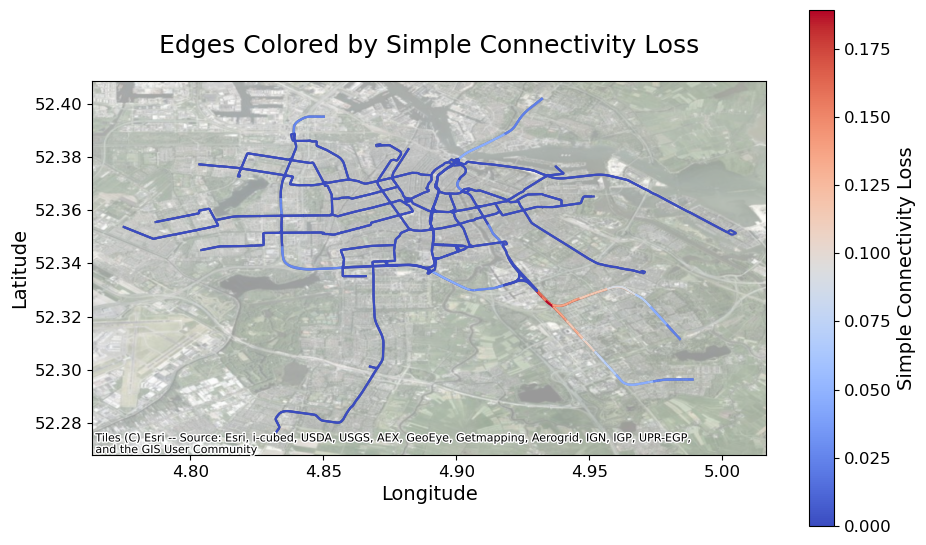

In [172]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Simple Connectivity Loss', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Simple Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [173]:
wcl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\city_two_layer_network_edges_dwcl_1586_0817.xlsx',header=0)
wcl_df = wcl_df[['DWCL_weights', 'id']].drop_duplicates(subset='id').reset_index(drop=True)
city_two_layer_network_edges_wcl_df = pd.merge(wcl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_wcl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_wcl_df.copy(), geometry='geometry')

In [174]:
city_two_layer_network_edges_wcl_gdf

DWCL_weights    id    osm_id  \
0         0.050871   163  39271219   
1         0.050871    16  23207806   
2         0.050871    15  23207802   
3         0.050871   106  26983218   
4         0.050871   114  26983222   
...            ...   ...       ...   
2533      0.000000  3565       NaN   
2534      0.000000  3566       NaN   
2535     -0.000969  3567       NaN   
2536      0.000021  3568       NaN   
2537     -0.000328  3569       NaN   

                                             geometry railway service  \
0      LINESTRING (4.83386 52.3646, 4.83387 52.36432)  subway    None   
1     LINESTRING (4.83387 52.36432, 4.83388 52.36379)  subway    None   
2     LINESTRING (4.83388 52.36379, 4.83391 52.36294)  subway    None   
3     LINESTRING (4.83391 52.36294, 4.83392 52.36257)  subway    None   
4     LINESTRING (4.83392 52.36257, 4.83392 52.36247)  subway    None   
...                                               ...     ...     ...   
2533    LINESTRING (4.90712 52.361, 4.90792 52.36133)     NaN     NaN   
2534   LINESTRING (4.90916 52.3614, 4.90785 52.36131)     NaN     NaN   
2535    LINESTRING (4.90712 52.361, 4.90785 52.36131)     NaN     NaN   
2536  LINESTRING (4.87318 52.34082, 4.87396 52.33932)     NaN     NaN   
2537  LINESTRING (4.87397 52.34082, 4.87396 52.33932)     NaN     NaN   

      from_id  to_id    distance       time      to_from      from_to  \
0         147     25   31.352181   0.001254    (25, 147)    (147, 25)   
1          25     23   59.170137   0.002367     (23, 25)     (25, 23)   
2          23     24   93.935464   0.003757     (24, 23)     (23, 24)   
3          24    109   41.168856   0.001647    (109, 24)    (24, 109)   
4         109    588   11.809676   0.000472   (588, 109)   (109, 588)   
...       ...    ...         ...        ...          ...          ...   
2533     2448    138  106.592997  15.000000  (138, 2448)  (2448, 138)   
2534     2449    460  146.981525  15.000000  (460, 2449)  (2449, 460)   
2535     2448    460   98.324093  15.000000  (460, 2448)  (2448, 460)   
2536     1068    840  285.700786  15.000000  (840, 1068)  (1068, 840)   
2537     2300    840  273.373853  15.000000  (840, 2300)  (2300, 840)   

      count_weight                route_name_list   route     ref  \
0              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4              1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
...            ...                            ...     ...     ...   
2533           NaN                            NaN     NaN     NaN   
2534           NaN                            NaN     NaN     NaN   
2535           NaN                            NaN     NaN     NaN   
2536           NaN                            NaN     NaN     NaN   
2537           NaN                            NaN     NaN     NaN   

          weights  wcl_weights  
0       31.352181    31.352181  
1       59.170137    59.170137  
2       93.935464    93.935464  
3       41.168856    41.168856  
4       11.809676    11.809676  
...           ...          ...  
2533  6250.000000  1400.000000  
2534  6250.000000  1400.000000  
2535  6250.000000  1400.000000  
2536  6250.000000  1400.000000  
2537  6250.000000  1400.000000  

[2538 rows x 18 columns]

In [175]:
city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.weights == 6250.000000].sort_values(by='DWCL_weights')

DWCL_weights   id osm_id  \
663     -0.010109  989    NaN   
665     -0.008956  991    NaN   
651     -0.008180  977    NaN   
666     -0.007719  992    NaN   
668     -0.005537  994    NaN   
..            ...  ...    ...   
658      0.003464  984    NaN   
671      0.006356  997    NaN   
661      0.008754  987    NaN   
670      0.009613  996    NaN   
660      0.010473  986    NaN   

                                            geometry railway service  from_id  \
663  LINESTRING (4.93007 52.32965, 4.93045 52.32978)     NaN     NaN      825   
665  LINESTRING (4.93007 52.32965, 4.93028 52.32974)     NaN     NaN      825   
651   LINESTRING (4.92085 52.34025, 4.9208 52.34023)     NaN     NaN      832   
666  LINESTRING (4.93024 52.32972, 4.93045 52.32978)     NaN     NaN      826   
668  LINESTRING (4.93024 52.32972, 4.93028 52.32974)     NaN     NaN      826   
..                                               ...     ...     ...      ...   
658  LINESTRING (4.92105 52.34029, 4.92085 52.34025)     NaN     NaN      833   
671  LINESTRING (4.93028 52.32974, 4.93024 52.32972)     NaN     NaN      827   
661  LINESTRING (4.93045 52.32978, 4.93024 52.32972)     NaN     NaN      828   
670  LINESTRING (4.93028 52.32974, 4.93007 52.32965)     NaN     NaN      827   
660  LINESTRING (4.93045 52.32978, 4.93007 52.32965)     NaN     NaN      828   

     to_id   distance  time     to_from     from_to  count_weight  \
663    828  48.479415  15.0  (828, 825)  (825, 828)           NaN   
665    827  27.614135  15.0  (827, 825)  (825, 827)           NaN   
651    831   6.140884  15.0  (831, 832)  (832, 831)           NaN   
666    828  26.920429  15.0  (828, 826)  (826, 828)           NaN   
668    827   6.013966  15.0  (827, 826)  (826, 827)           NaN   
..     ...        ...   ...         ...         ...           ...   
658    832  22.749356  15.0  (832, 833)  (833, 832)           NaN   
671    826   6.013966  15.0  (826, 827)  (827, 826)           NaN   
661    826  26.920429  15.0  (826, 828)  (828, 826)           NaN   
670    825  27.614135  15.0  (825, 827)  (827, 825)           NaN   
660    825  48.479415  15.0  (825, 828)  (828, 825)           NaN   

    route_name_list route  ref  weights  wcl_weights  
663             NaN   NaN  NaN   6250.0       1400.0  
665             NaN   NaN  NaN   6250.0       1400.0  
651             NaN   NaN  NaN   6250.0       1400.0  
666             NaN   NaN  NaN   6250.0       1400.0  
668             NaN   NaN  NaN   6250.0       1400.0  
..              ...   ...  ...      ...          ...  
658             NaN   NaN  NaN   6250.0       1400.0  
671             NaN   NaN  NaN   6250.0       1400.0  
661             NaN   NaN  NaN   6250.0       1400.0  
670             NaN   NaN  NaN   6250.0       1400.0  
660             NaN   NaN  NaN   6250.0       1400.0  

[404 rows x 18 columns]

In [176]:
df1 = city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.railway == 'tram'].sort_values(by='DWCL_weights')
df1

DWCL_weights    id     osm_id  \
2180      0.000000  2346  458116523   
733       0.000000  1195   27029145   
734       0.000000  1983  323879274   
735       0.000000  1226   27053444   
736       0.000000  2019  324002511   
...            ...   ...        ...   
1640      0.003418  2367  460929190   
1626      0.003418  2593  653389825   
1571      0.003418  2080  325880098   
1639      0.003418  2203  377776704   
1644           NaN  2735  730313405   

                                               geometry railway service  \
2180     LINESTRING (5.00454 52.35101, 5.0049 52.35113)    tram    None   
733   LINESTRING (4.80627 52.37694, 4.80638 52.37693...    tram    None   
734   LINESTRING (4.80657 52.37694, 4.80649 52.37695...    tram    None   
735   LINESTRING (4.80775 52.35933, 4.8077 52.3594, ...    tram    None   
736   LINESTRING (4.80806 52.35864, 4.8081 52.35856,...    tram    None   
...                                                 ...     ...     ...   
1640  LINESTRING (4.89197 52.33791, 4.89209 52.33892...    tram    None   
1626  LINESTRING (4.89144 52.33742, 4.89148 52.33744...    tram    None   
1571  LINESTRING (4.89064 52.33692, 4.89102 52.33719...    tram    None   
1639  LINESTRING (4.89193 52.33772, 4.89195 52.33777...    tram    None   
1644  LINESTRING (4.89209 52.37523, 4.89198 52.37515...    tram    None   

      from_id  to_id    distance      time       to_from       from_to  \
2180     1563   2034   28.593211  0.002042  (2034, 1563)  (1563, 2034)   
733      2498   1106  154.755100  0.011054  (1106, 2498)  (2498, 1106)   
734      2684   1101  226.501389  0.016179  (1101, 2684)  (2684, 1101)   
735      2444   2136  203.882820  0.014563  (2136, 2444)  (2444, 2136)   
736      2697   1128  242.676575  0.017334  (1128, 2697)  (2697, 1128)   
...       ...    ...         ...       ...           ...           ...   
1640     1921   2628  281.826821  0.020130  (2628, 1921)  (1921, 2628)   
1626     1851   1920   48.509841  0.003465  (1920, 1851)  (1851, 1920)   
1571     2629   1851   78.814046  0.005630  (1851, 2629)  (2629, 1851)   
1639     1920   1921   20.615111  0.001473  (1921, 1920)  (1920, 1921)   
1644     2329   2330  110.042874  0.007860  (2330, 2329)  (2329, 2330)   

      count_weight                                    route_name_list route  \
2180           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
733            1.0  Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...  tram   
734            1.0  Tram 13: Amsterdam Centraal Station => Amsterd...  tram   
735            1.0  Tram 17: Amsterdam Centraal Station => Amsterd...  tram   
736            1.0  Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram   
...            ...                                                ...   ...   
1640           1.0  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram   
1626           1.0  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram   
1571           1.0  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram   
1639           1.0  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram   
1644           1.0  Tram 12: Amsterdam Centraal Station => Amsterd...  tram   

                ref     weights  wcl_weights  
2180             26   28.593211    28.593211  
733              13  154.755100   154.755100  
734              13  226.501389   226.501389  
735              17  203.882820   203.882820  
736              17  242.676575   242.676575  
...             ...         ...          ...  
1640              4  281.826821   281.826821  
1626              4   48.509841    48.509841  
1571              4   78.814046    78.814046  
1639              4   20.615111    20.615111  
1644  12, 13, 17, 2  110.042874   110.042874  

[1498 rows x 18 columns]

In [177]:
df1[df1.DWCL_weights == 0]

DWCL_weights    id     osm_id  \
2180           0.0  2346  458116523   
733            0.0  1195   27029145   
734            0.0  1983  323879274   
735            0.0  1226   27053444   
736            0.0  2019  324002511   
...            ...   ...        ...   
2008           0.0  2876  770460803   
1663           0.0  3104  988973139   
1666           0.0  3105  988973139   
1668           0.0  1766  311941850   
1671           0.0  2487  597900948   

                                               geometry railway service  \
2180     LINESTRING (5.00454 52.35101, 5.0049 52.35113)    tram    None   
733   LINESTRING (4.80627 52.37694, 4.80638 52.37693...    tram    None   
734   LINESTRING (4.80657 52.37694, 4.80649 52.37695...    tram    None   
735   LINESTRING (4.80775 52.35933, 4.8077 52.3594, ...    tram    None   
736   LINESTRING (4.80806 52.35864, 4.8081 52.35856,...    tram    None   
...                                                 ...     ...     ...   
2008  LINESTRING (4.92416 52.36162, 4.92412 52.36168...    tram    None   
1663  LINESTRING (4.8929 52.36527, 4.89291 52.36533,...    tram    None   
1666  LINESTRING (4.89306 52.36585, 4.89312 52.36605...    tram    None   
1668  LINESTRING (4.89313 52.36627, 4.89309 52.36611...    tram    None   
1671  LINESTRING (4.89328 52.36669, 4.89329 52.3667,...    tram    None   

      from_id  to_id    distance      time       to_from       from_to  \
2180     1563   2034   28.593211  0.002042  (2034, 1563)  (1563, 2034)   
733      2498   1106  154.755100  0.011054  (1106, 2498)  (2498, 1106)   
734      2684   1101  226.501389  0.016179  (1101, 2684)  (2684, 1101)   
735      2444   2136  203.882820  0.014563  (2136, 2444)  (2444, 2136)   
736      2697   1128  242.676575  0.017334  (1128, 2697)  (2697, 1128)   
...       ...    ...         ...       ...           ...           ...   
2008     2600   1191  206.311610  0.014737  (1191, 2600)  (2600, 1191)   
1663     1895   2725   66.152632  0.004725  (2725, 1895)  (1895, 2725)   
1666     2725   2060   94.250487  0.006732  (2060, 2725)  (2725, 2060)   
1668     2724   1636  111.901083  0.007993  (1636, 2724)  (2724, 1636)   
1671     2060   2113   37.026512  0.002645  (2113, 2060)  (2060, 2113)   

      count_weight                                    route_name_list route  \
2180           1.0  Tram 26: Amsterdam Centraal Station => Amsterd...  tram   
733            1.0  Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...  tram   
734            1.0  Tram 13: Amsterdam Centraal Station => Amsterd...  tram   
735            1.0  Tram 17: Amsterdam Centraal Station => Amsterd...  tram   
736            1.0  Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram   
...            ...                                                ...   ...   
2008           1.0      Tram 19: Diemen Sniep => Amsterdam Sloterdijk  tram   
1663           1.0  Tram 24: Amsterdam VUmc => Amsterdam Centraal ...  tram   
1666           1.0  Tram 24: Amsterdam VUmc => Amsterdam Centraal ...  tram   
1668           1.0  Tram 24: Amsterdam Centraal Station => Amsterd...  tram   
1671           1.0  Tram 24: Amsterdam VUmc => Amsterdam Centraal ...  tram   

     ref     weights  wcl_weights  
2180  26   28.593211    28.593211  
733   13  154.755100   154.755100  
734   13  226.501389   226.501389  
735   17  203.882820   203.882820  
736   17  242.676575   242.676575  
...   ..         ...          ...  
2008  19  206.311610   206.311610  
1663  24   66.152632    66.152632  
1666  24   94.250487    94.250487  
1668  24  111.901083   111.901083  
1671  24   37.026512    37.026512  

[862 rows x 18 columns]

In [178]:
df1 = city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.railway == 'subway'].sort_values(by='DWCL_weights')
len(df1[df1.DWCL_weights>0.1])/len(df1)

0.23270440251572327

In [179]:
df1.DWCL_weights.max()

np.float64(0.2887841267437311)

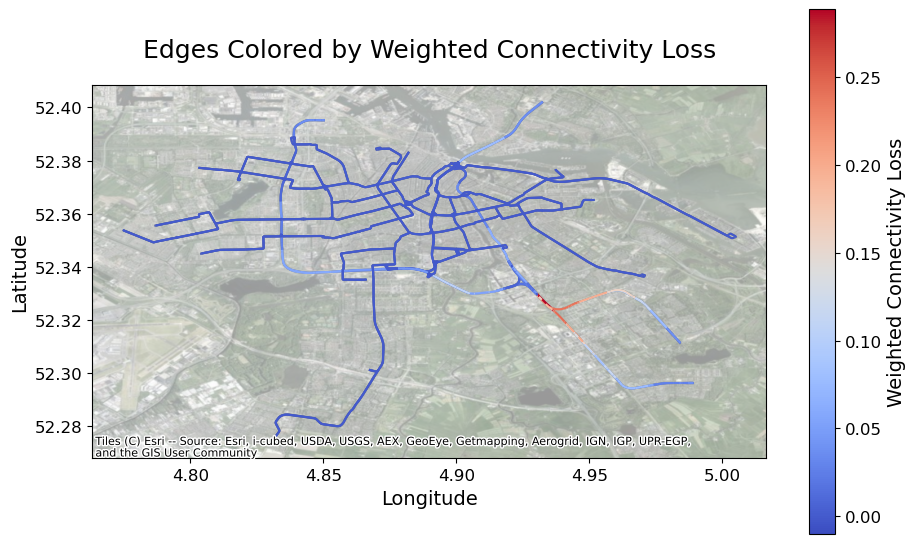

In [180]:
# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_wcl_gdf.plot(column='DWCL_weights', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Weighted Connectivity Loss', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Weighted Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

removed_edge_id  DWCL_weights  DWCL_distance
0              163      0.047384       0.049288
1               16      0.047384       0.049288
2               15      0.047384       0.049315
3              106      0.047384       0.049315
4              114      0.047384       0.049315
5              115      0.047384       0.049315
6              108      0.003436       0.003458
7              107      0.030463       0.030485
8              119      0.030463       0.030485
9              118      0.030463       0.030465
10             117      0.030463       0.030465
11             113      0.030463       0.030465
12             116      0.047384       0.049481
13              13      0.047384       0.049481
14             161      0.002118      -0.001934
15             102      0.002118      -0.001934
16             101      0.004446       0.002982
17              14      0.004446       0.002982
18             103      0.002118      -0.001934
19             112      0.030463       0.030305
20             111      0.030463       0.030305
21             104      0.002118      -0.001934
22             105      0.002118      -0.001934
23             100      0.002021      -0.003942
24             109      0.003450       0.000115
25              18      0.002118      -0.001934
26             438      0.004645       0.004749
27              20      0.002118      -0.001934
28              21      0.042326       0.037027
29              99      0.002021      -0.003942
30             162      0.003450       0.000115
31              11      0.002021      -0.003897
32             931      0.042326       0.037027
33              19      0.042326       0.037027
34              12      0.002021      -0.003942
35              17      0.003436       0.003458
36             110      0.030463       0.030305
37             437      0.004645       0.004749
38              98      0.002021      -0.003942
39             120      0.003436       0.003458
40              97      0.002021      -0.003942
41              96      0.002021      -0.003942
42              95      0.029048       0.023085
43             932      0.029048       0.023085
44              94      0.029048       0.023085
45             436      0.004645       0.004749
46             435      0.004122       0.005572
47             121      0.003403       0.004574
48              10      0.003403       0.004574
49             123      0.004122       0.005572

In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

Empty DataFrame
Columns: [removed_edge_id, DWCL_weights, DWCL_distance]
Index: []

In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

removed_edge_id  DWCL_weights  DWCL_distance
0              163      0.047477       0.049288
1               16      0.047477       0.049288
2               15      0.047477       0.049315
3              106      0.047477       0.049315
4              114      0.047477       0.049315
5              115      0.047477       0.049315
6              108      0.004700       0.003458
7              107      0.031727       0.030485
8              119      0.031727       0.030485
9              118      0.031727       0.030465
10             117      0.031727       0.030465
11             113      0.031727       0.030465
12             116      0.047477       0.049481
13              13      0.047477       0.049481
14             161      0.004250      -0.001934
15             102      0.004250      -0.001934
16             101      0.005674       0.002982
17              14      0.005674       0.002982
18             103      0.004250      -0.001934
19             112      0.031727       0.030305
20             111      0.031727       0.030305
21             104      0.004250      -0.001934
22             105      0.004250      -0.001934
23             100      0.005689      -0.003942
24             109      0.005942       0.000115
25              18      0.004250      -0.001934
26             438      0.005184       0.004749
27              20      0.004250      -0.001934
28              21      0.044649       0.037027
29              99      0.005689      -0.003942
30             162      0.005942       0.000115
31              11      0.005689      -0.003897
32             931      0.044649       0.037027
33              19      0.044649       0.037027
34              12      0.005689      -0.003942
35              17      0.004700       0.003458
36             110      0.031727       0.030305
37             437      0.005184       0.004749
38              98      0.005689      -0.003942
39             120      0.004700       0.003458
40              97      0.005689      -0.003942
41              96      0.005689      -0.003942
42              95      0.032716       0.023085
43             932      0.032716       0.023085
44              94      0.032716       0.023085
45             436      0.005184       0.004749
46             435      0.004324       0.005572
47             121      0.004095       0.004574
48              10      0.004095       0.004574
49             123      0.004324       0.005572

In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

Empty DataFrame
Columns: [removed_edge_id, DWCL_weights, DWCL_distance]
Index: []

In [164]:
dwcl_df[dwcl_df.DWCL_distance < 0]

removed_edge_id  DWCL_weights  DWCL_distance
14             161      0.004250      -0.001934
15             102      0.004250      -0.001934
18             103      0.004250      -0.001934
21             104      0.004250      -0.001934
22             105      0.004250      -0.001934
23             100      0.005689      -0.003942
25              18      0.004250      -0.001934
27              20      0.004250      -0.001934
29              99      0.005689      -0.003942
31              11      0.005689      -0.003897
34              12      0.005689      -0.003942
38              98      0.005689      -0.003942
40              97      0.005689      -0.003942
41              96      0.005689      -0.003942

In [165]:
OD_sink_id_wcl

id  count_x  DW_weights_x  DW_distance_x  count_y  DW_weights_y  \
0    19       43      0.005336       0.006426       43      0.005100   
1    54       43      0.005162       0.005776       43      0.005167   
2    56       43      0.004747       0.005246       43      0.004752   
3    61       43      0.003982       0.004312       43      0.003986   
4   121       43      0.004303       0.005298       43      0.004303   
5   137       43      0.006573       0.007949       43      0.006684   
6   138       43      0.006543       0.007511       43      0.006668   
7   139       43      0.006694       0.007530       43      0.006735   
8   144       43      0.004086       0.004346       43      0.004081   
9   180       42      0.006685       0.007363       42      0.006625   
10  323       43      0.003702       0.003907       43      0.003697   
11  716       43      0.004230       0.004561       43      0.004230   
12  728       42      0.005884       0.006798       42      0.006076   
13  805       43      0.003776       0.004394       43      0.003776   
14  811       43      0.006732       0.008034       43      0.006738   
15  812       43      0.004302       0.004696       43      0.004306   
16  814       43      0.005931       0.006637       43      0.005924   
17  817       43      0.005349       0.006037       43      0.005349   
18  820       43      0.008273       0.010268       43      0.008321   
19  822       43      0.005841       0.006693       43      0.005846   
20  825       42      0.008897       0.010926       42      0.008887   
21  832       42      0.007628       0.010224       42      0.007573   
22  835       43      0.006692       0.007483       43      0.006678   
23  836       42      0.004625       0.004997       42      0.004560   
24  841       43      0.004753       0.005061       43      0.004744   
25  843       43      0.005286       0.007063       43      0.005008   
26  844       43      0.004633       0.005974       43      0.004633   
27  846       43      0.004878       0.006324       43      0.004576   
28  848       43      0.004817       0.006176       43      0.004589   
29  850       43      0.005392       0.005928       43      0.005385   
30  851       43      0.007957       0.009975       43      0.007948   
31  853       43      0.004669       0.005034       43      0.004664   
32  856       43      0.006882       0.008017       43      0.006874   
33  858       43      0.007071       0.007963       43      0.006976   
34  860       43      0.006487       0.008351       43      0.006487   
35  863       43      0.006041       0.006954       43      0.006041   
36  866       43      0.005979       0.007083       43      0.006080   

    DW_distance_y  DWCL_weights  DWCL_distance  
0        0.006075      0.955748       0.945390  
1        0.005786      1.000942       1.001799  
2        0.005255      1.000949       1.001824  
3        0.004319      1.000949       1.001836  
4        0.005298      1.000000       1.000000  
5        0.008108      1.016978       1.020116  
6        0.007692      1.019101       1.024138  
7        0.007602      1.006154       1.009646  
8        0.004354      0.998775       1.001760  
9        0.007325      0.991014       0.994854  
10       0.003914      0.998791       1.001747  
11       0.004561      1.000000       1.000000  
12       0.007052      1.032699       1.037401  
13       0.004399      1.000000       1.001036  
14       0.008047      1.000890       1.001624  
15       0.004704      1.000952       1.001837  
16       0.006648      0.998791       1.001669  
17       0.006037      1.000000       1.000000  
18       0.010354      1.005803       1.008341  
19       0.006704      1.000923       1.001738  
20       0.010941      0.998871       1.001437  
21       0.010188      0.992845       0.996510  
22       0.007473      0.997976       0.998615  
23       0.004954      0.985904       0.991399  
24       0.005055      0.998091       0.998

In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

removed_edge_id  DWCL_weights  DWCL_distance
0              163      0.047390       0.049288
1               16      0.047390       0.049288
2               15      0.047390       0.049315
3              106      0.047390       0.049315
4              114      0.047390       0.049315
5              115      0.047390       0.049315
6              108      0.002300       0.003458
7              107      0.029327       0.030485
8              119      0.029327       0.030485
9              118      0.029327       0.030465
10             117      0.029327       0.030465
11             113      0.029327       0.030465
12             116      0.047390       0.049481
13              13      0.047390       0.049481
14             161     -0.000100      -0.001934
15             102     -0.000100      -0.001934
16             101      0.003298       0.002982
17              14      0.003298       0.002982
18             103     -0.000100      -0.001934
19             112      0.029327       0.030305
20             111      0.029327       0.030305
21             104     -0.000100      -0.001934
22             105     -0.000100      -0.001934
23             100     -0.001612      -0.003942
24             109      0.001159       0.000115
25              18     -0.000100      -0.001934
26             438      0.004125       0.004749
27              20     -0.000100      -0.001934
28              21      0.039871       0.037027
29              99     -0.001612      -0.003942
30             162      0.001159       0.000115
31              11     -0.001612      -0.003897
32             931      0.039871       0.037027
33              19      0.039871       0.037027
34              12     -0.001612      -0.003942
35              17      0.002300       0.003458
36             110      0.029327       0.030305
37             437      0.004125       0.004749
38              98     -0.001612      -0.003942
39             120      0.002300       0.003458
40              97     -0.001612      -0.003942
41              96     -0.001612      -0.003942
42              95      0.025415       0.023085
43             932      0.025415       0.023085
44              94      0.025415       0.023085
45             436      0.004125       0.004749
46             435      0.004003       0.005572
47             121      0.002886       0.004574
48              10      0.002886       0.004574
49             123      0.004003       0.005572

In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
14             161     -0.000100      -0.001934
15             102     -0.000100      -0.001934
18             103     -0.000100      -0.001934
21             104     -0.000100      -0.001934
22             105     -0.000100      -0.001934
23             100     -0.001612      -0.003942
25              18     -0.000100      -0.001934
27              20     -0.000100      -0.001934
29              99     -0.001612      -0.003942
31              11     -0.001612      -0.003897
34              12     -0.001612      -0.003942
38              98     -0.001612      -0.003942
40              97     -0.001612      -0.003942
41              96     -0.001612      -0.003942

In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(40):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

removed_edge_id  DWCL_weights  DWCL_distance
0              163      0.047390       0.049288
1               16      0.047390       0.049288
2               15      0.047390       0.049315
3              106      0.047390       0.049315
4              114      0.047390       0.049315
5              115      0.047390       0.049315
6              108      0.002300       0.003458
7              107      0.029327       0.030485
8              119      0.029327       0.030485
9              118      0.029327       0.030465
10             117      0.029327       0.030465
11             113      0.029327       0.030465
12             116      0.047390       0.049481
13              13      0.047390       0.049481
14             161     -0.000100      -0.001934
15             102     -0.000100      -0.001934
16             101      0.003298       0.002982
17              14      0.003298       0.002982
18             103     -0.000100      -0.001934
19             112      0.029327       0.030305
20             111      0.029327       0.030305
21             104     -0.000100      -0.001934
22             105     -0.000100      -0.001934
23             100     -0.001612      -0.003942
24             109      0.001159       0.000115
25              18     -0.000100      -0.001934
26             438      0.004125       0.004749
27              20     -0.000100      -0.001934
28              21      0.039871       0.037027
29              99     -0.001612      -0.003942
30             162      0.001159       0.000115
31              11     -0.001612      -0.003897
32             931      0.039871       0.037027
33              19      0.039871       0.037027
34              12     -0.001612      -0.003942
35              17      0.002300       0.003458
36             110      0.029327       0.030305
37             437      0.004125       0.004749
38              98     -0.001612      -0.003942
39             120      0.002300       0.003458

In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

removed_edge_id  DWCL_weights  DWCL_distance
14             161     -0.000100      -0.001934
15             102     -0.000100      -0.001934
18             103     -0.000100      -0.001934
21             104     -0.000100      -0.001934
22             105     -0.000100      -0.001934
23             100     -0.001612      -0.003942
25              18     -0.000100      -0.001934
27              20     -0.000100      -0.001934
29              99     -0.001612      -0.003942
31              11     -0.001612      -0.003897
34              12     -0.001612      -0.003942
38              98     -0.001612      -0.003942

In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

removed_edge_id  DWCL_weights  DWCL_distance
0              163      0.068644       0.049288
1               16      0.068644       0.049288
2               15      0.068644       0.049315
3              106      0.068644       0.049315
4              114      0.068644       0.049315
5              115      0.068644       0.049315
6              108      0.048547       0.003458
7              107      0.075574       0.030485
8              119      0.075574       0.030485
9              118      0.075574       0.030465
10             117      0.075574       0.030465
11             113      0.075574       0.030465
12             116      0.068644       0.049481
13              13      0.068644       0.049481
14             161      0.057855      -0.001934
15             102      0.057855      -0.001934
16             101      0.047056       0.002982
17              14      0.047056       0.002982
18             103      0.057855      -0.001934
19             112      0.075574       0.030305
20             111      0.075574       0.030305
21             104      0.057855      -0.001934
22             105      0.057855      -0.001934
23             100      0.091666      -0.003942
24             109      0.076615       0.000115
25              18      0.057855      -0.001934
26             438      0.028084       0.004749
27              20      0.057855      -0.001934
28              21      0.101322       0.037027
29              99      0.091666      -0.003942
30             162      0.076615       0.000115
31              11      0.091666      -0.003897
32             931      0.101322       0.037027
33              19      0.101322       0.037027
34              12      0.091666      -0.003942
35              17      0.048547       0.003458
36             110      0.075574       0.030305
37             437      0.028084       0.004749
38              98      0.091666      -0.003942
39             120      0.048547       0.003458
40              97      0.091666      -0.003942
41              96      0.091666      -0.003942
42              95      0.118693       0.023085
43             932      0.118693       0.023085
44              94      0.118693       0.023085
45             436      0.028084       0.004749
46             435      0.020003       0.005572
47             121      0.035589       0.004574
48              10      0.035589       0.004574
49             123      0.020003       0.005572

In [165]:
dwcl_df[dwcl_df.DWCL_weights < 0]

Empty DataFrame
Columns: [removed_edge_id, DWCL_weights, DWCL_distance]
Index: []

In [163]:
dwcl_df[dwcl_df.DWCL_distance < 0]

removed_edge_id  DWCL_weights  DWCL_distance
14             161      0.057855      -0.001934
15             102      0.057855      -0.001934
18             103      0.057855      -0.001934
21             104      0.057855      -0.001934
22             105      0.057855      -0.001934
23             100      0.091666      -0.003942
25              18      0.057855      -0.001934
27              20      0.057855      -0.001934
29              99      0.091666      -0.003942
31              11      0.091666      -0.003897
34              12      0.091666      -0.003942
38              98      0.091666      -0.003942
40              97      0.091666      -0.003942
41              96      0.091666      -0.003942

In [166]:
OD_sink_id_wcl

id  count_x  DW_weights_x  DW_distance_x  count_y  DW_weights_y  \
0    19       43      0.002891       0.006426       43      0.002875   
1    54       43      0.002688       0.005776       43      0.002659   
2    56       43      0.002540       0.005246       43      0.002511   
3    61       43      0.002255       0.004312       43      0.002229   
4   121       43      0.002189       0.005298       43      0.002189   
5   137       43      0.003802       0.007949       43      0.003704   
6   138       43      0.004148       0.007511       43      0.004044   
7   139       43      0.004664       0.007530       43      0.004542   
8   144       43      0.002678       0.004346       43      0.002583   
9   180       42      0.002511       0.007363       42      0.002453   
10  323       43      0.002490       0.003907       43      0.002403   
11  716       43      0.002123       0.004561       43      0.002123   
12  728       42      0.003415       0.006798       42      0.003338   
13  805       43      0.002041       0.004394       43      0.002041   
14  811       43      0.003226       0.008034       43      0.003194   
15  812       43      0.002376       0.004696       43      0.002349   
16  814       43      0.003501       0.006637       43      0.003379   
17  817       43      0.002451       0.006037       43      0.002451   
18  820       43      0.005574       0.010268       43      0.005440   
19  822       43      0.002925       0.006693       43      0.002894   
20  825       42      0.005023       0.010926       42      0.004868   
21  832       42      0.002951       0.010224       42      0.002791   
22  835       43      0.004042       0.007483       43      0.003994   
23  836       42      0.002690       0.004997       42      0.002508   
24  841       43      0.003108       0.005061       43      0.003066   
25  843       43      0.002754       0.007063       43      0.002738   
26  844       43      0.002325       0.005974       43      0.002325   
27  846       43      0.002441       0.006324       43      0.002433   
28  848       43      0.002606       0.006176       43      0.002590   
29  850       43      0.003271       0.005928       43      0.003156   
30  851       43      0.004313       0.009975       43      0.004171   
31  853       43      0.002951       0.005034       43      0.002846   
32  856       43      0.003890       0.008017       43      0.003758   
33  858       43      0.004031       0.007963       43      0.003790   
34  860       43      0.002218       0.008351       43      0.002218   
35  863       43      0.002744       0.006954       43      0.002744   
36  866       43      0.003552       0.007083       43      0.003460   

    DW_distance_y  DWCL_weights  DWCL_distance  
0        0.006075      0.994423       0.945390  
1        0.005786      0.988967       1.001799  
2        0.005255      0.988771       1.001824  
3        0.004319      0.988471       1.001836  
4        0.005298      1.000000       1.000000  
5        0.008108      0.974401       1.020116  
6        0.007692      0.974994       1.024138  
7        0.007602      0.973886       1.009646  
8        0.004354      0.964561       1.001760  
9        0.007325      0.977200       0.994854  
10       0.003914      0.964835       1.001747  
11       0.004561      1.000000       1.000000  
12       0.007052      0.977466       1.037401  
13       0.004399      1.000000       1.001036  
14       0.008047      0.989807       1.001624  
15       0.004704      0.988583       1.001837  
16       0.006648      0.965018       1.001669  
17       0.006037      1.000000       1.000000  
18       0.010354      0.975919       1.008341  
19       0.006704      0.989319       1.001738  
20       0.010941      0.969261       1.001437  
21       0.010188      0.945948       0.996510  
22       0.007473      0.987952       0.998615  
23       0.004954      0.932332       0.991399  
24       0.005055      0.986696       0.998